# Detector de Malware en Android

## Importaciones

In [3]:
import pandas as pd
import io
from IPython.display import display, HTML
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [4]:
#Importación del dataset
df = pd.read_csv('Android_Malware.csv')


C:\Users\Jorge\AppData\Local\Temp\ipykernel_17124\1372199670.py:2: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Android_Malware.csv')


# Conociendo los datos y el problema

https://www.kaggle.com/datasets/subhajournal/android-malware-detection 

Se busca desarrollar una IA utilizando Machine Learning para detectar malware en Android. A continuación, la traducción a español de lo que indica la página web:  

**Sobre el Conjunto de Datos**

La detección de malware en Android mediante el uso de aprendizaje automático es un enfoque para identificar y clasificar aplicaciones maliciosas en dispositivos Android. Una de las formas más precisas de determinar la sospechosidad de una aplicación es monitoreando la red a la que está conectado el dispositivo Android.

El aprendizaje automático es una rama de la inteligencia artificial que se enfoca en el desarrollo de programas informáticos que pueden acceder a datos y aprender por sí mismos. Esta tecnología puede utilizarse para construir modelos que evalúen datos entrantes con el fin de hacer predicciones y detectar anomalías.

Esto se puede aplicar a la detección de aplicaciones maliciosas en Android, desarrollando un modelo que busque patrones asociados con comportamientos de malware. El modelo puede utilizar una variedad de características, como los permisos solicitados, llamadas a API realizadas, actividad en la red, entre otros. Una vez entrenado, el modelo puede desplegarse para clasificar cualquier nueva aplicación como maliciosa o no maliciosa.

Según la información proporcionada por el "cliente", la clasificación va a ser binaria (malicioso o no malicioso). Por lo tanto los posibles modelos ya se van acotando.

# Análisis EDA del dataset

## Comprensión inicial de los datos

### Inspeccionamos filas, columnas y tipos de datos

In [5]:
# Información del DataFrame
print(df.info())
print("\n\n")
print(f"Total de filas y columnas: {df.shape}")

# Listas de columnas
lista_total_columnas = df.columns
print("Columnas totales: ", lista_total_columnas)
lista_col_num = df.select_dtypes(include="number").columns
print("Columnas numéricas: ", lista_col_num)
lista_col_obj = df.select_dtypes(include="object").columns
print("Columnas string: ", lista_col_obj)

# Capturo df.info() en una cadena
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

# Guardo todo en un archivo HTML para correcta visualización
with open("Informe.html", "w") as f:  
    f.write("<h1>Columnas totales</h1>")
    for i in lista_total_columnas:
        f.write(f"<p>{i} - {df[i].dtype}</p>")
    
    f.write("<h1>Columnas numéricas</h1>")
    for i in lista_col_num:
        f.write(f"<p>{i} - {df[i].dtype}</p>")

    f.write("<h1>Columnas string</h1>")
    for i in lista_col_obj:
        f.write(f"<p>{i} - {df[i].dtype}</p>")

    f.write("<h1>Información general</h1>")
    f.write(f"<p>{info_str}</p>")  

    f.write("<h1>Total de filas y columnas</h1>")
    f.write(f"<p>{df.shape}</p>")

# Visualizo el archivo HTML
display(HTML("Informe.html"))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Timestamp                    355630 non-null  object 
 8    Flow Duration                355630 non-null  int64  
 9    Total Fwd Packets            355630 non-null  int64  
 10   Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets   355630 non-null  float64
 12   Total Length of Bwd Packets  355630 non-nul

Vemos 86 columnas con 3 tipos de dato: int64 (enteros), float64(flotantes) y object (objetos).  
355630 filas y 86 columnas.
La columna objetivo es label.


In [6]:
print("Principio del dataframe: \n",df.head())
print("\n\n")
print("Cola del dataframe: \n",df.tail())

Principio del dataframe: 
    Unnamed: 0                                Flow ID    Source IP  \
0           0  172.217.6.202-10.42.0.211-443-50004-6  10.42.0.211   
1           1  172.217.6.202-10.42.0.211-443-35455-6  10.42.0.211   
2           2  131.253.61.68-10.42.0.211-443-51775-6  10.42.0.211   
3           3  131.253.61.68-10.42.0.211-443-51775-6  10.42.0.211   
4           4  131.253.61.68-10.42.0.211-443-51776-6  10.42.0.211   

    Source Port  Destination IP   Destination Port   Protocol  \
0         50004   172.217.6.202              443.0        6.0   
1         35455   172.217.6.202              443.0        6.0   
2         51775   131.253.61.68              443.0        6.0   
3         51775   131.253.61.68              443.0        6.0   
4         51776   131.253.61.68              443.0        6.0   

             Timestamp   Flow Duration   Total Fwd Packets  ...  \
0  13/06/2017 11:52:39           37027                   1  ...   
1  13/06/2017 11:52:39           

### Conociendo el contenido de las variables

In [7]:
# Columnas con datos categóricos (tipo 'object')
categoricas = df.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(categoricas))
# Columnas con datos numéricos (int, float)
numericas = df.select_dtypes(include=['number']).columns
print("Variables numéricas:", list(numericas))

#Valores únicos
for columna in lista_total_columnas:
    print(f"Valores únicos en {columna}: {df[columna].nunique()}")


Variables categóricas: ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', ' CWE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Label']
Variables numéricas: ['Unnamed: 0', ' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min P

En label (target) tenemos 4 valores distintos y en protocol 5, vamos a conocerlos:

In [8]:
#Valores de label
print("Valores de label: ", list(df['Label'].unique()))
#Valores de protocol (no categórica)
print("Valores de protocol: ", list(df[' Protocol'].unique())) #Protocol tiene un espacio al principio, es un error que arreglaré renombrando la columna por asignación
df['Protocol'] = df[' Protocol']

#Visualización de los valores únicos categóricos
for columna in categoricas:
    print(f"Valores únicos en {columna}: {df[columna].head()}")


Valores de label:  ['Android_Adware', 'Android_Scareware', 'Android_SMS_Malware', 'Benign']
Valores de protocol:  [np.float64(6.0), np.float64(0.0), np.float64(17.0), np.float64(442719.666666667), np.float64(65812.0)]
Valores únicos en Flow ID: 0    172.217.6.202-10.42.0.211-443-50004-6
1    172.217.6.202-10.42.0.211-443-35455-6
2    131.253.61.68-10.42.0.211-443-51775-6
3    131.253.61.68-10.42.0.211-443-51775-6
4    131.253.61.68-10.42.0.211-443-51776-6
Name: Flow ID, dtype: object
Valores únicos en  Source IP: 0    10.42.0.211
1    10.42.0.211
2    10.42.0.211
3    10.42.0.211
4    10.42.0.211
Name:  Source IP, dtype: object
Valores únicos en  Destination IP: 0    172.217.6.202
1    172.217.6.202
2    131.253.61.68
3    131.253.61.68
4    131.253.61.68
Name:  Destination IP, dtype: object
Valores únicos en  Timestamp: 0    13/06/2017 11:52:39
1    13/06/2017 11:52:39
2    13/06/2017 11:52:42
3    13/06/2017 11:52:43
4    13/06/2017 11:52:42
Name:  Timestamp, dtype: object
Valores ún

### Datos faltantes

In [9]:
#Total de valores nulos por columna
diccionario_de_nulos = {}
for columna in df.columns:
    diccionario_de_nulos[columna] = df[columna].isnull().sum()
    

print("Total de valores nulos por columna:\n", diccionario_de_nulos)
#Muestra los nombres de columnas que contienen nulos
columnas_nulas = [col for col in df.columns if df[col].isnull().sum() > 0]
print("Columnas con valores nulos:", columnas_nulas)
print("El total de columnas con nulos es: ", len(columnas_nulas), "de un total de:", len(df.columns) )
valor_nulo_maximo = df.isnull().sum().max()
print("El valor nulo máximo es: ", valor_nulo_maximo)
print("El total de nulos en todo el dataset es: ",df.isnull().sum().sum(), "porcentualmente es: ",((df.isnull().sum().sum()*100)/df.size),"%")

Total de valores nulos por columna:
 {'Unnamed: 0': np.int64(0), 'Flow ID': np.int64(1), ' Source IP': np.int64(0), ' Source Port': np.int64(0), ' Destination IP': np.int64(0), ' Destination Port': np.int64(0), ' Protocol': np.int64(0), ' Timestamp': np.int64(0), ' Flow Duration': np.int64(0), ' Total Fwd Packets': np.int64(0), ' Total Backward Packets': np.int64(0), 'Total Length of Fwd Packets': np.int64(0), ' Total Length of Bwd Packets': np.int64(0), ' Fwd Packet Length Max': np.int64(0), ' Fwd Packet Length Min': np.int64(0), ' Fwd Packet Length Mean': np.int64(0), ' Fwd Packet Length Std': np.int64(0), 'Bwd Packet Length Max': np.int64(0), ' Bwd Packet Length Min': np.int64(0), ' Bwd Packet Length Mean': np.int64(0), ' Bwd Packet Length Std': np.int64(0), 'Flow Bytes/s': np.int64(0), ' Flow Packets/s': np.int64(0), ' Flow IAT Mean': np.int64(0), ' Flow IAT Std': np.int64(0), ' Flow IAT Max': np.int64(0), ' Flow IAT Min': np.int64(0), 'Fwd IAT Total': np.int64(0), ' Fwd IAT Mean':

Vemos que la cantidad de columnas con nulos es muy grande, pero afortunadamente, el valor máximo de nulos en una columna dada es 4, que de 355630 filas es un problema muy menor.  
El total de nulos es 117, una cantidad muy menor. Por lo tanto lo mejor será imputar estos datos con la mediana en la fase de ingeniería de características. No es necesaria la visualización.

### Análisis descriptivo del dataset

In [10]:
with open("InformeDescriptivo.html", "w") as f:
    f.write("<h1>Análisis descriptivo</h1>")
    f.write(df.describe().to_html())
# Visualización del archivo HTML
display(HTML("InformeDescriptivo.html"))

Sobre estos datos, voy a realizar una serie de operaciones para tratar de intuir diferentes informaciones:

-Diferencia entre media y mediana (simetría de la distribución). Si la media es mayor que la mediana, el sesgo será positivo y si es menor, negativo.  
-Diferencia entre valor máximo y mínimo para comprobar el rango de valores (posibilidad de error por outliers)


In [11]:
# Listas para clasificar las columnas
columnas_distribucion_normal = []
columnas_con_posible_sesgo = []

with open("InformeDescriptivo.html", "a") as f:
    f.write("<h1>Análisis descriptivo</h1>")
    
    # Análisis de diferencias
    f.write("<h2>Análisis de diferencias</h2>")
    for columna in df.select_dtypes(include=['number']).columns:
        max_min_diff = df[columna].max() - df[columna].min()
        mean_median_diff = df[columna].mean() - df[columna].median()
        std_dev = df[columna].std()
        
        f.write(f"<h3>Columna: {columna}</h3>")
        f.write(f"<p>Diferencia entre máximo y mínimo: {max_min_diff}</p>")
        f.write(f"<p>Diferencia entre media y mediana: {mean_median_diff}</p>")

        # Evaluación de sesgo
        skewness = skew(df[columna].dropna()) if df[columna].nunique() > 1 else 0

        if abs(mean_median_diff) < 25:
            f.write(f'<p style="color: #46e85c;"><b>>>>>> Distribución aproximadamente normal <<<<<<<</b></p>')
            columnas_distribucion_normal.append(columna)
        elif skewness < -0.5:
            f.write(f'<p style="color: Red;"><b>>>>>> Posible sesgo negativo <<<<<<<</b></p>')
            columnas_con_posible_sesgo.append(columna)
        elif skewness > 0.5:
            f.write(f'<p style="color: Blue;"><b>>>>>> Posible sesgo positivo <<<<<<<</b></p>')
            columnas_con_posible_sesgo.append(columna)

        # Evaluación de dispersión
        if df[columna].mean() != 0:
            coef_variacion = std_dev / df[columna].mean()
        else:
            coef_variacion = float('inf')  

        if coef_variacion > 1:
            f.write(f'<p style="color: #e2d536;"><b>>>>>> Alta dispersión <<<<<<<</b></p>')
            if columna not in columnas_con_posible_sesgo:
                columnas_con_posible_sesgo.append(columna)
        else:
            f.write(f'<p style="color: #006400;"><b>>>>>> Baja dispersión <<<<<<<</b></p>')
            if columna not in columnas_distribucion_normal:
                columnas_distribucion_normal.append(columna)

# Visualización del informe
display(HTML("InformeDescriptivo.html"))
print("Columnas con presunta distribución normal:", columnas_distribucion_normal)
print("Columnas con presunto sesgo:", columnas_con_posible_sesgo)

Columnas con presunta distribución normal: ['Unnamed: 0', ' Source Port', ' Protocol', ' Total Fwd Packets', ' Total Backward Packets', ' Fwd Packet Length Min', ' Bwd Packet Length Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', ' Min Packet Length', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count', ' Fwd Header Length.1', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', ' Subflow Bwd Packets', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Protocol']
Columnas con presunto sesgo: ['Unnamed: 0', ' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Me

**Gran cantidad de los datos parecen estar sesgados**, probablemente sea necesario realizar transformaciones en la ingeniería de características.

#### Visualización de los datos

Columnas con posible sesgo y que son numéricas: [' Flow IAT Min', 'Active Mean', ' RST Flag Count', ' Flow Packets/s', ' Bwd Avg Bytes/Bulk', 'Init_Win_bytes_forward', ' Fwd Packet Length Min', ' Avg Bwd Segment Size', 'Idle Mean', 'Bwd Packet Length Max', ' Bwd Packet Length Std', ' Idle Max', 'Fwd Packets/s', ' URG Flag Count', ' Fwd Header Length', ' Fwd Avg Bulk Rate', 'Fwd IAT Total', ' PSH Flag Count', ' Bwd Packet Length Mean', ' min_seg_size_forward', ' Min Packet Length', ' Bwd IAT Min', ' Bwd Header Length', ' Max Packet Length', ' Bwd Packet Length Min', ' Fwd Packet Length Std', ' Flow IAT Std', ' Bwd URG Flags', ' Active Std', ' Fwd URG Flags', ' ACK Flag Count', ' Subflow Bwd Packets', ' Bwd IAT Mean', 'Protocol', ' Destination Port', ' Init_Win_bytes_backward', ' Fwd Header Length.1', ' Packet Length Std', ' Flow IAT Max', 'Total Length of Fwd Packets', 'Bwd IAT Total', ' Bwd IAT Std', ' Packet Length Mean', ' Subflow Bwd Bytes', 'Subflow Fwd Packets', ' Fwd Packet Lengt

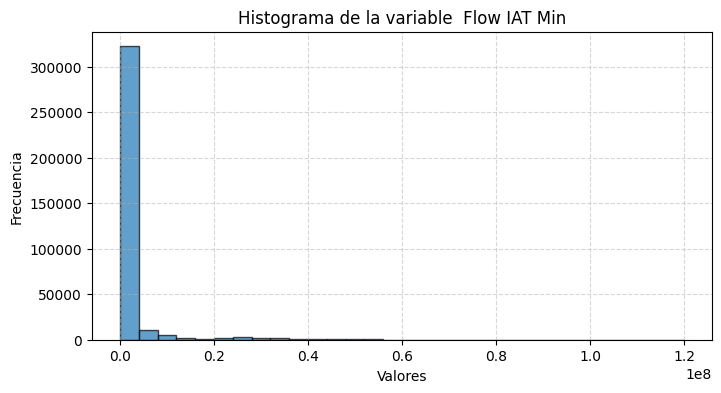

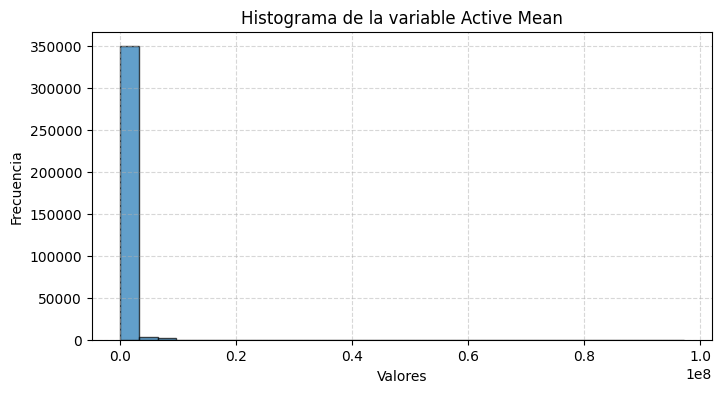

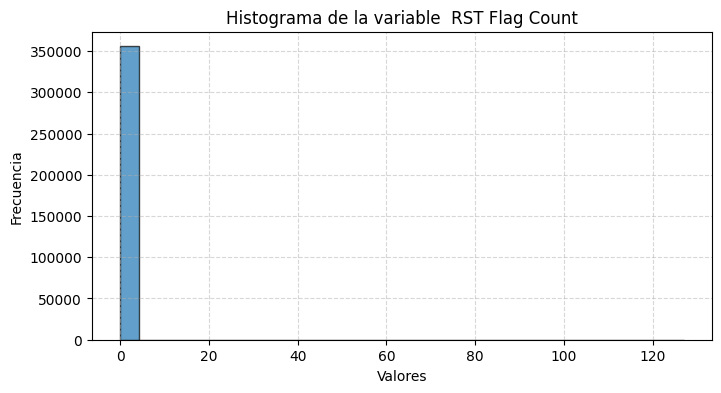

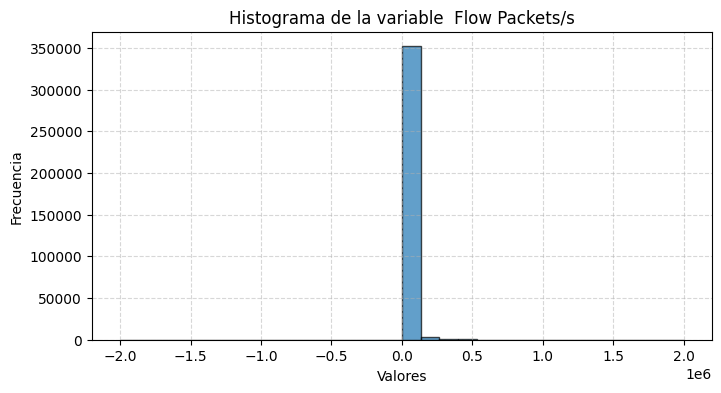

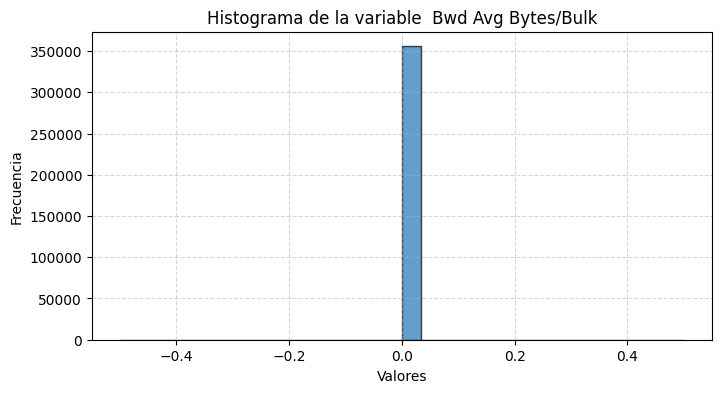

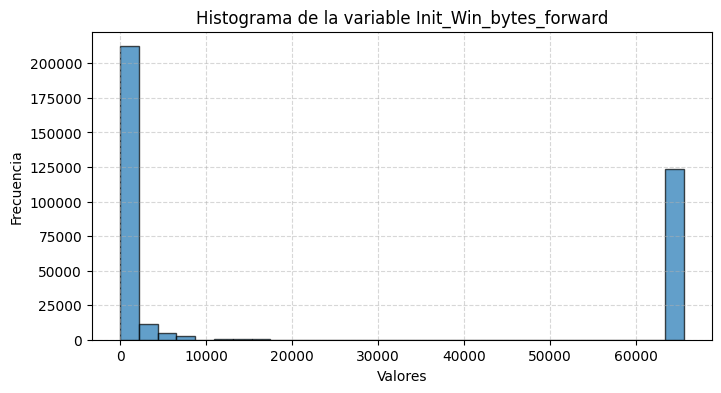

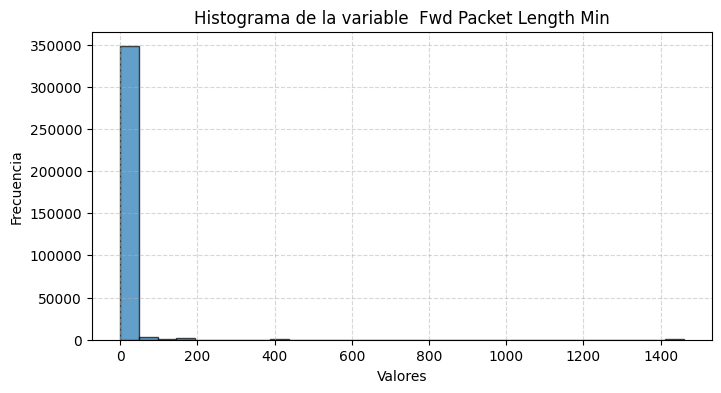

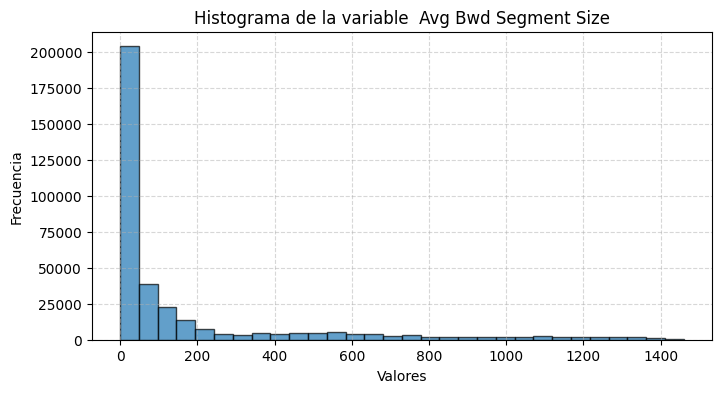

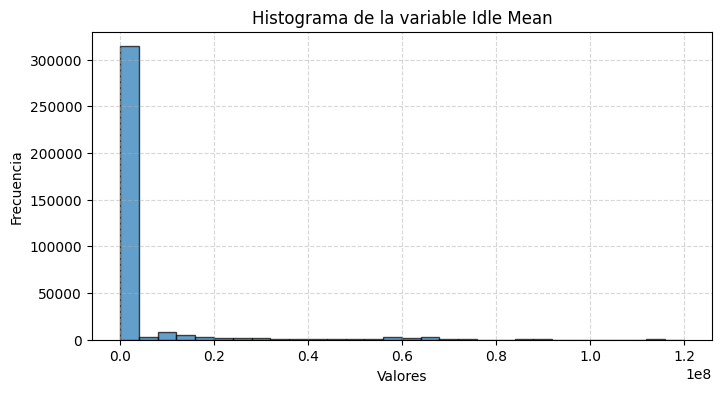

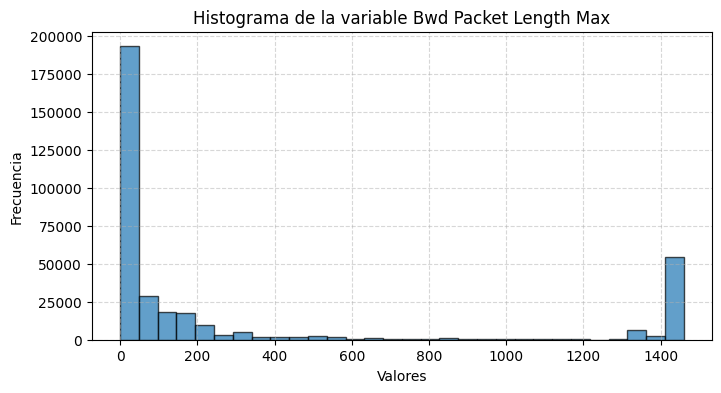

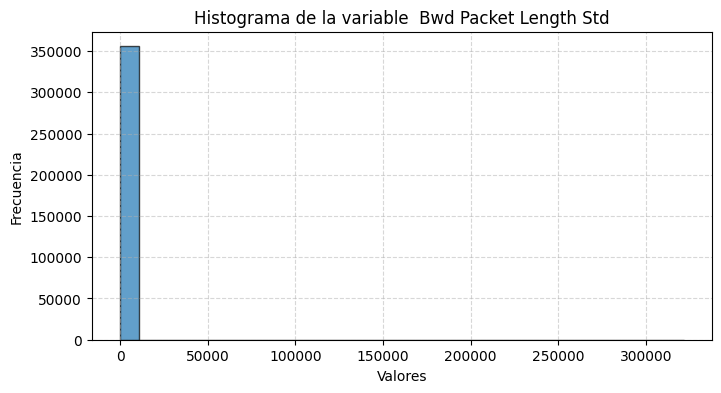

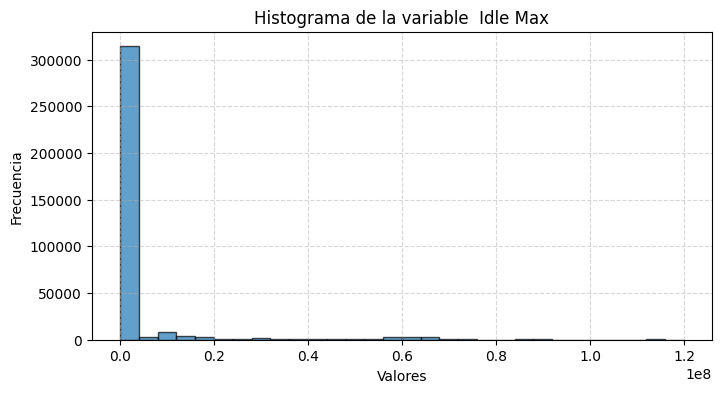

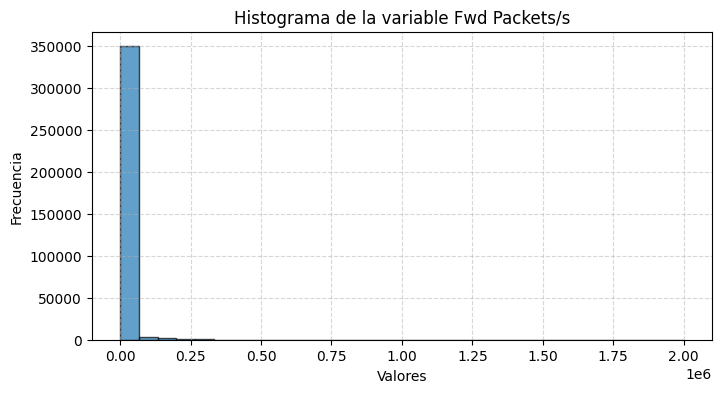

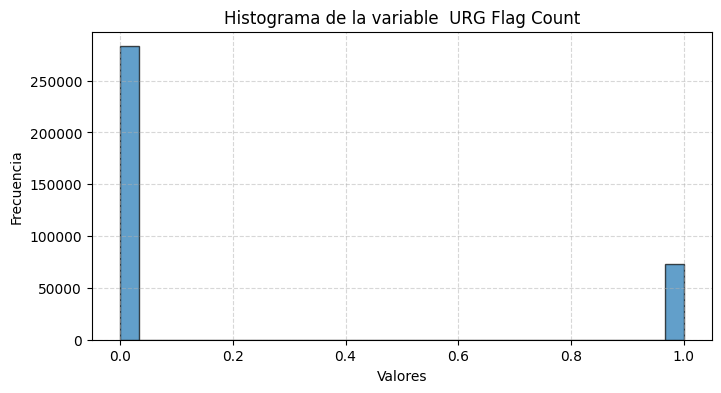

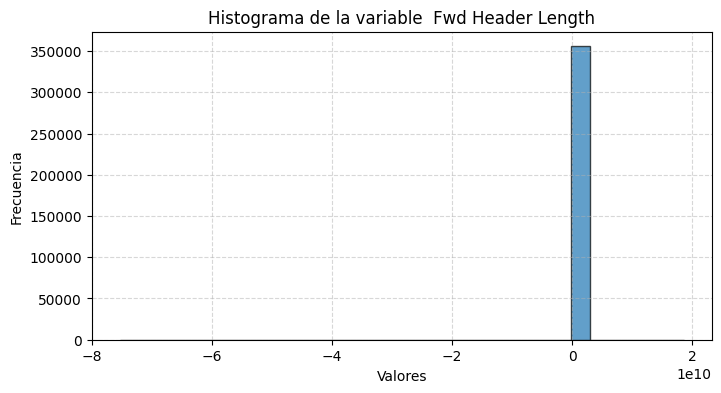

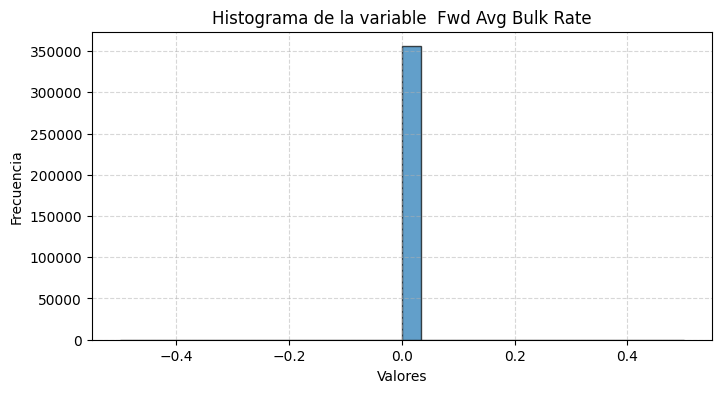

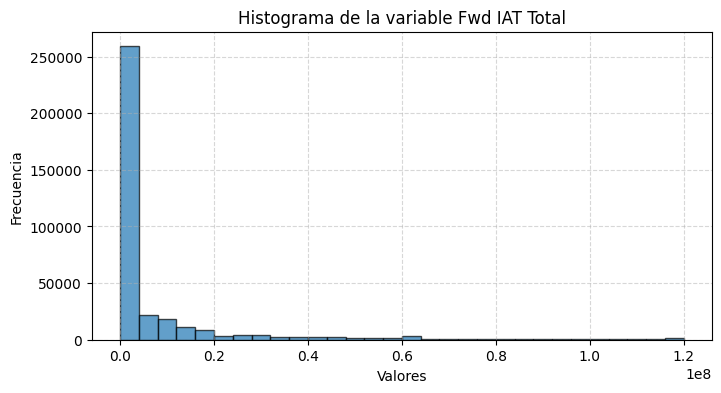

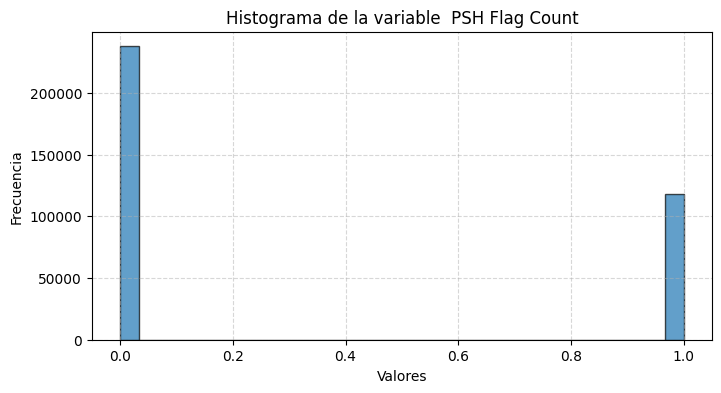

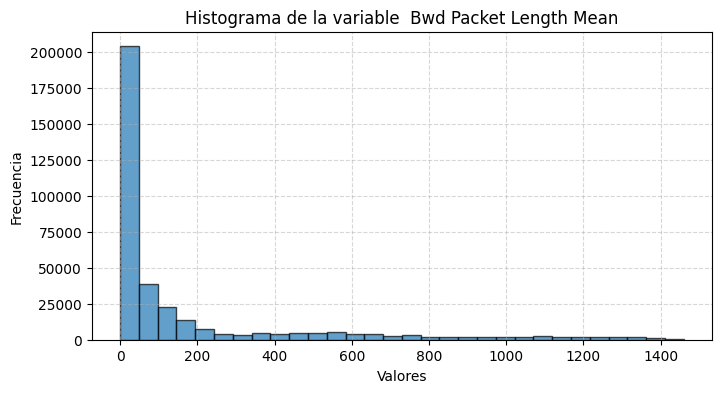

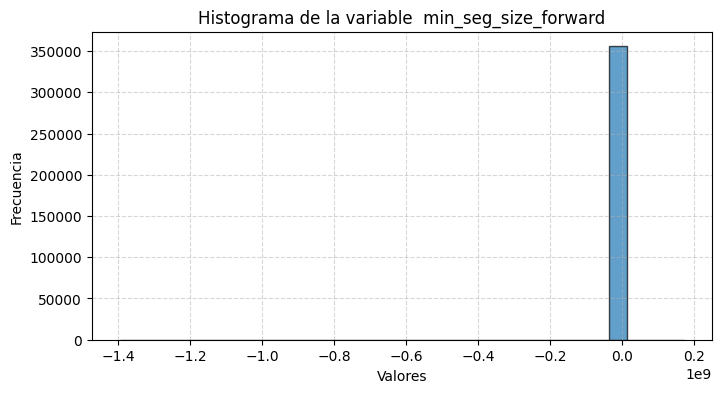

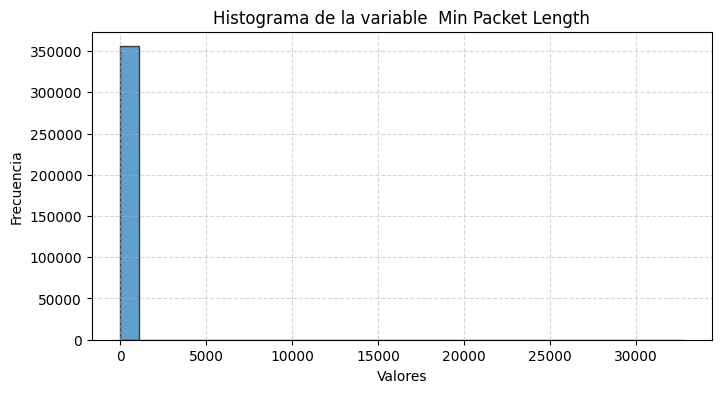

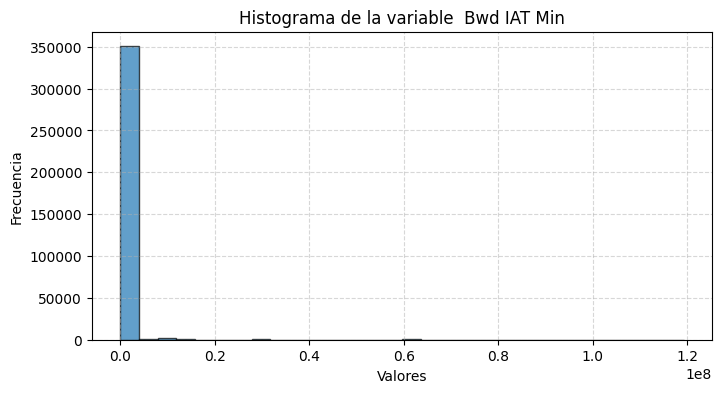

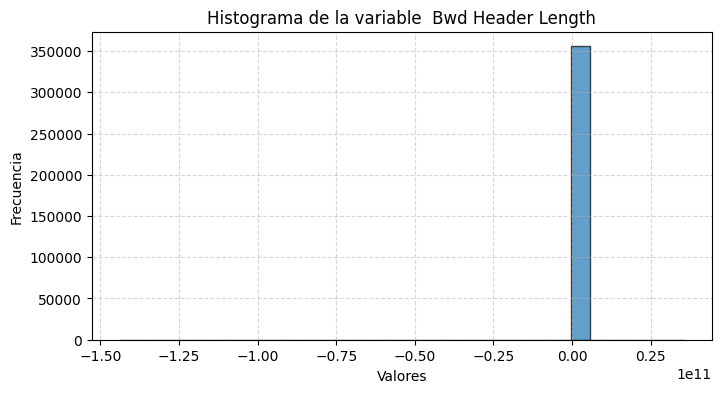

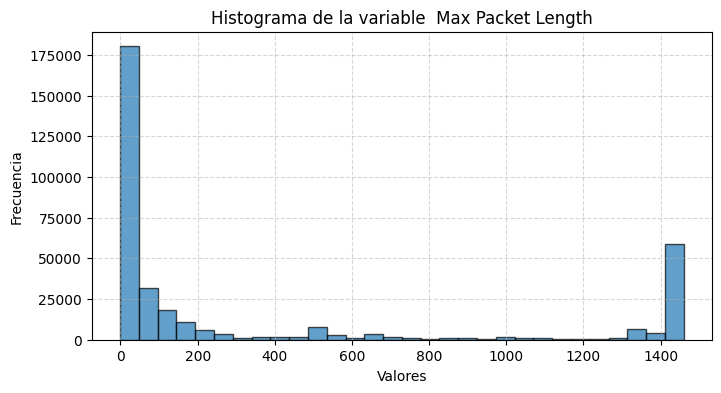

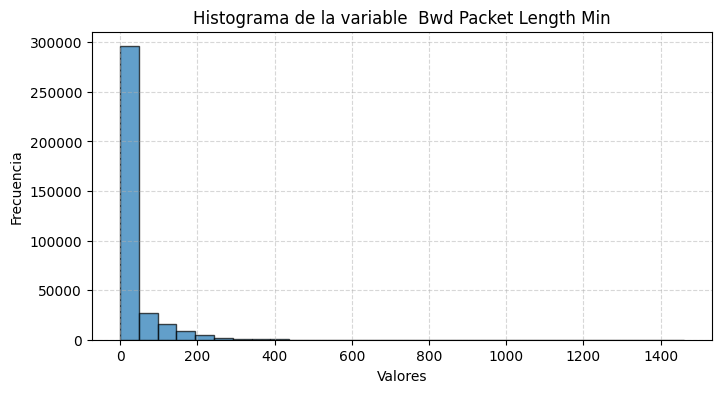

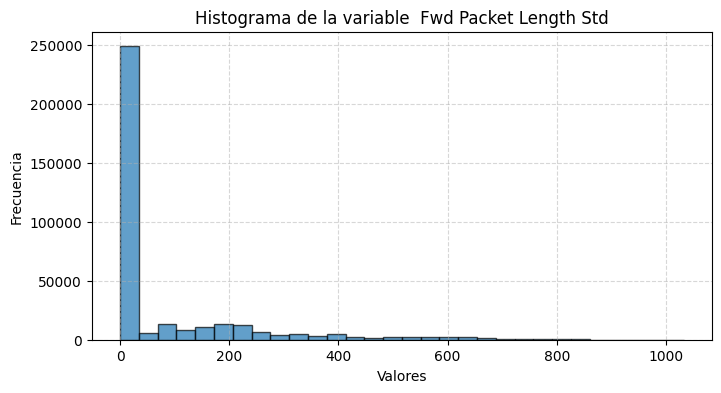

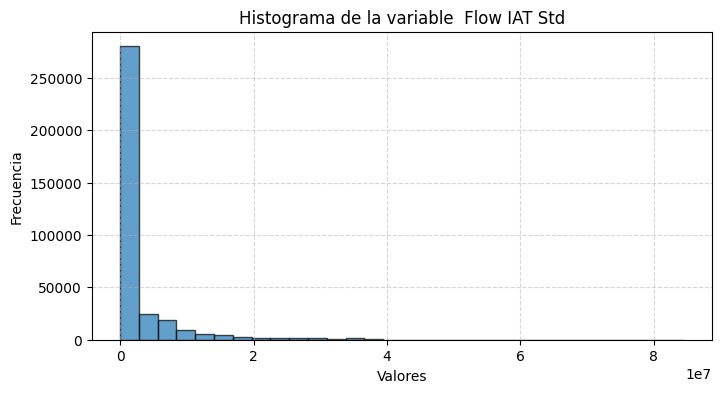

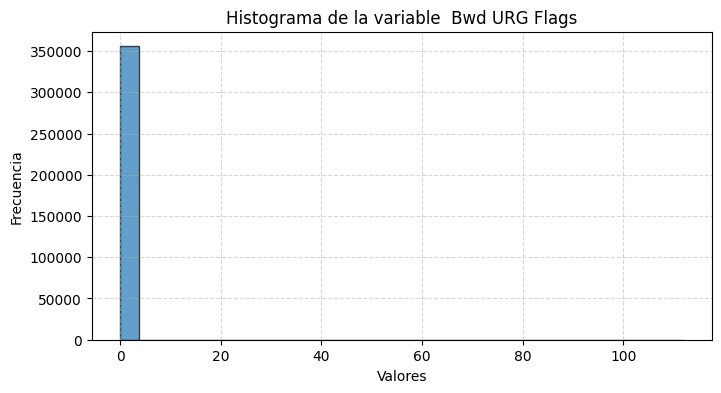

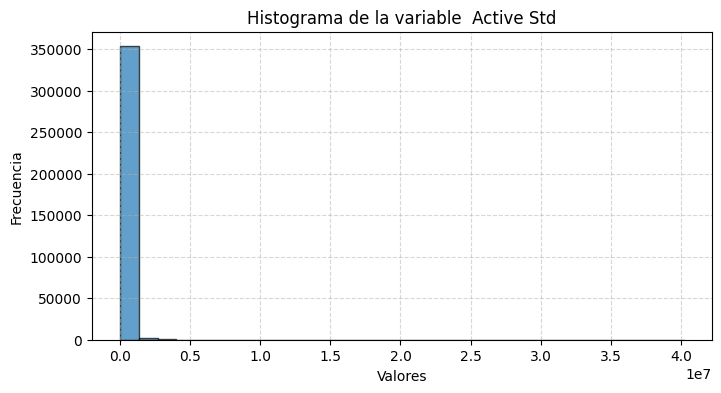

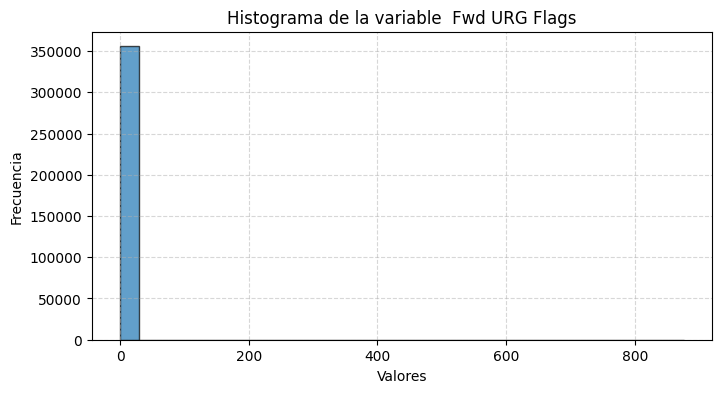

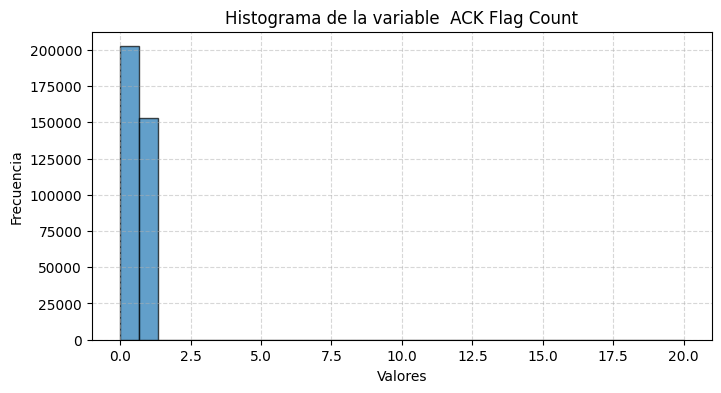

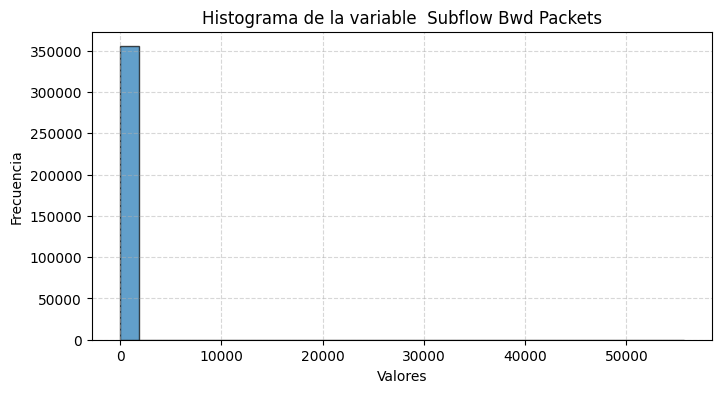

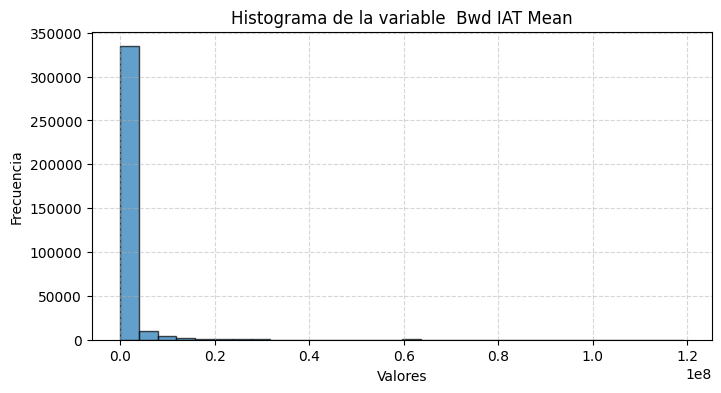

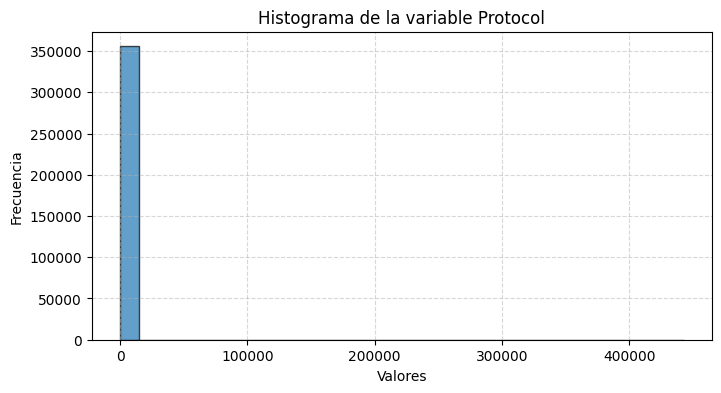

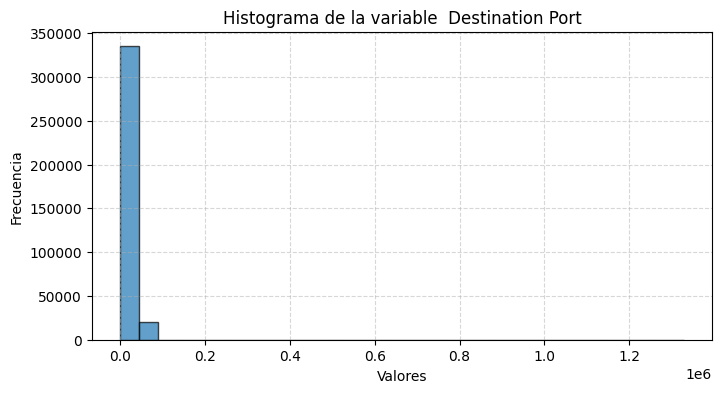

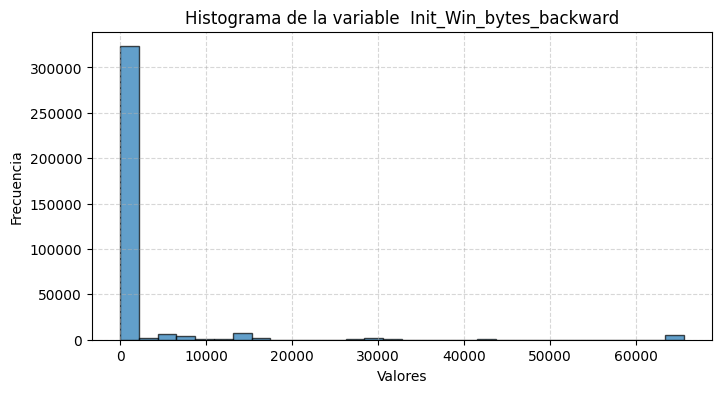

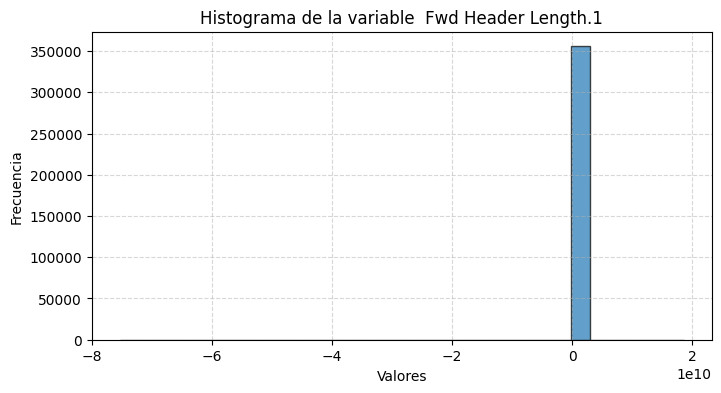

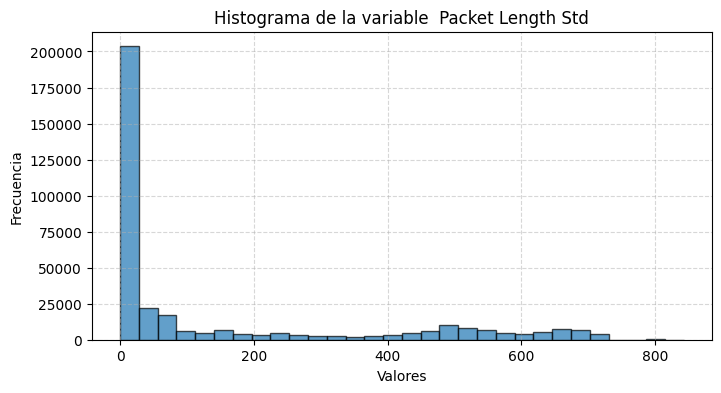

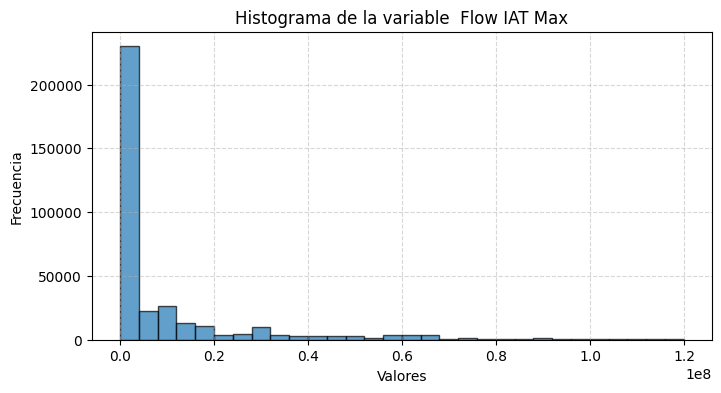

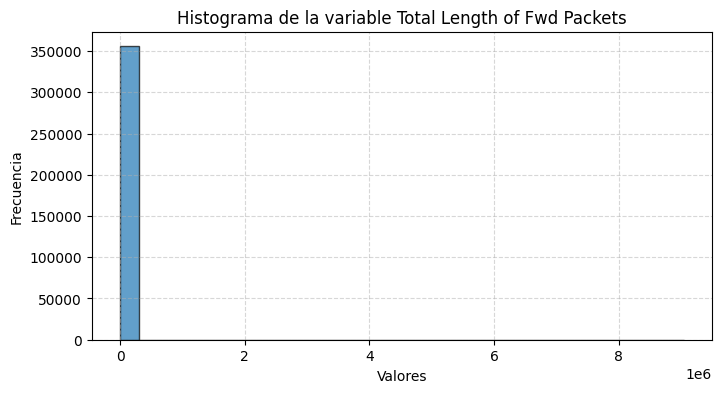

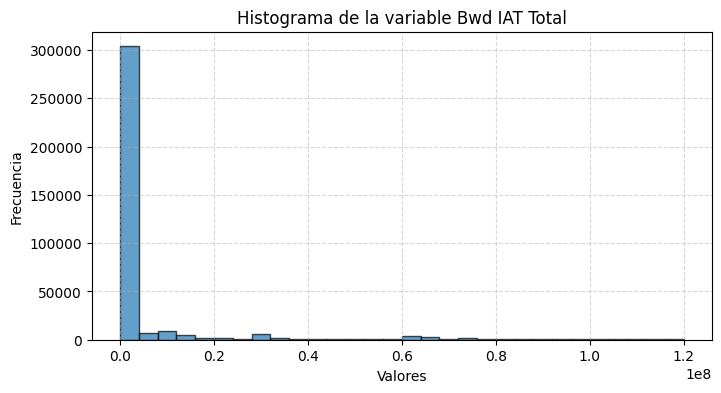

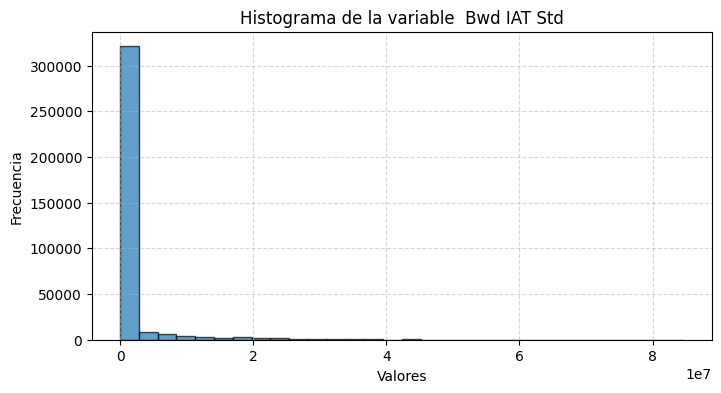

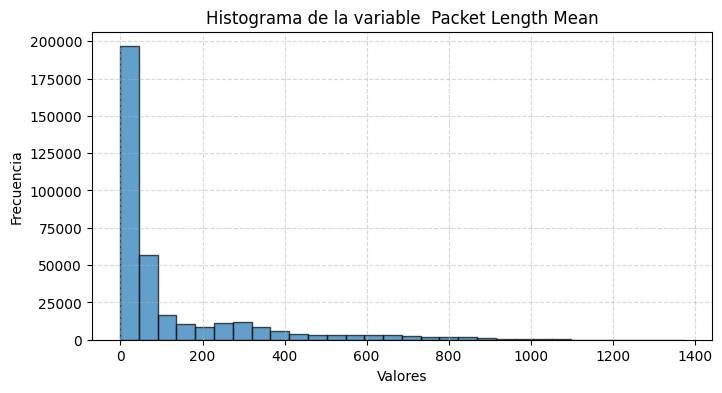

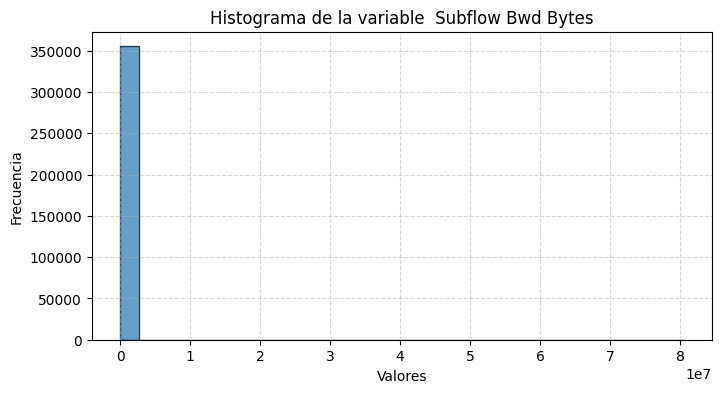

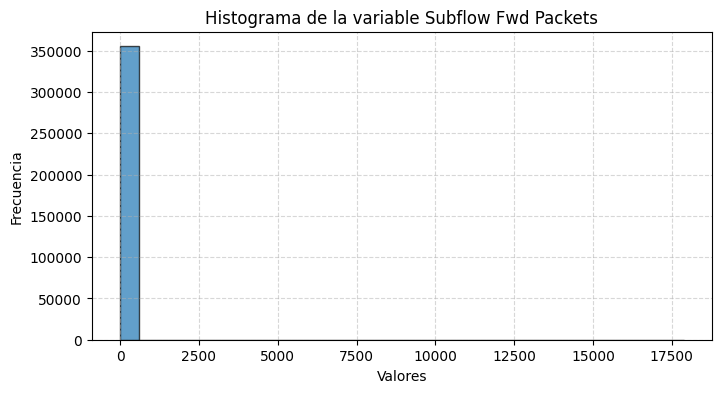

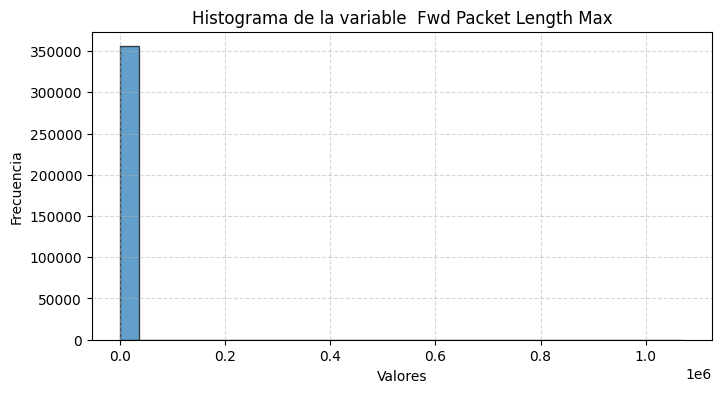

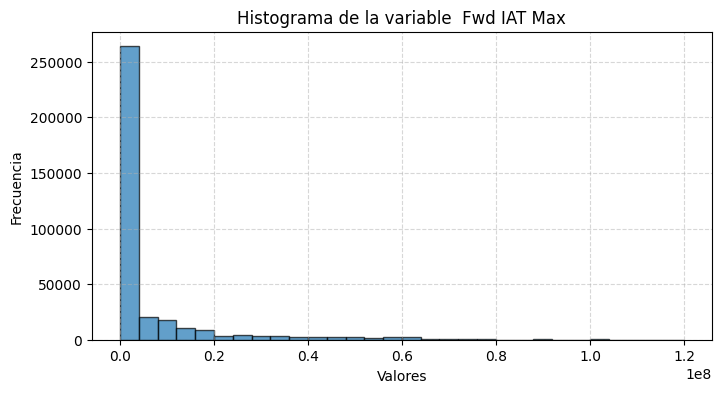

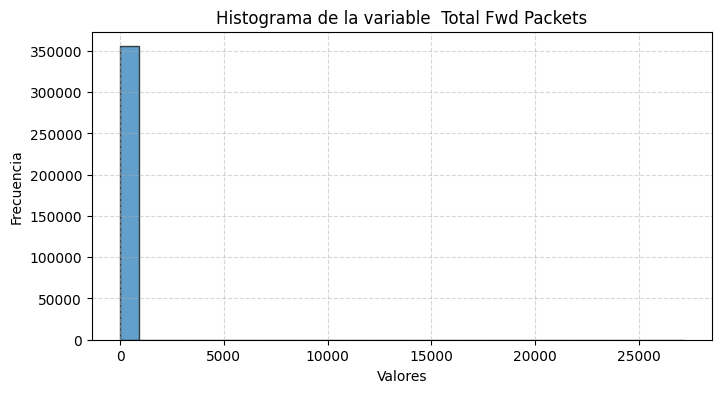

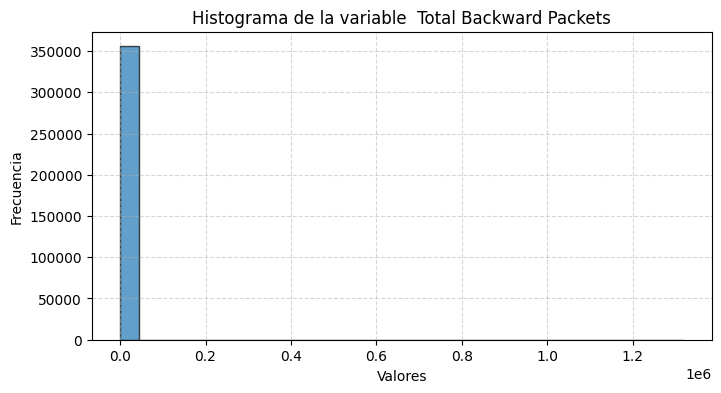

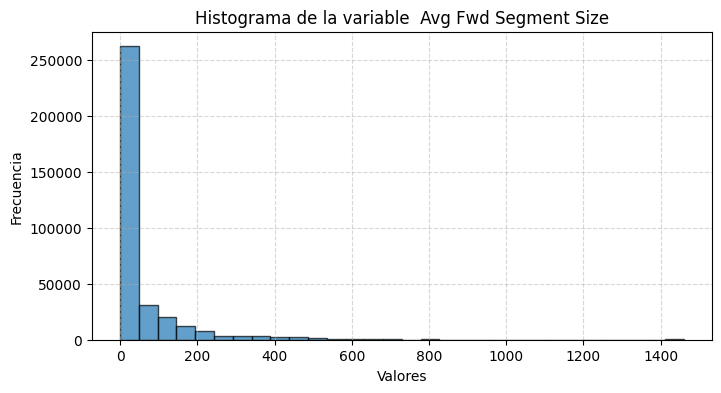

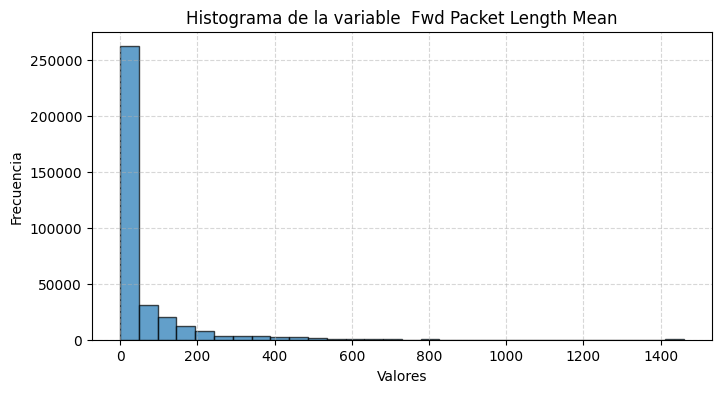

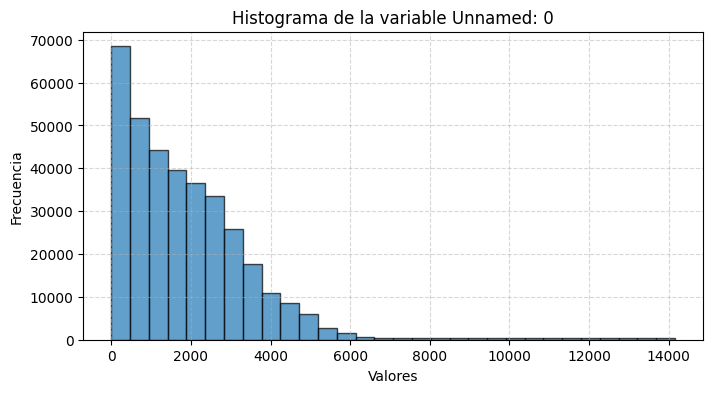

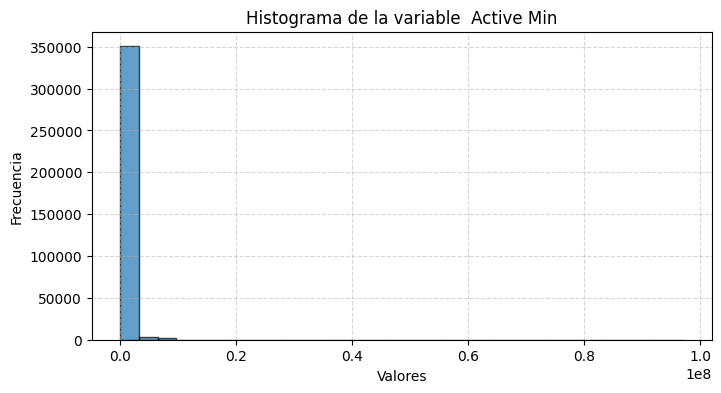

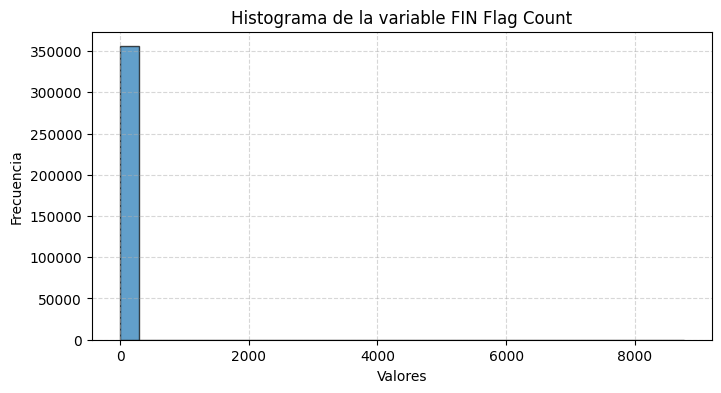

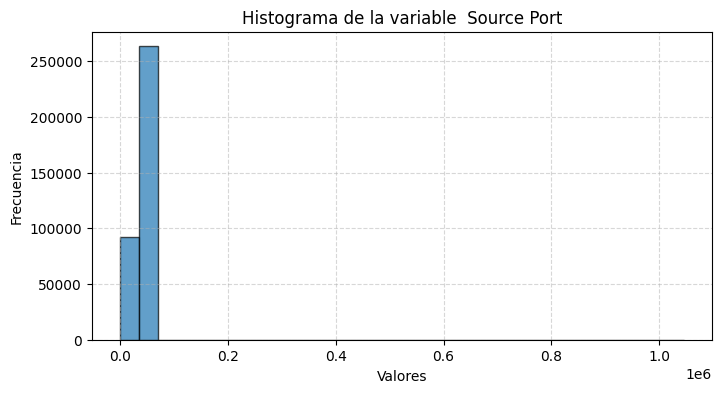

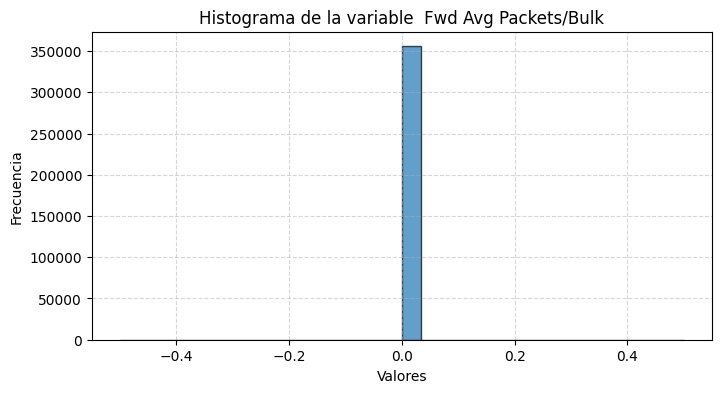

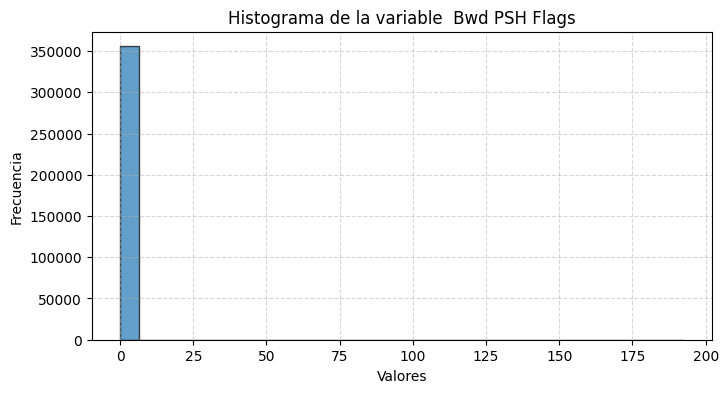

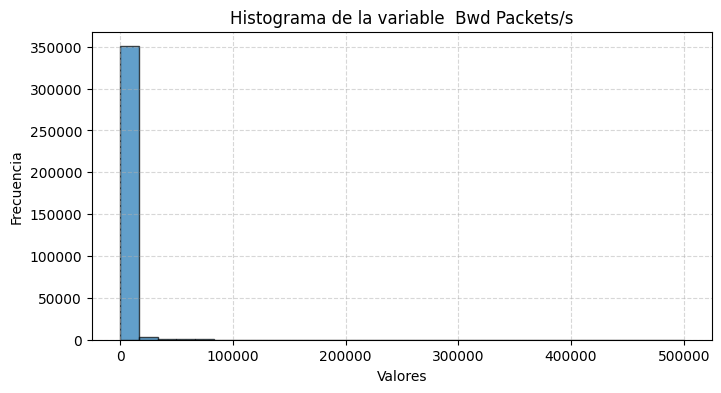

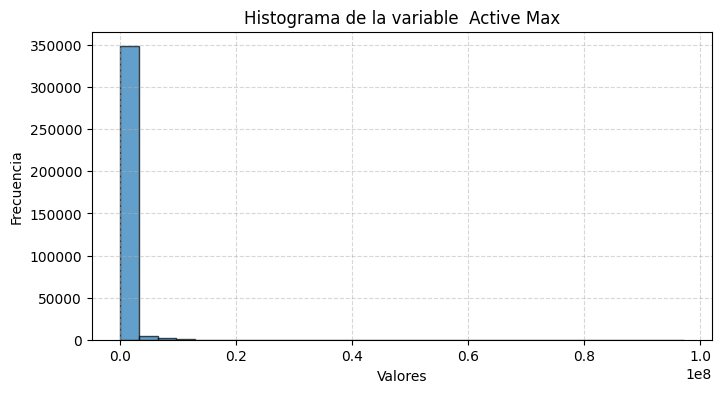

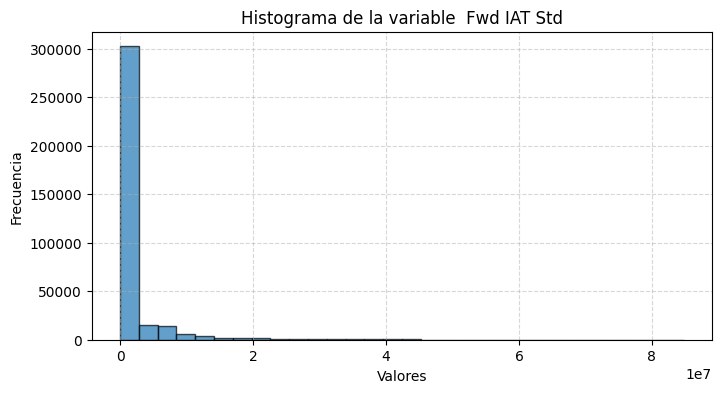

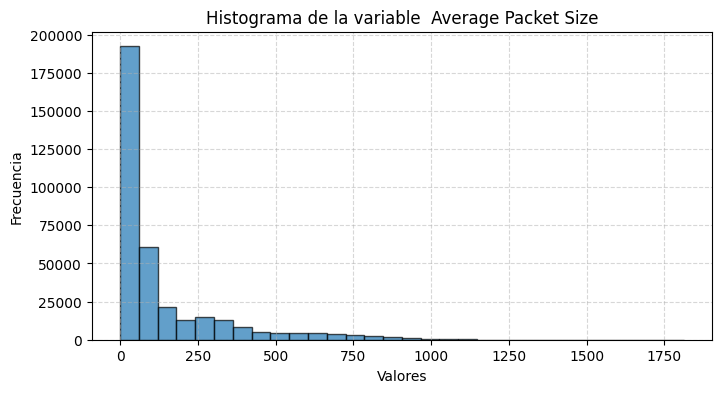

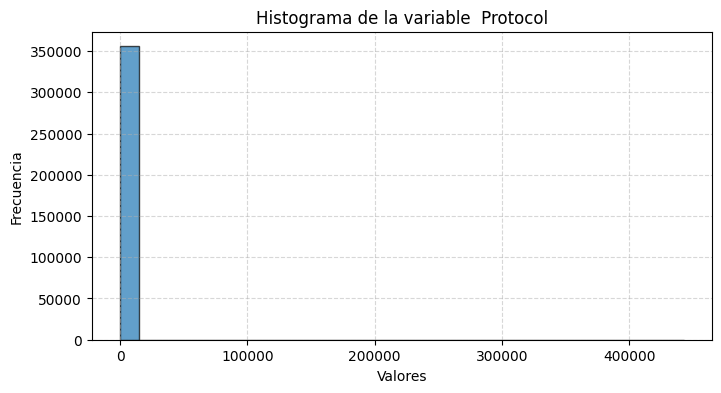

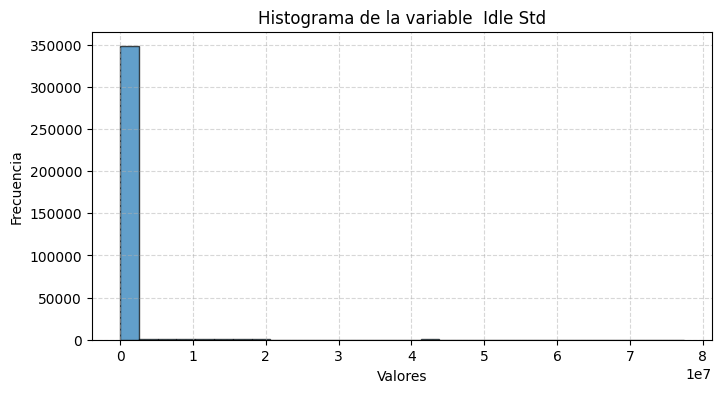

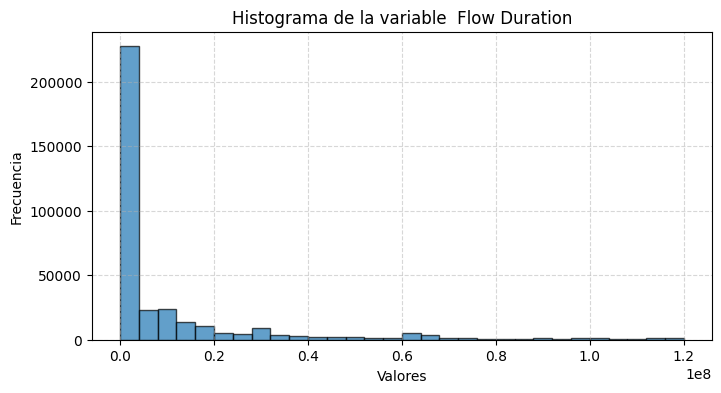

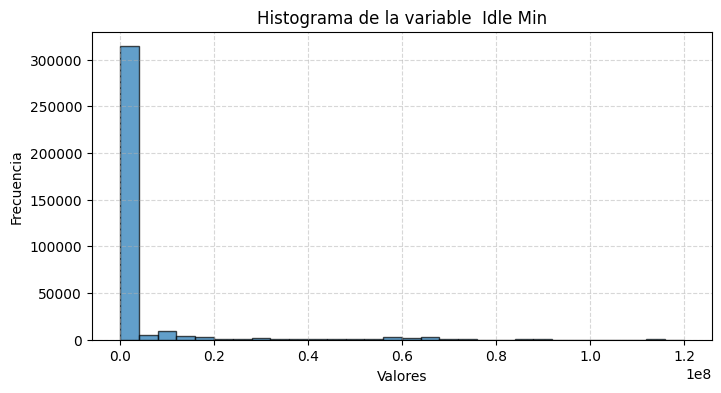

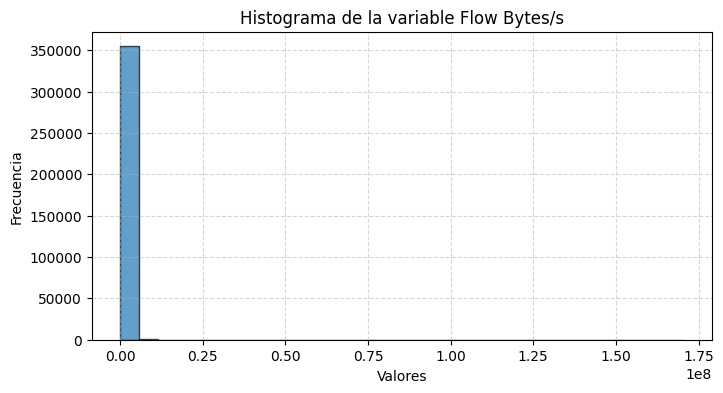

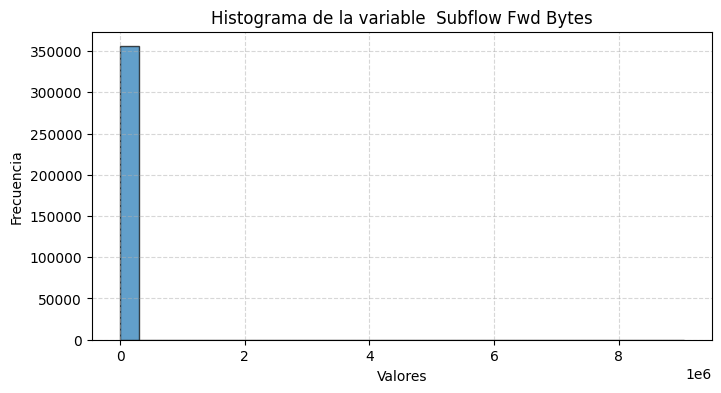

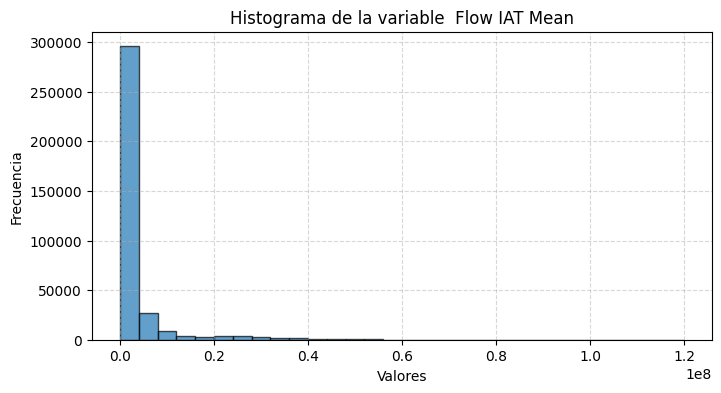

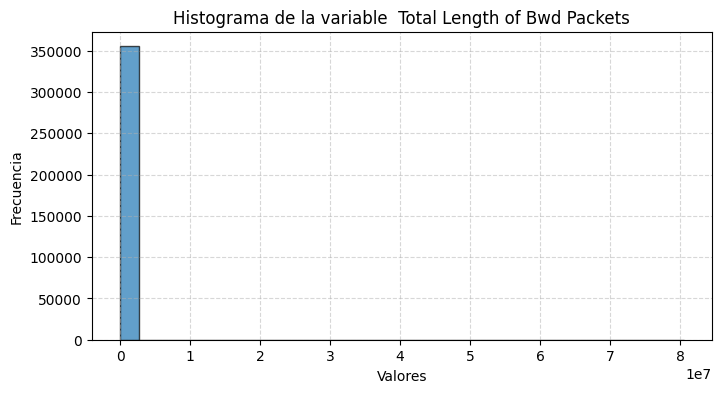

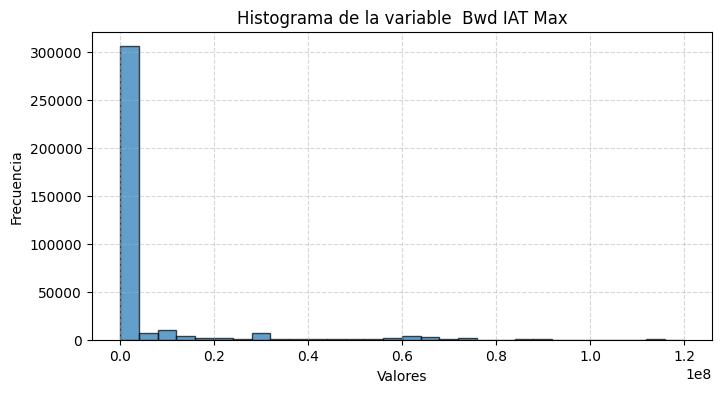

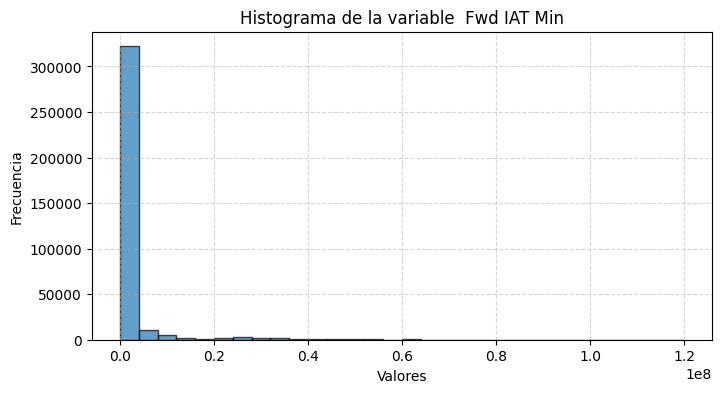

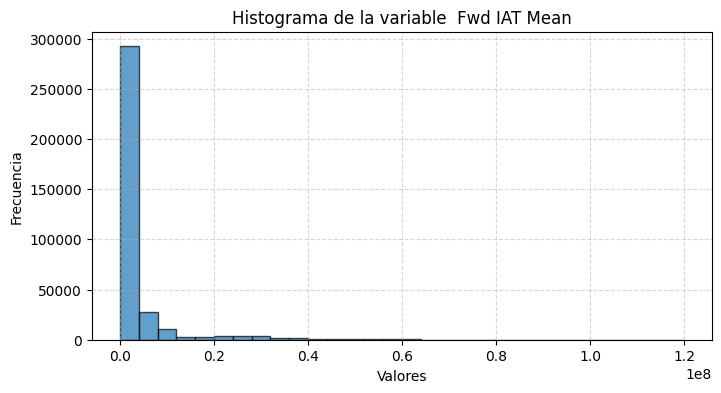

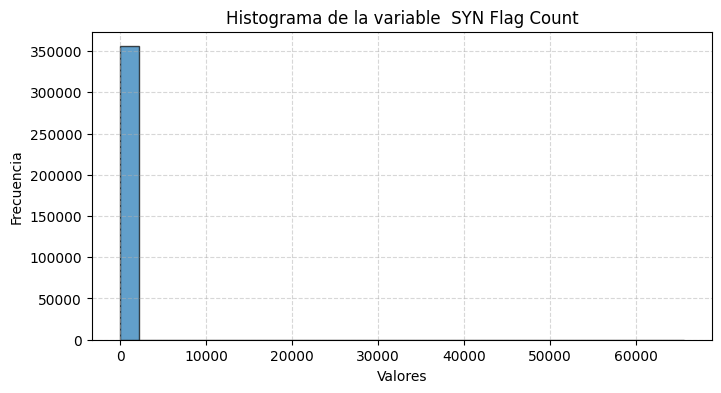

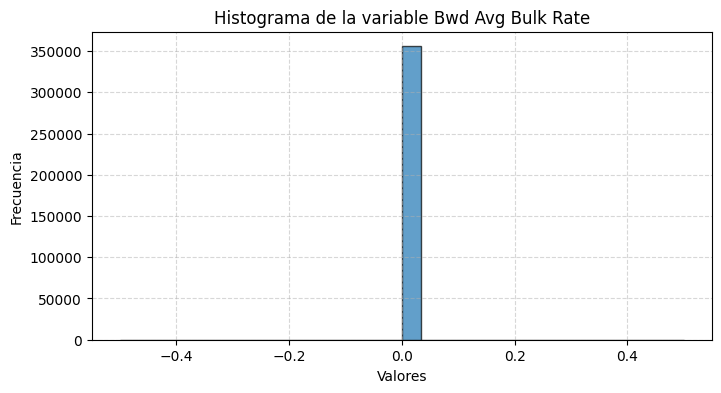

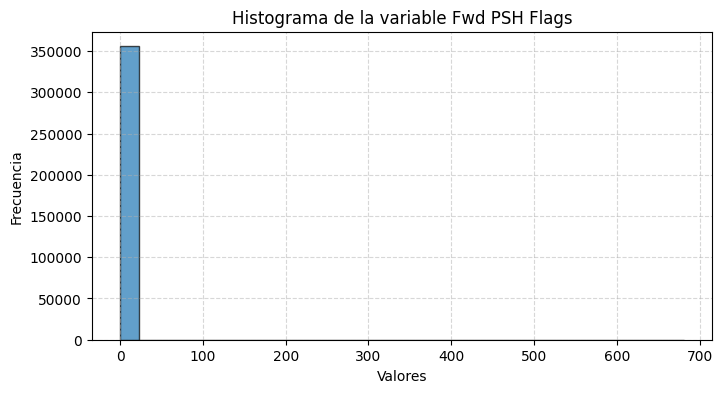

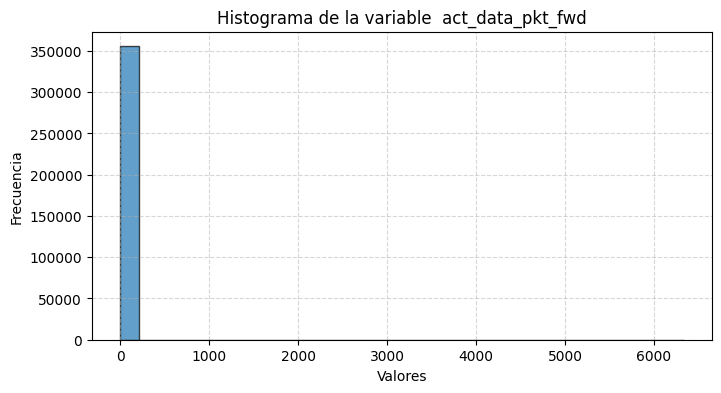

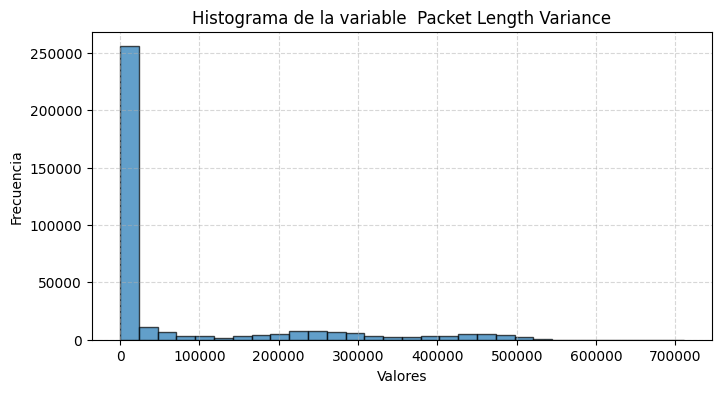

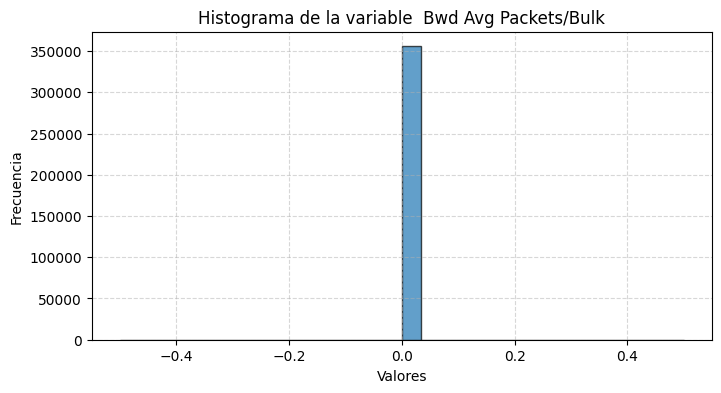

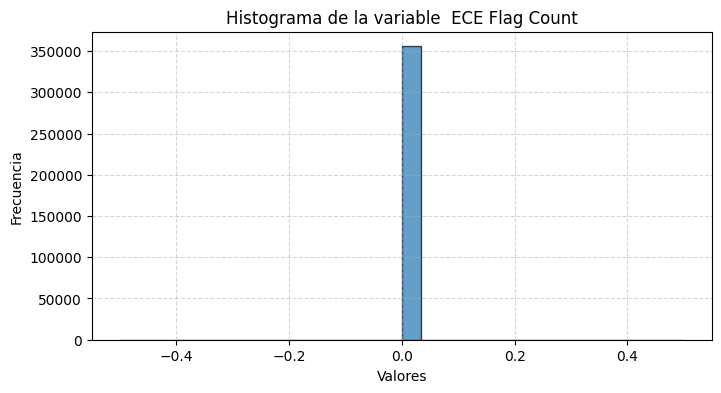

In [12]:
# Histograma de las columnas con posible sesgo
columnas_comunes = list(set(columnas_con_posible_sesgo) & set(df.select_dtypes(include=['number']).columns))
print("Columnas con posible sesgo y que son numéricas:", columnas_comunes)
for columna in columnas_comunes:
    plt.figure(figsize=(8, 4))  
    plt.hist(df[columna].dropna(), bins=30, edgecolor='black', alpha=0.7)  
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de la variable {columna}')
    plt.grid(True, linestyle="--", alpha=0.5)  
    plt.show()

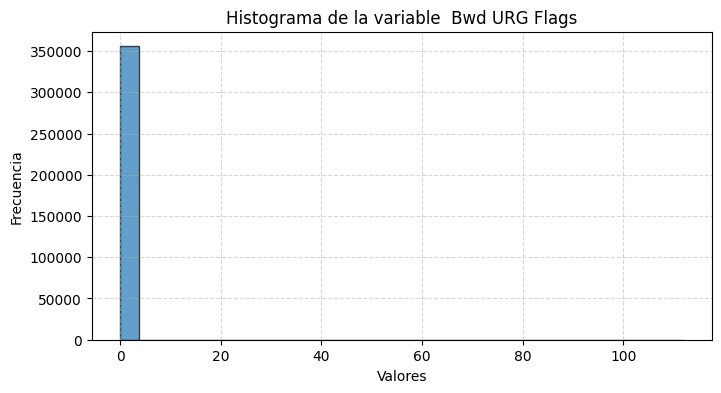

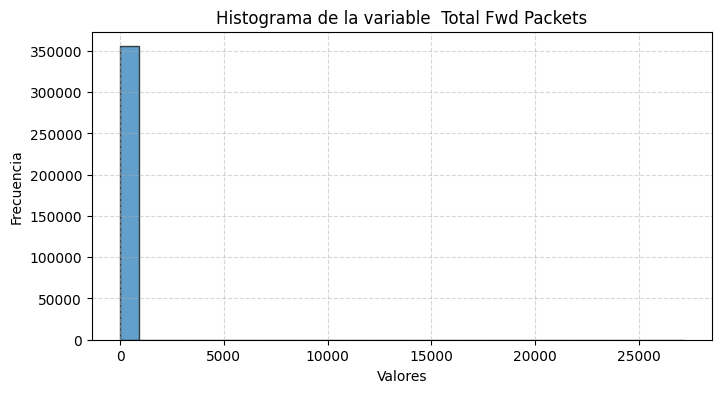

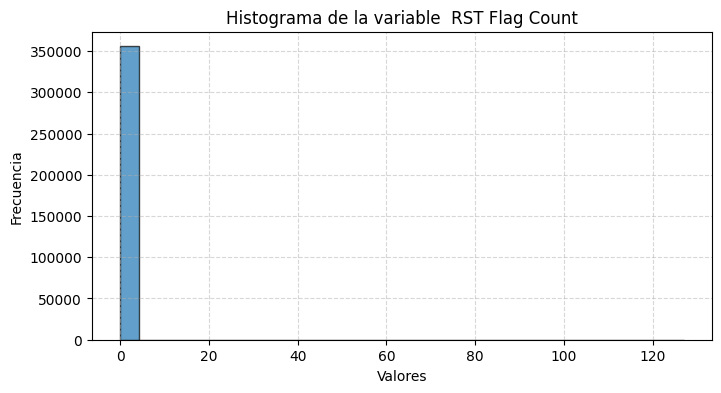

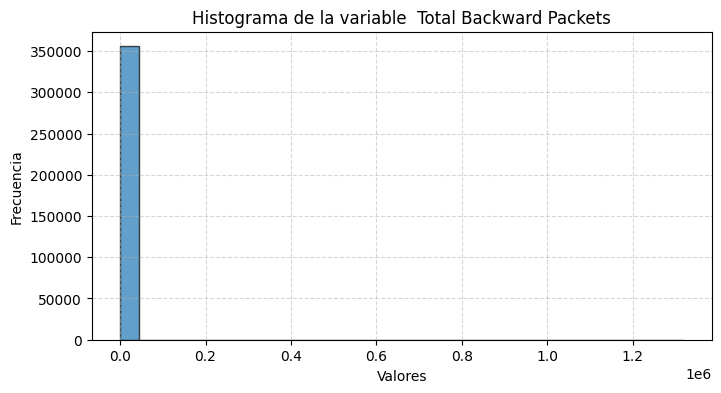

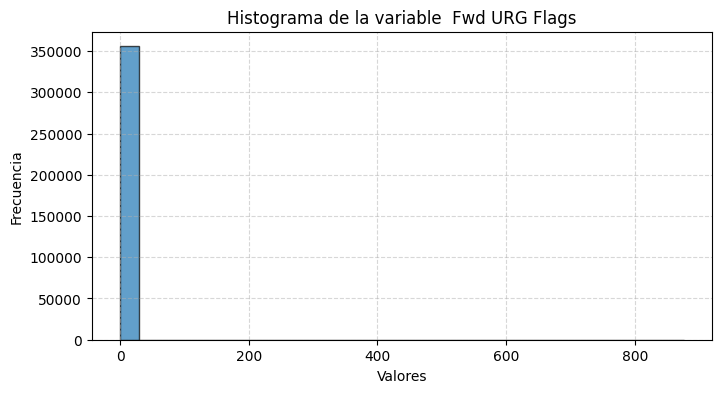

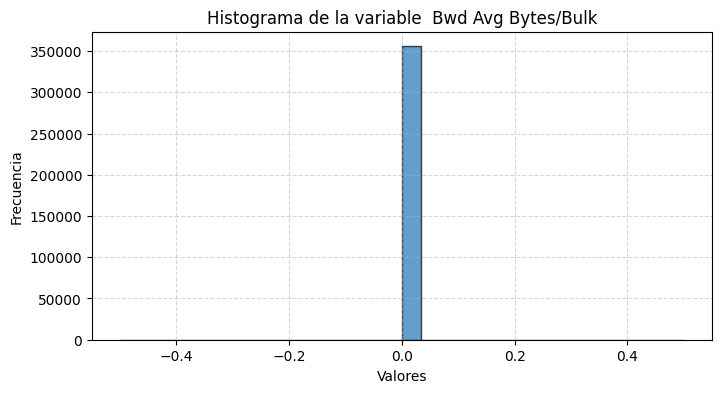

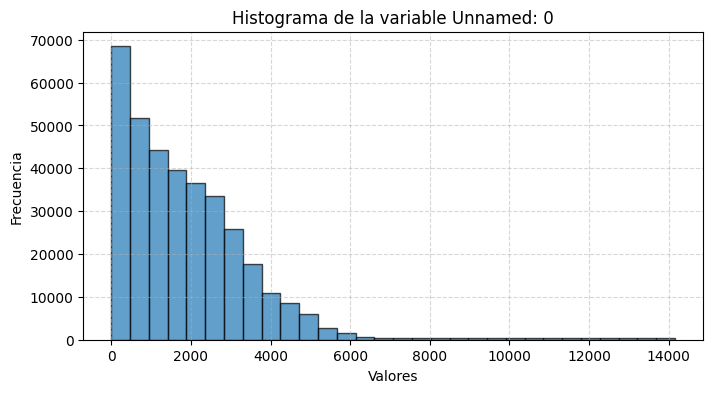

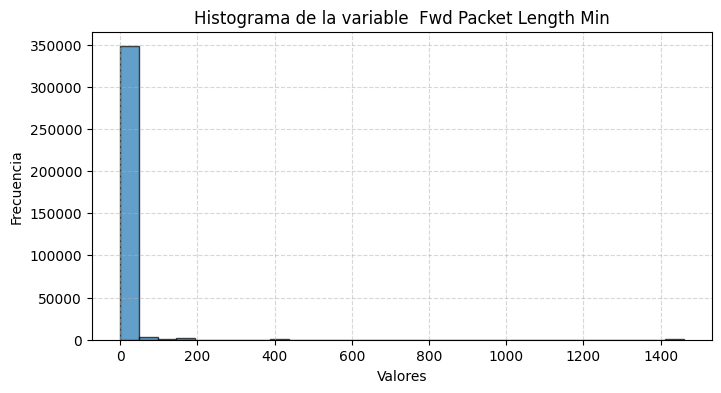

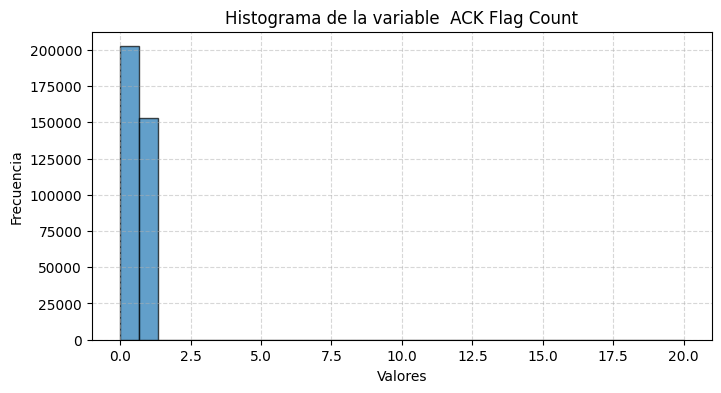

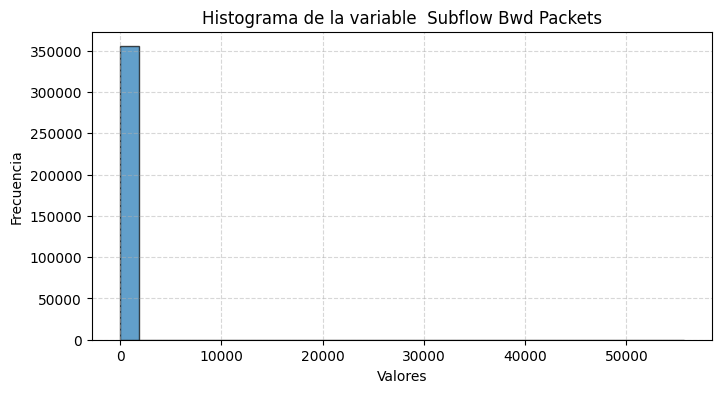

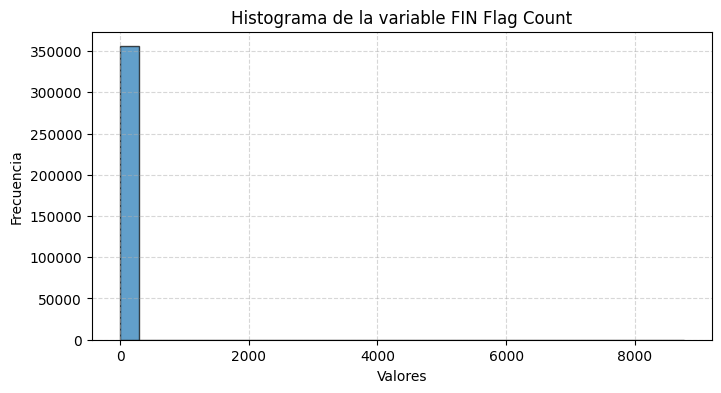

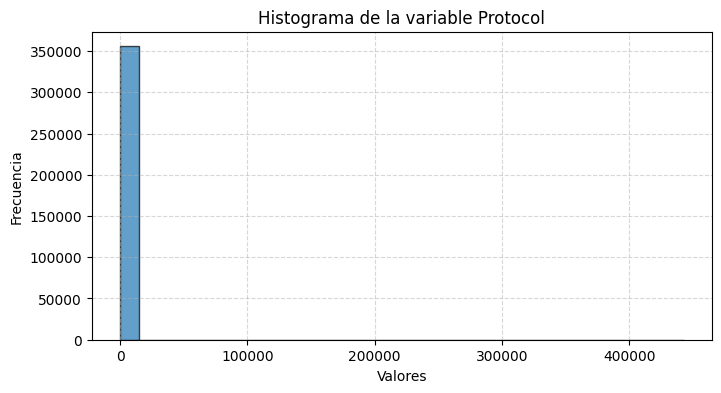

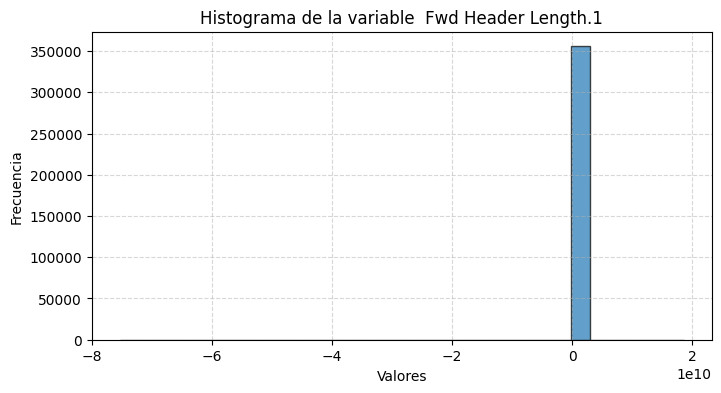

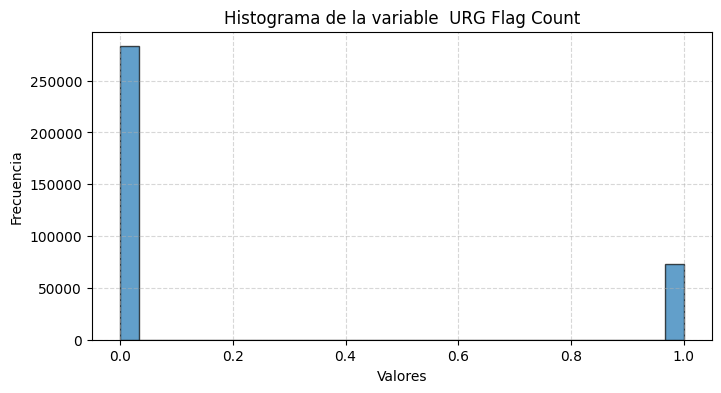

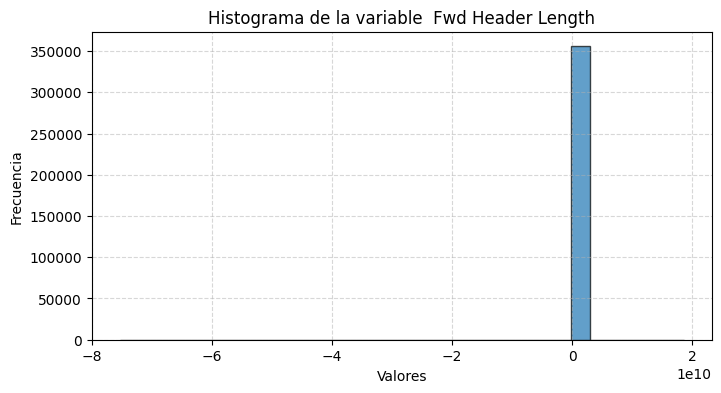

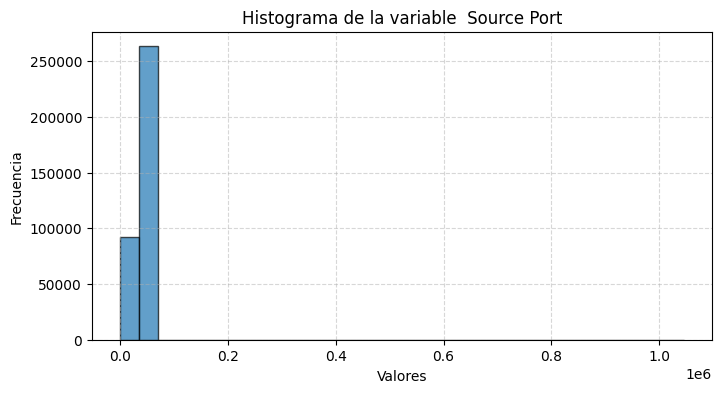

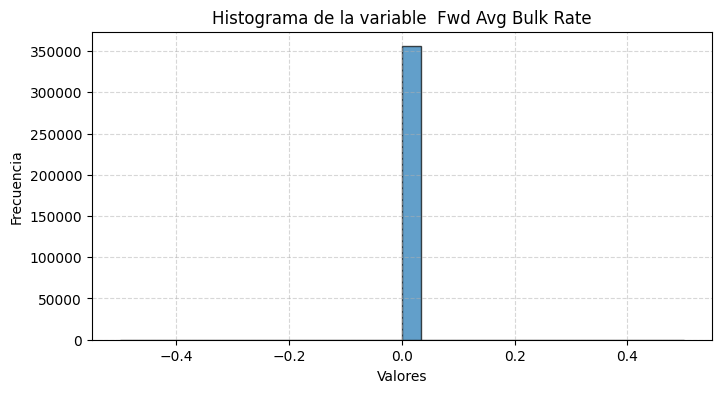

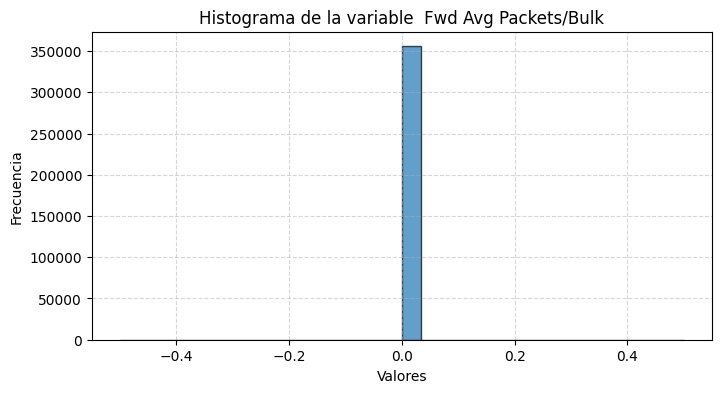

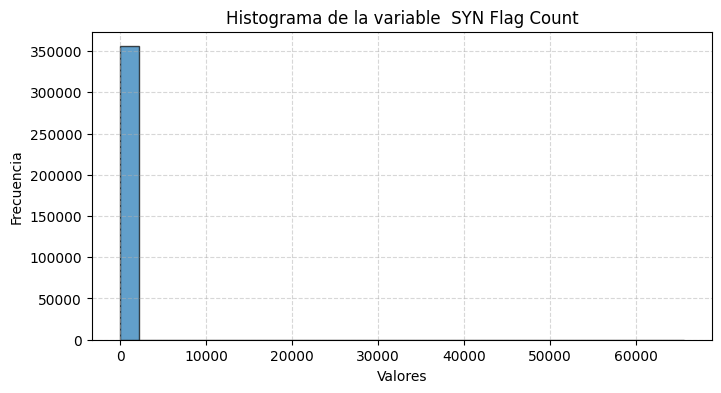

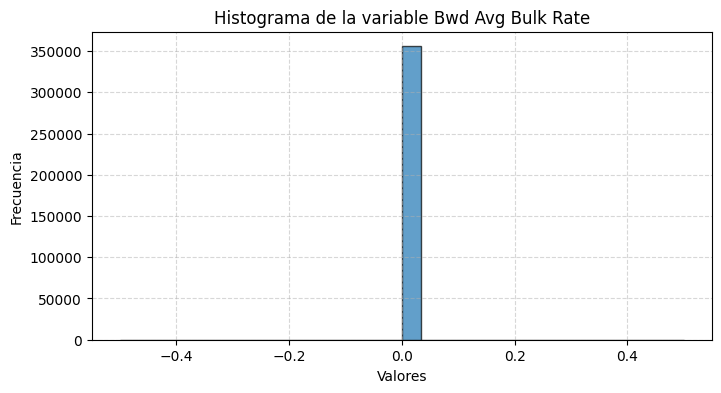

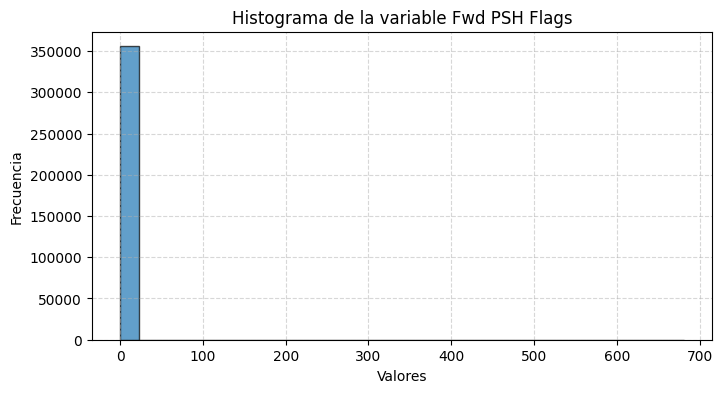

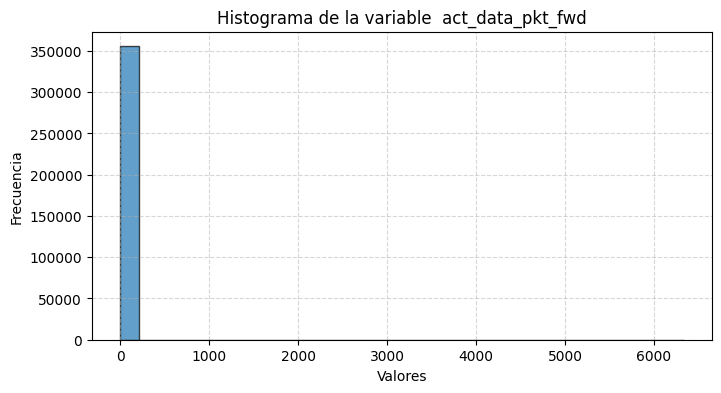

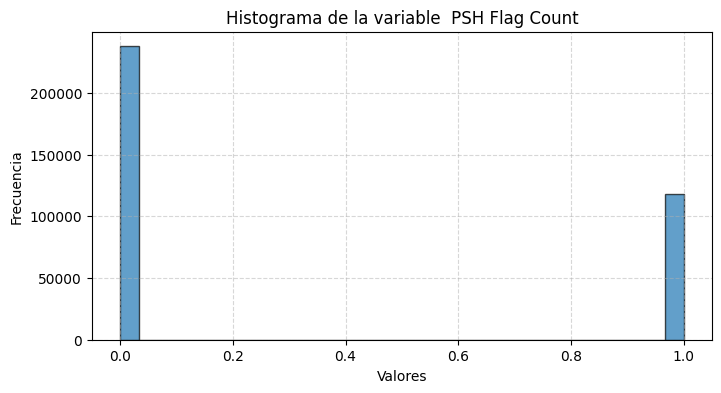

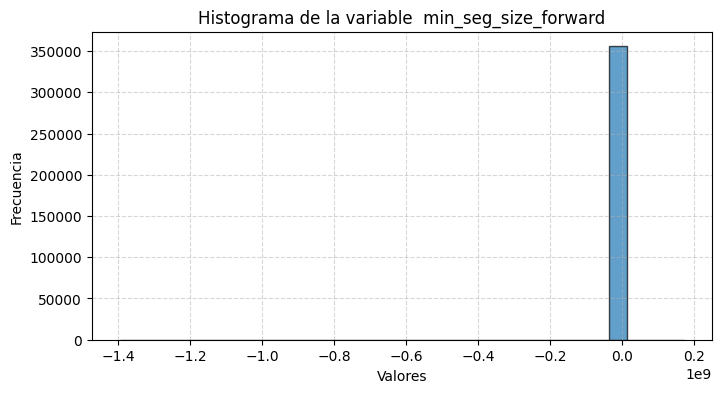

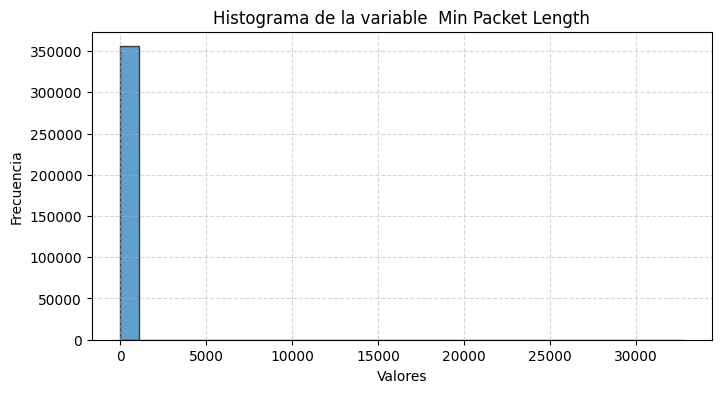

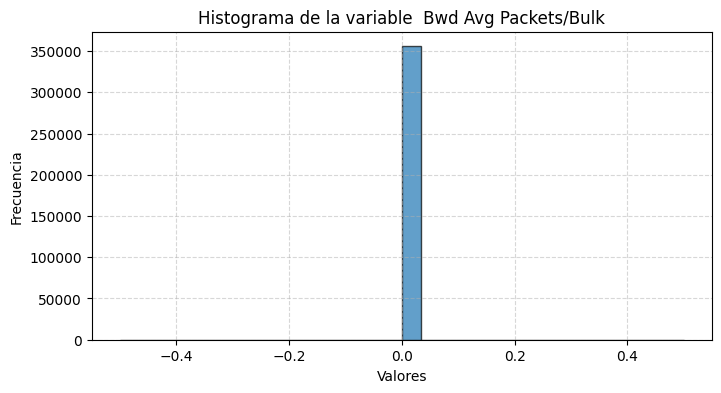

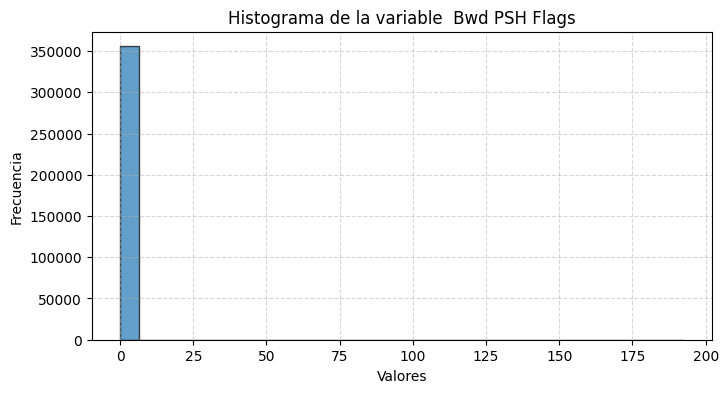

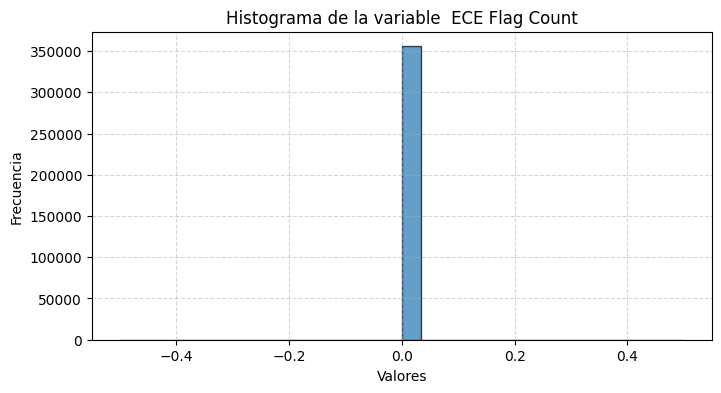

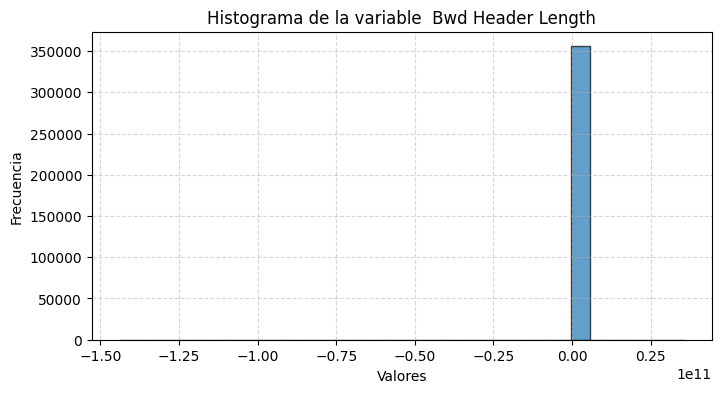

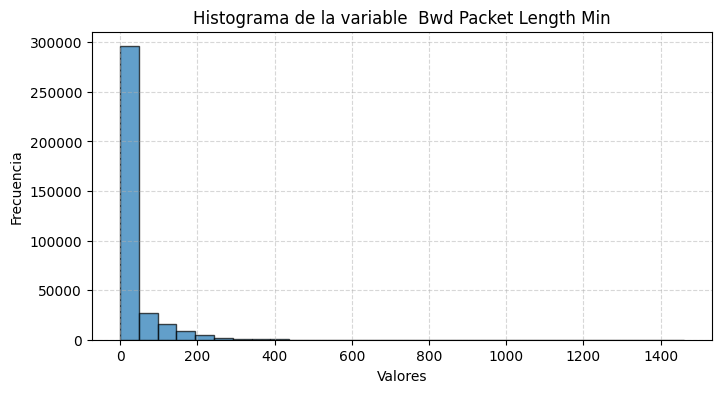

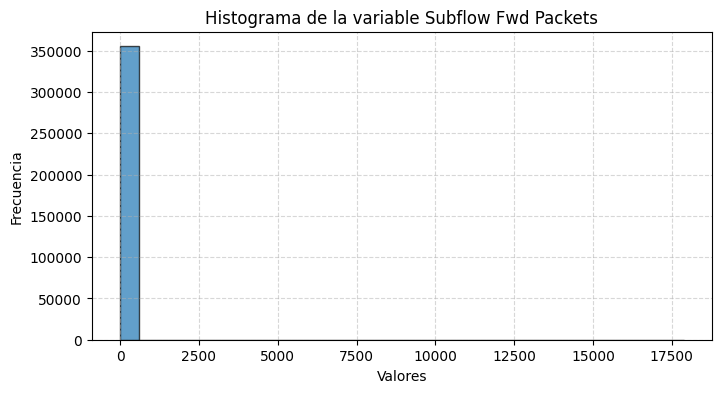

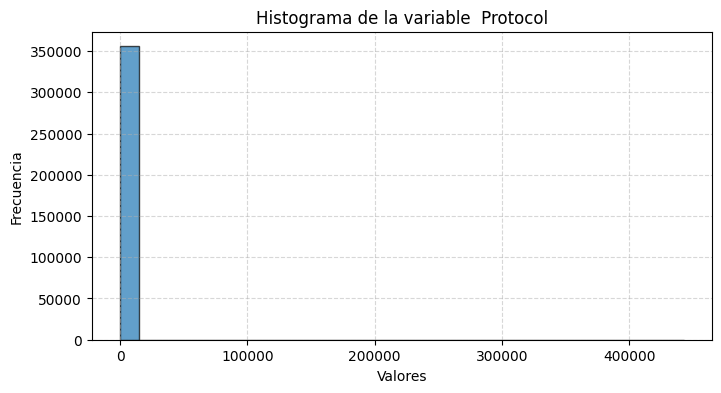

In [13]:
#Histograma de las columnas con posible distribución normal
columnas_comunes = list(set(columnas_distribucion_normal) & set(df.select_dtypes(include=['number']).columns))
for columna in columnas_comunes:
    plt.figure(figsize=(8, 4)) 
    plt.hist(df[columna].dropna(), bins=30, edgecolor='black', alpha=0.7)  
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de la variable {columna}')
    plt.grid(True, linestyle="--", alpha=0.5)  
    plt.show()

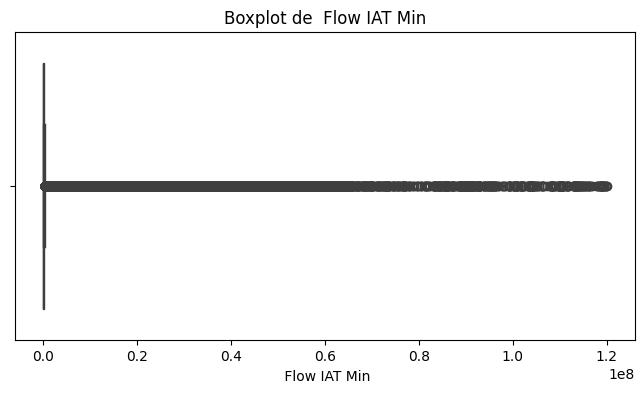

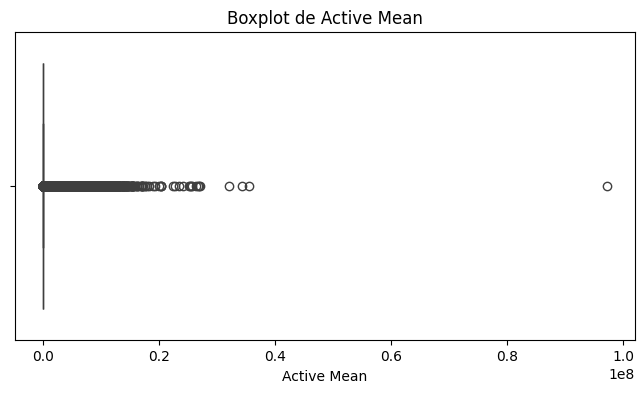

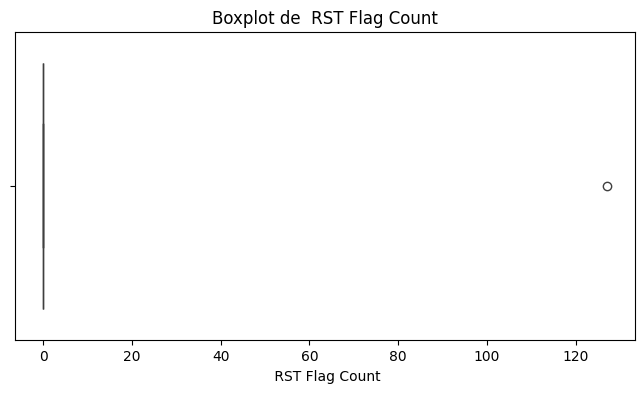

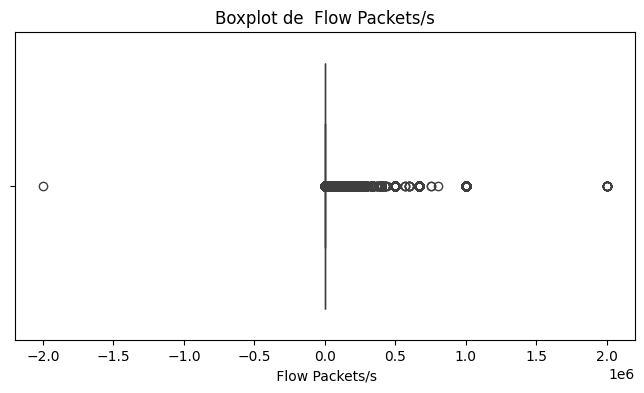

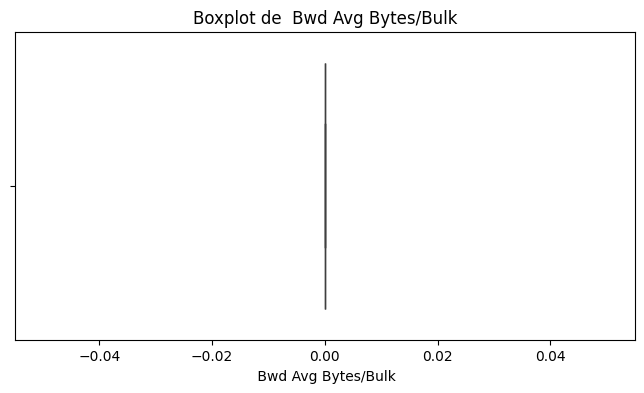

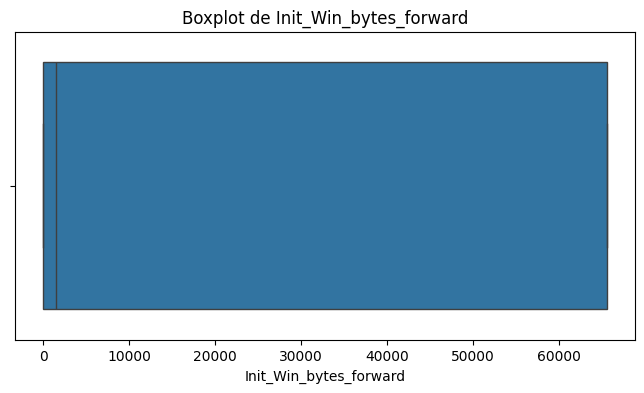

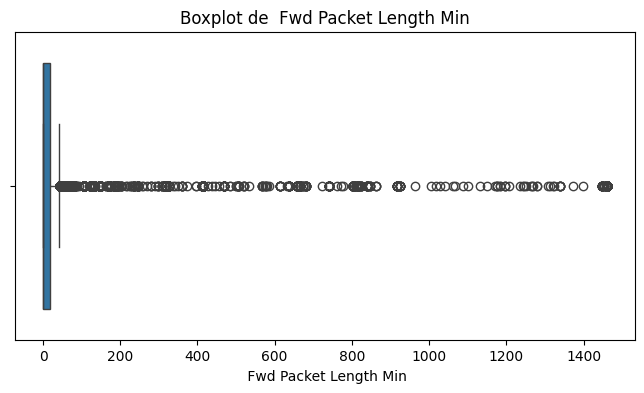

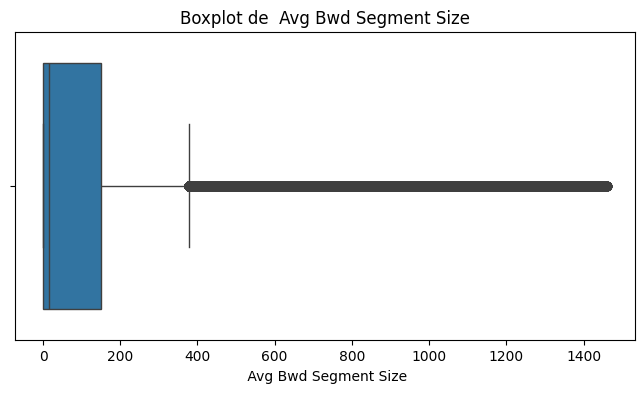

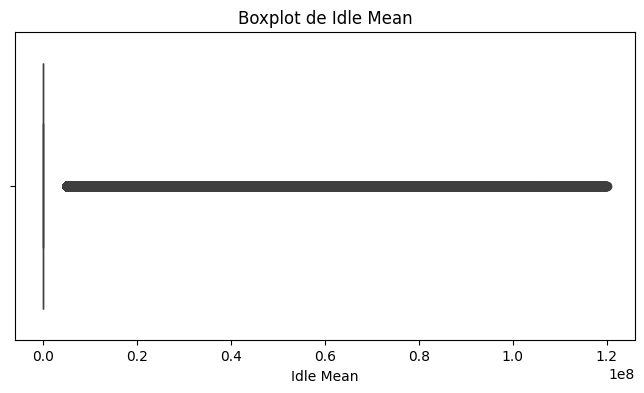

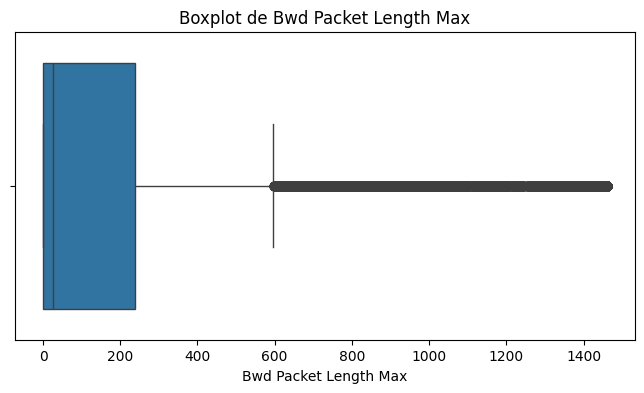

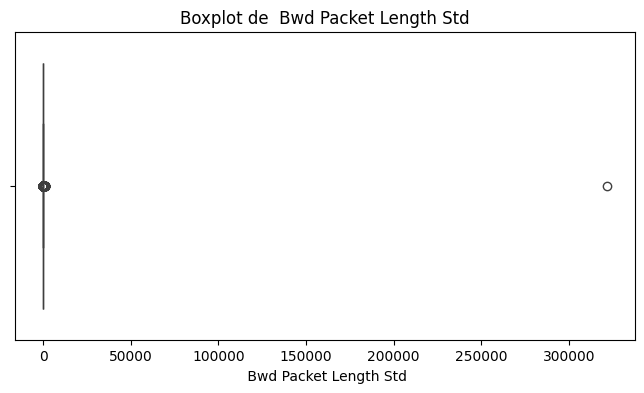

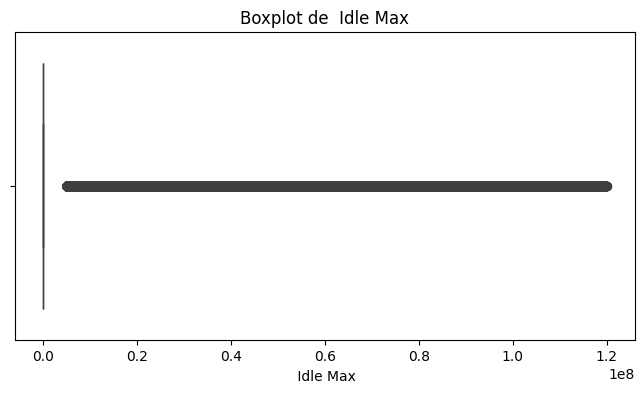

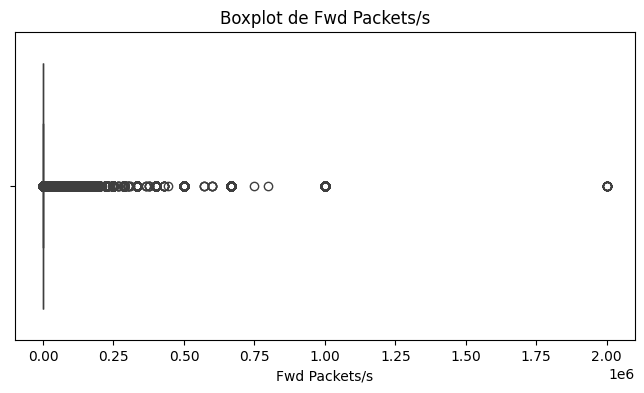

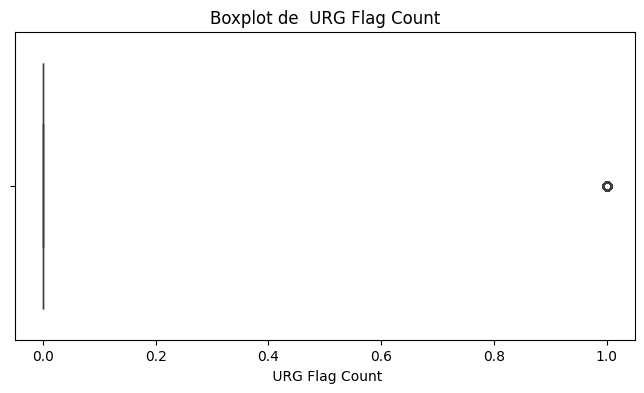

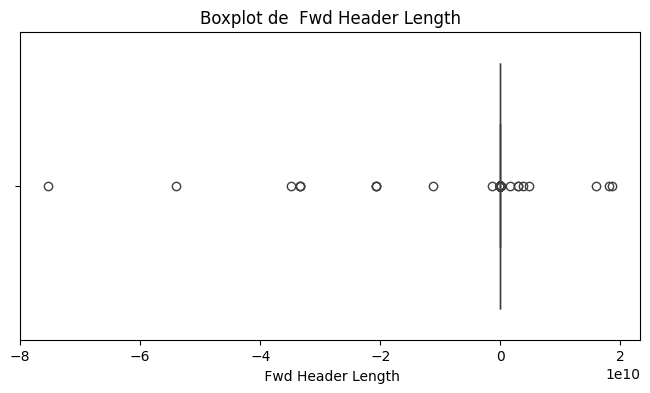

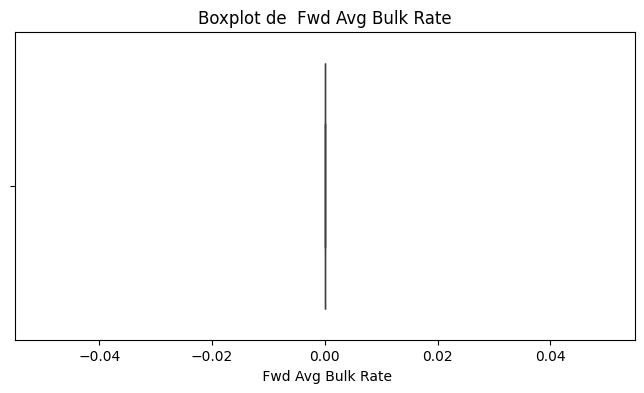

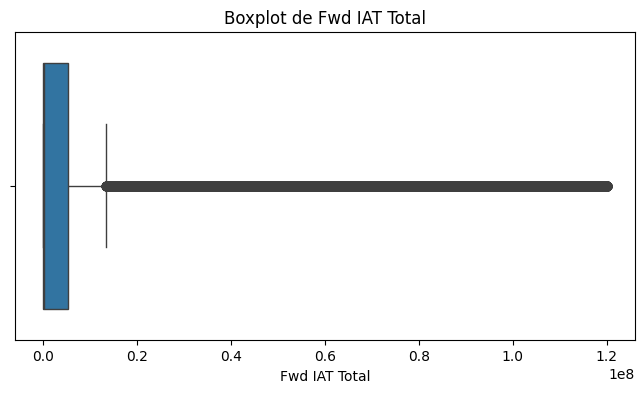

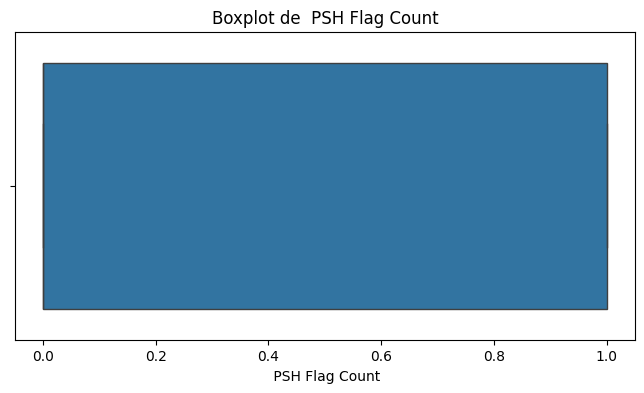

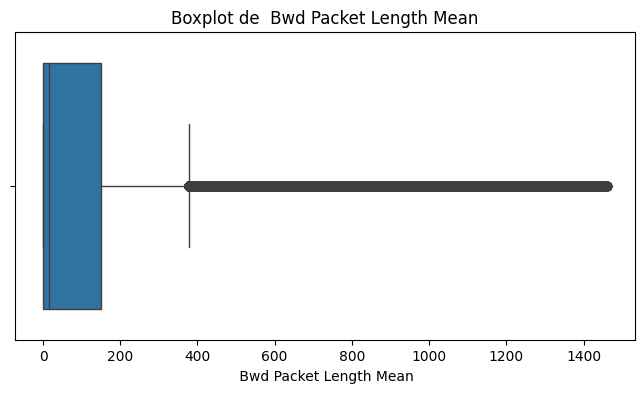

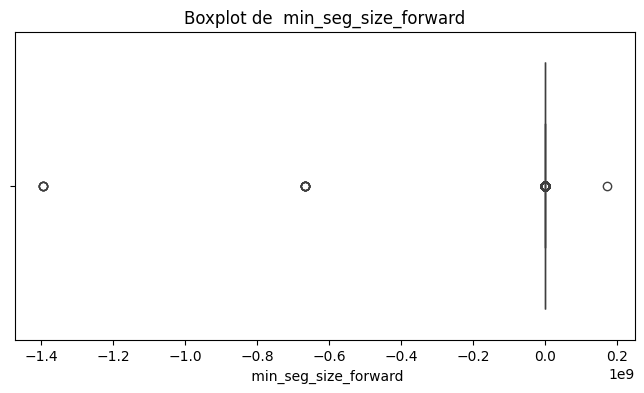

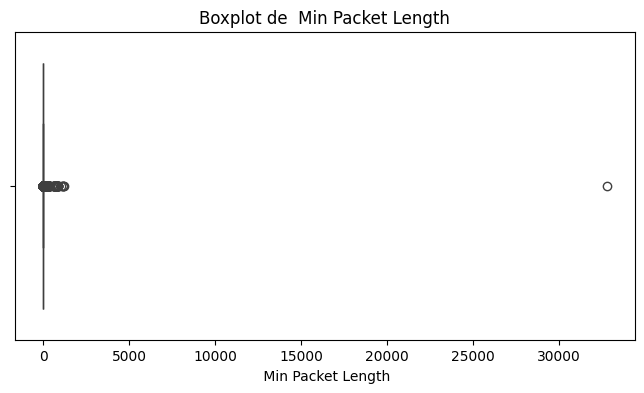

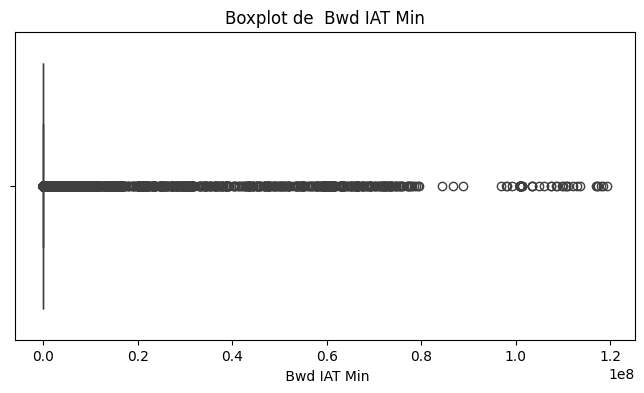

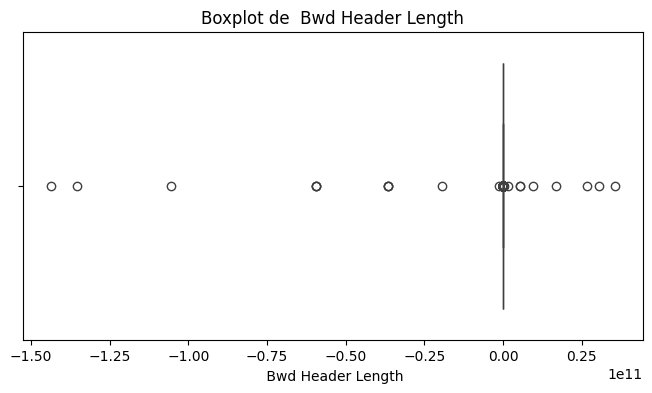

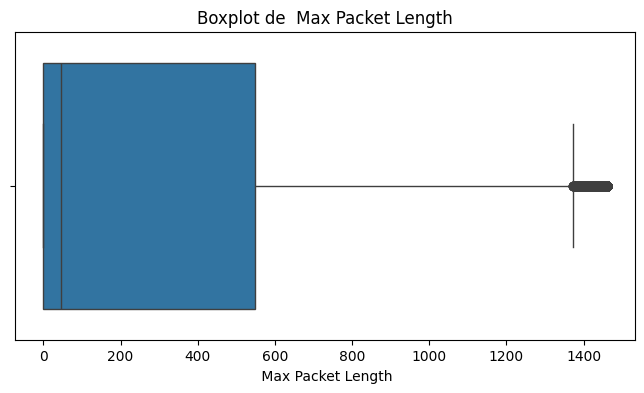

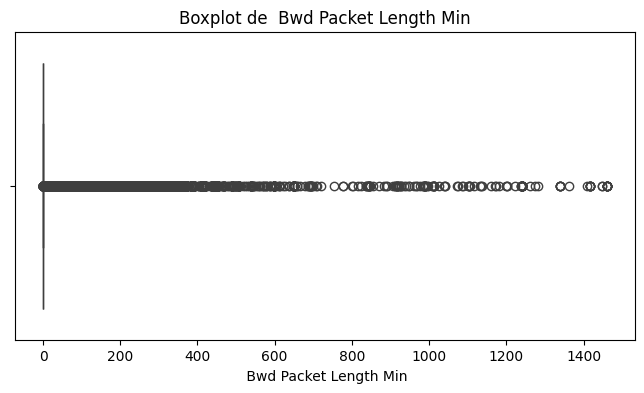

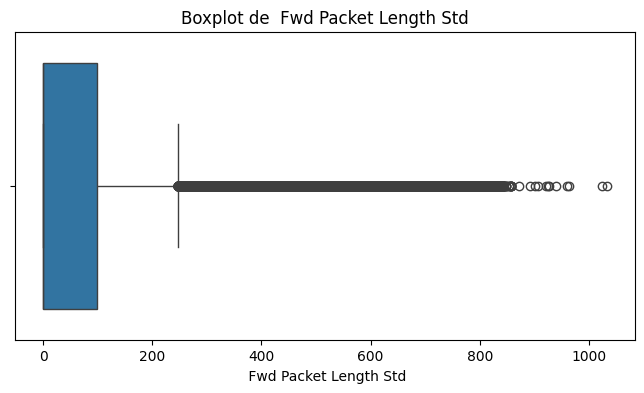

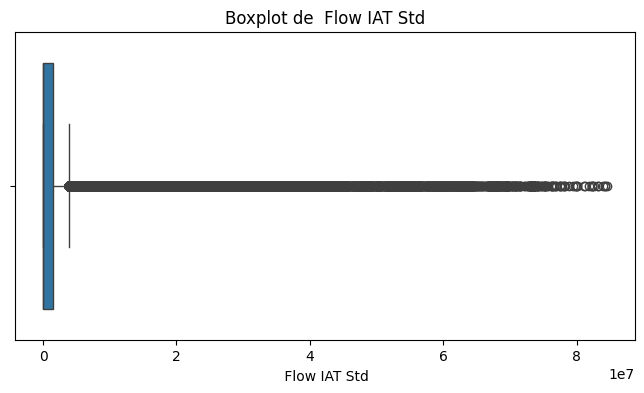

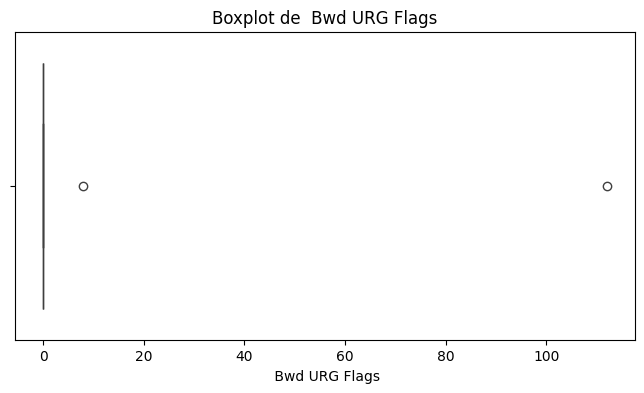

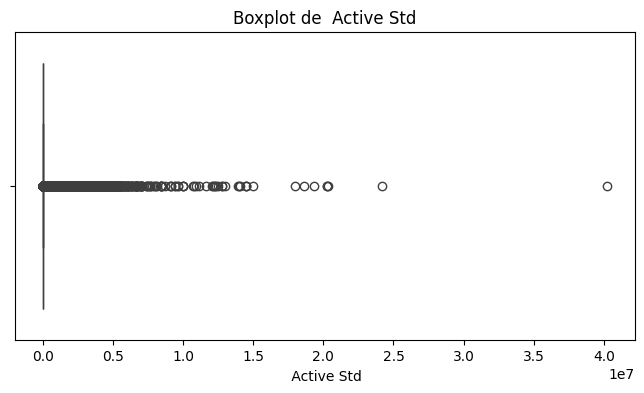

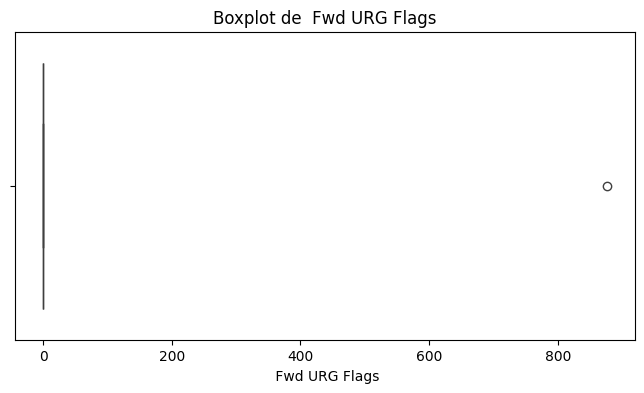

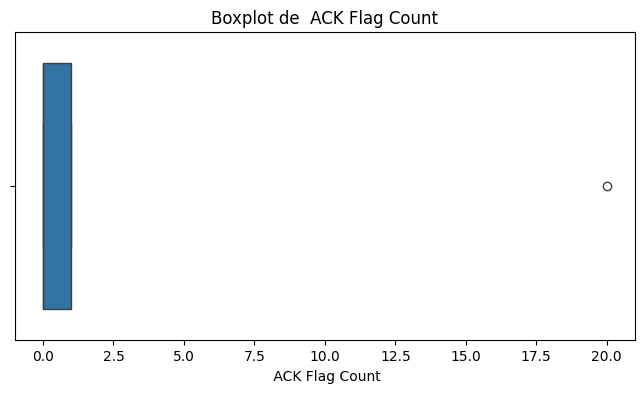

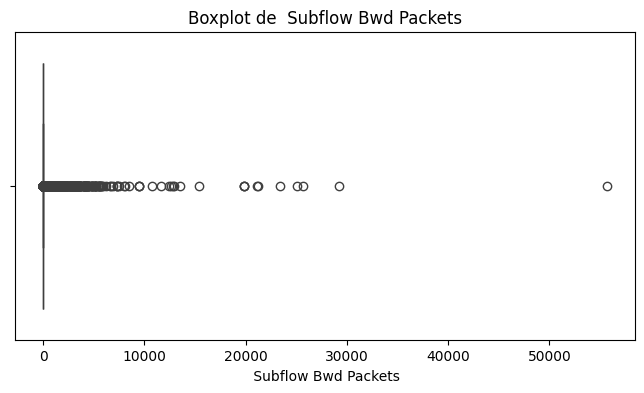

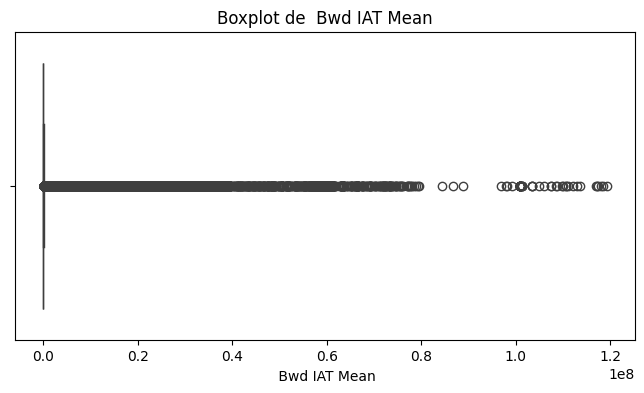

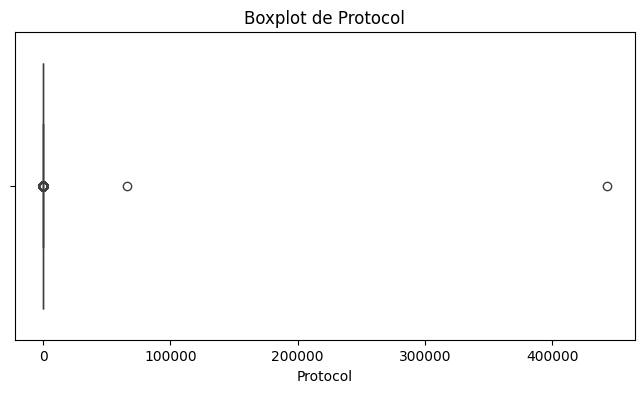

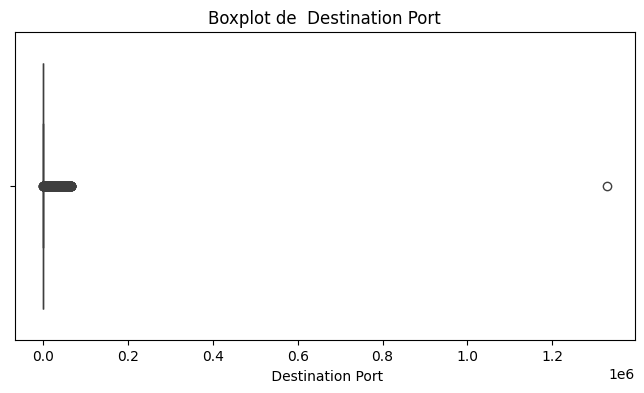

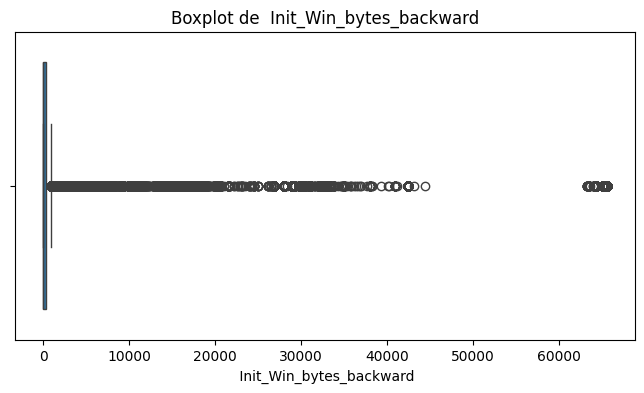

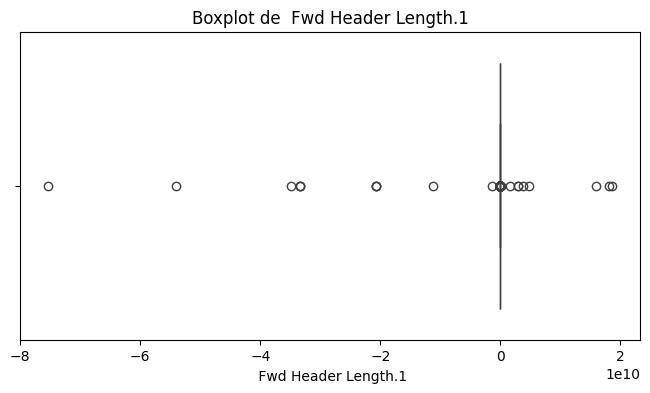

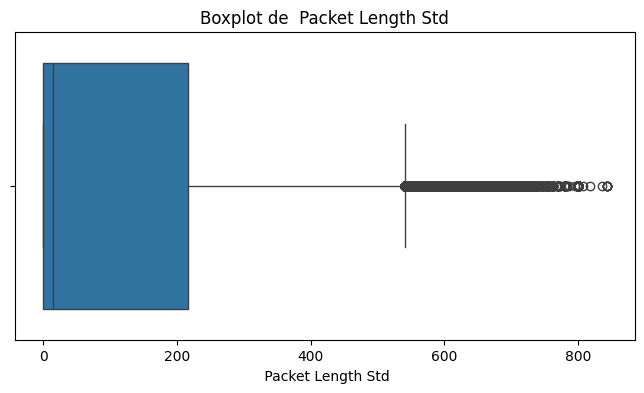

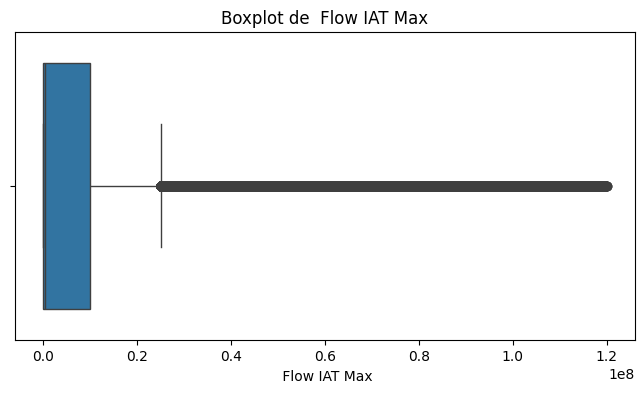

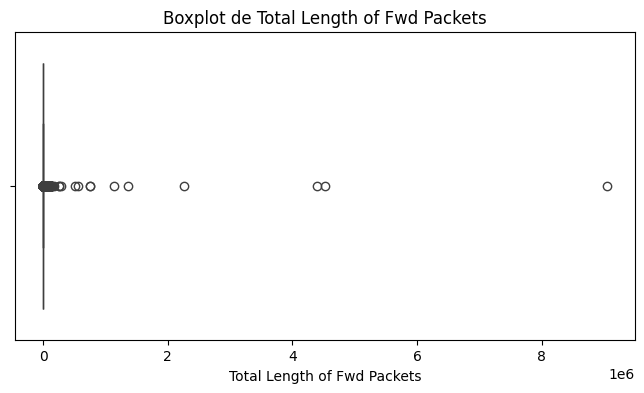

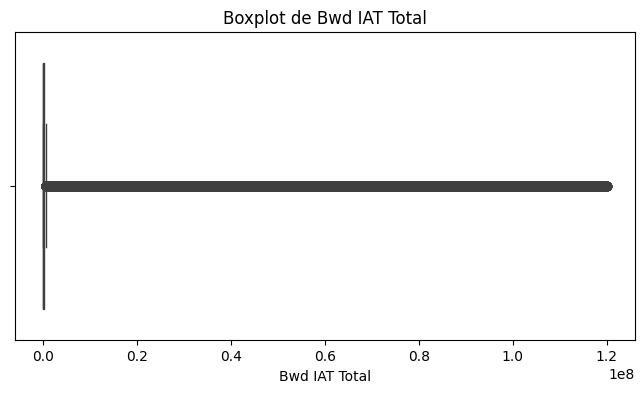

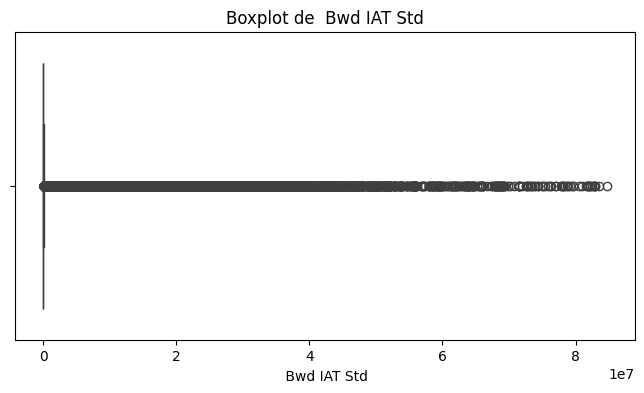

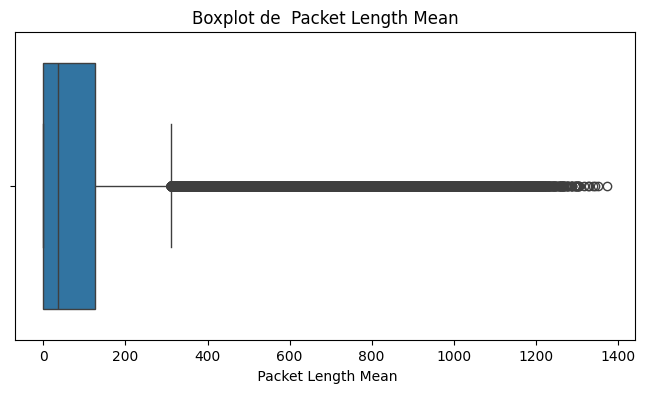

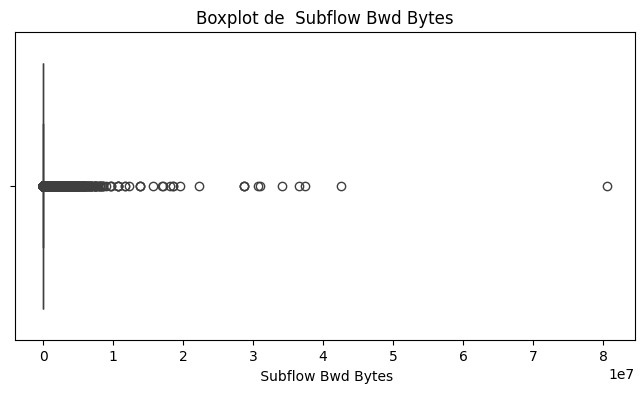

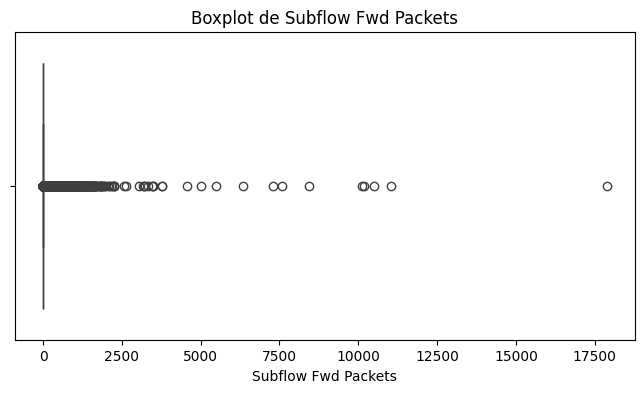

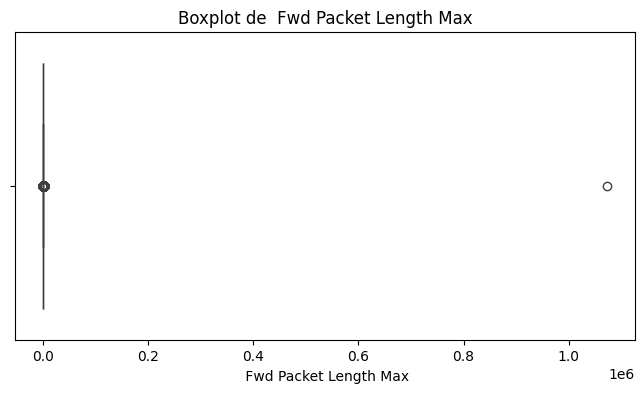

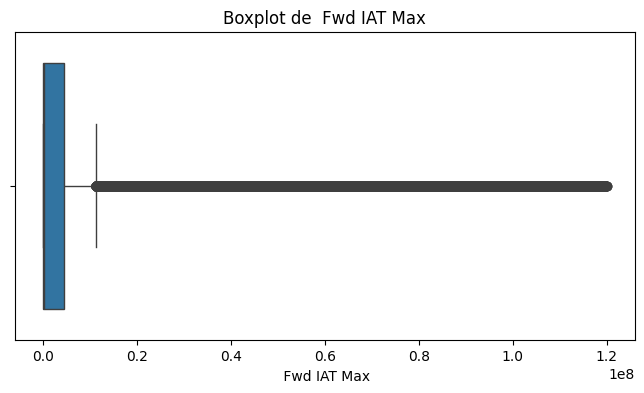

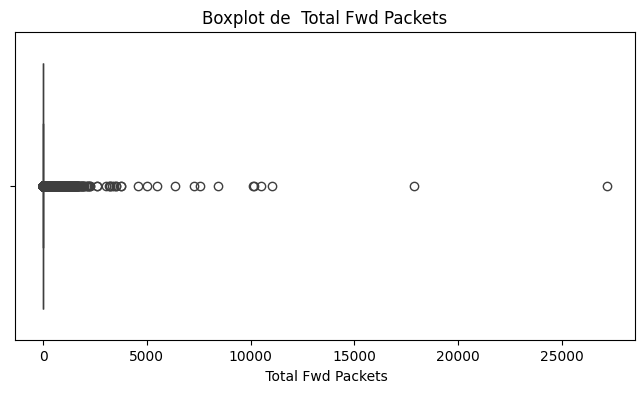

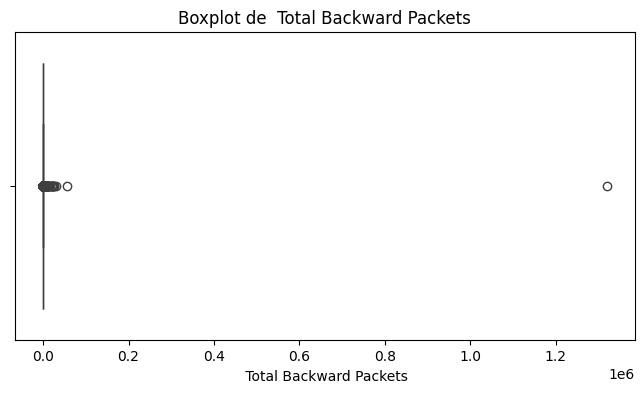

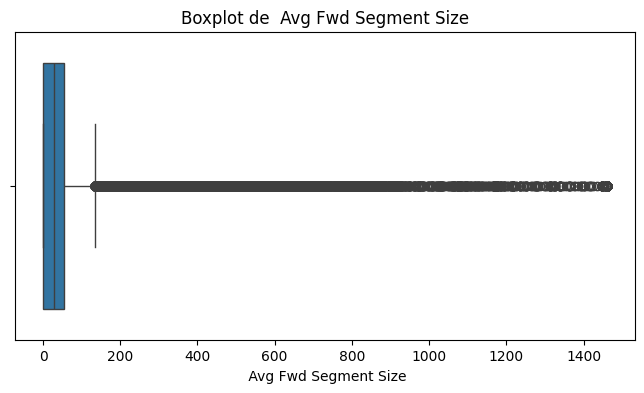

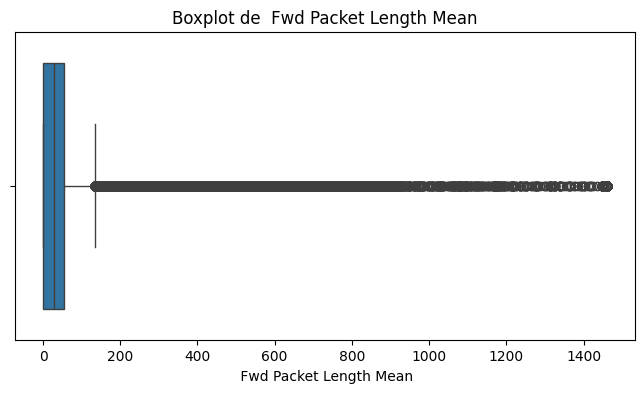

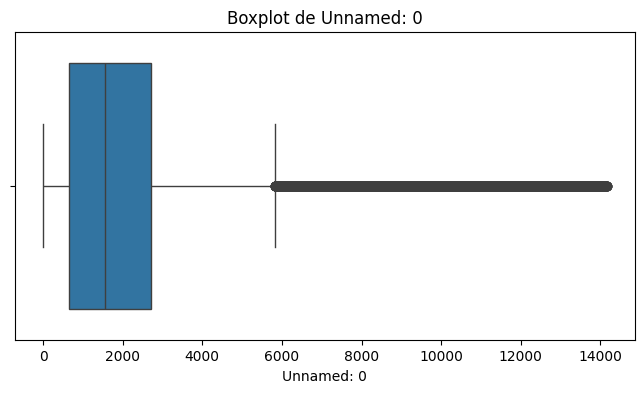

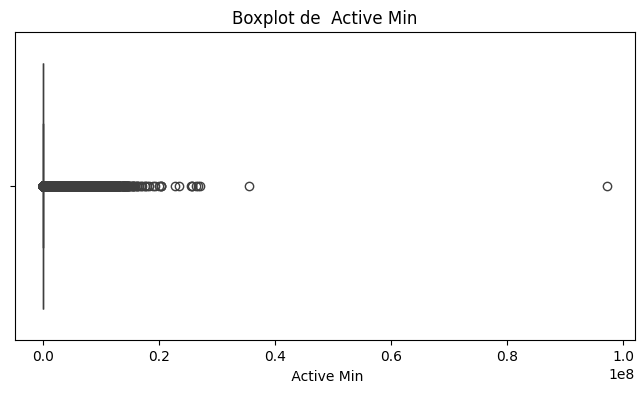

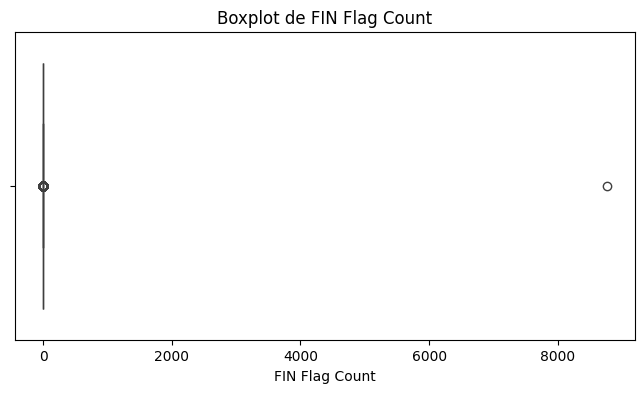

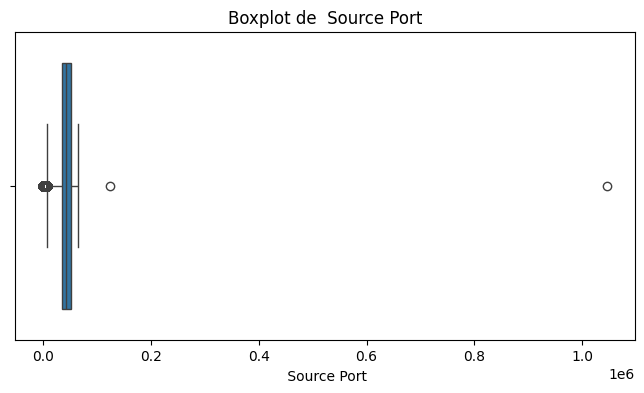

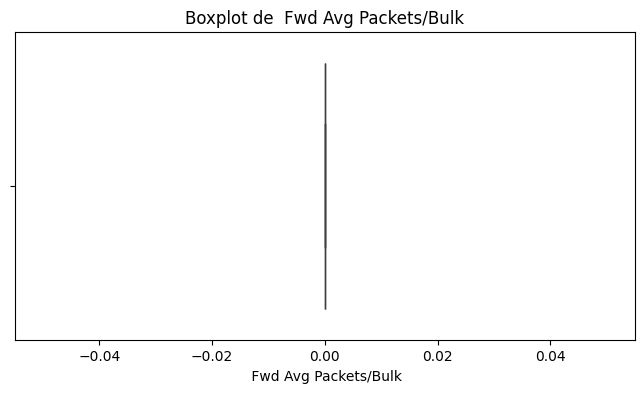

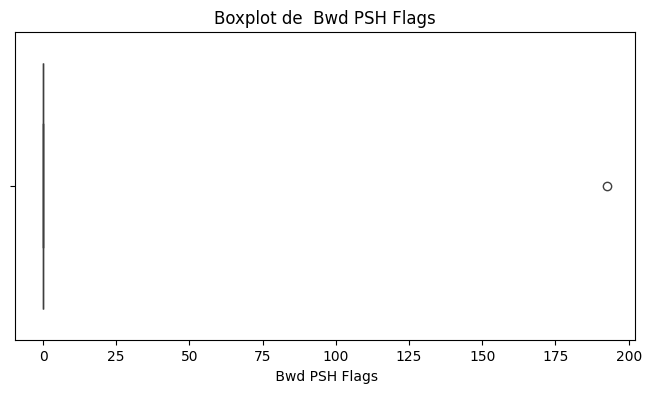

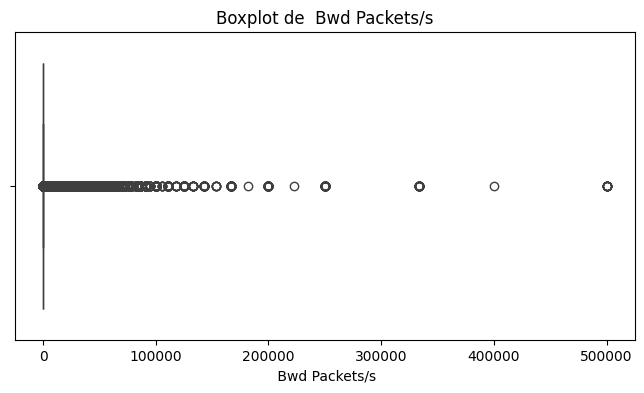

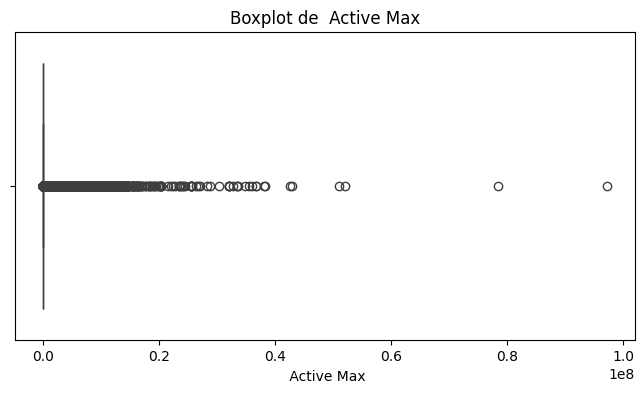

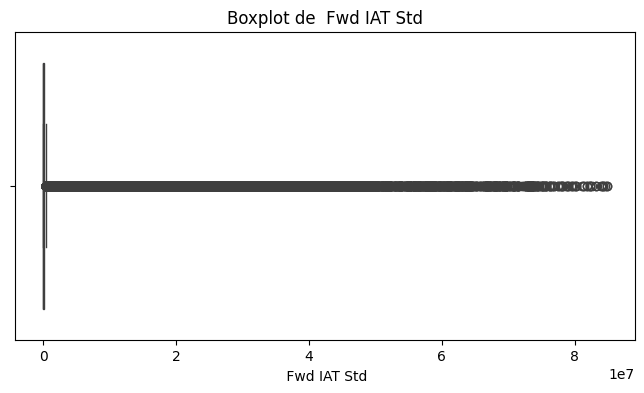

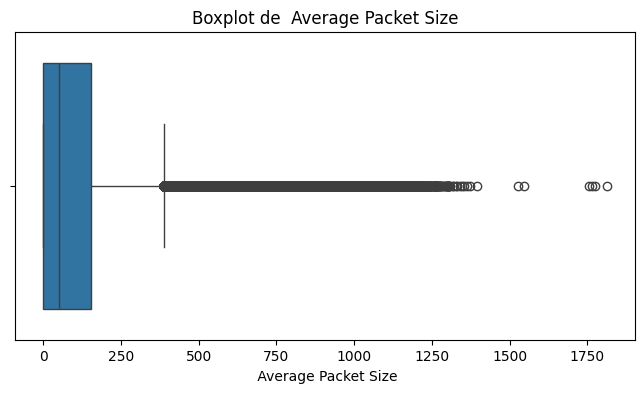

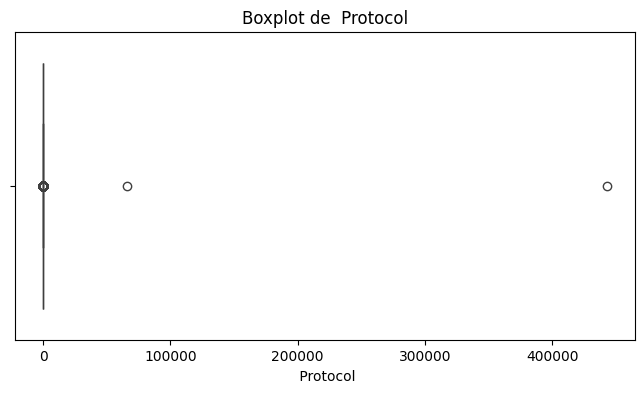

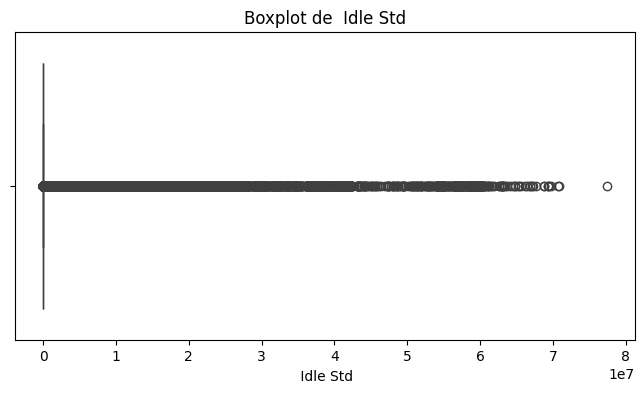

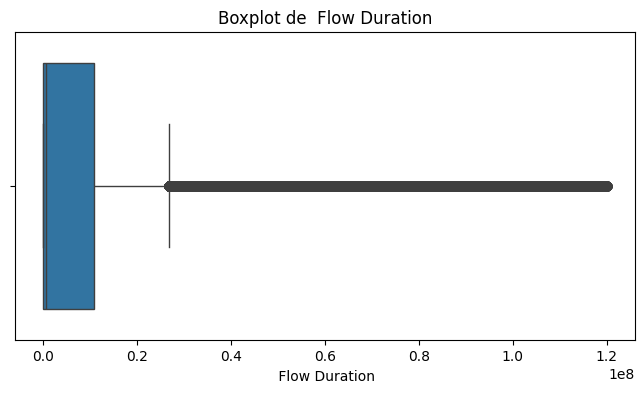

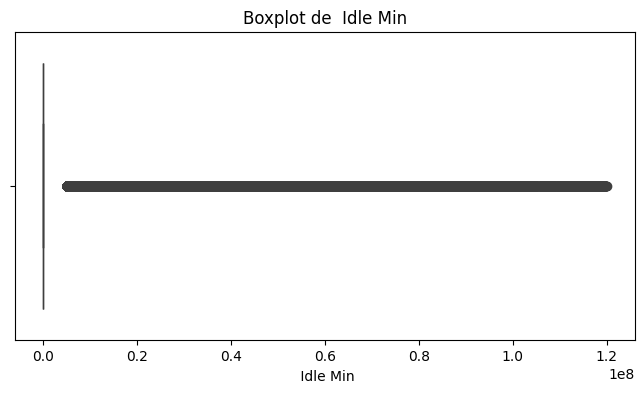

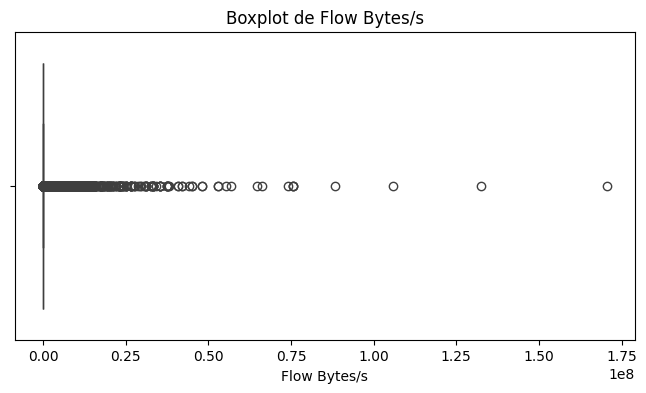

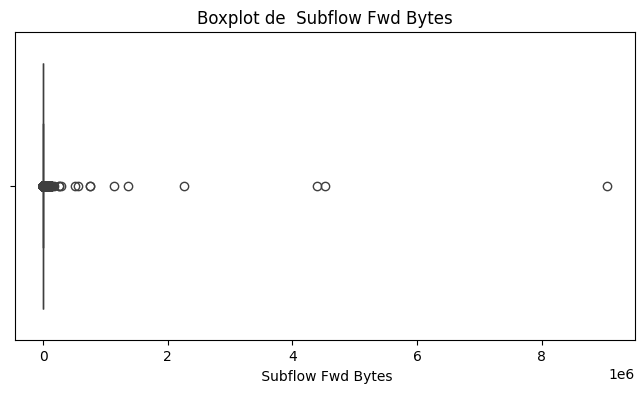

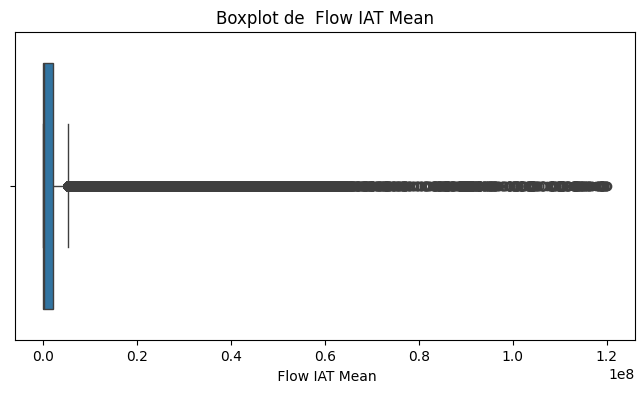

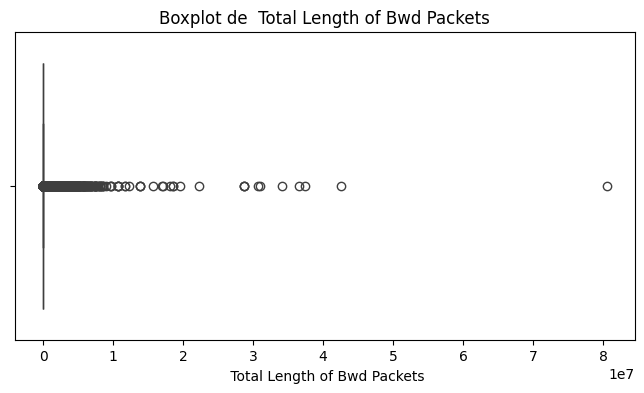

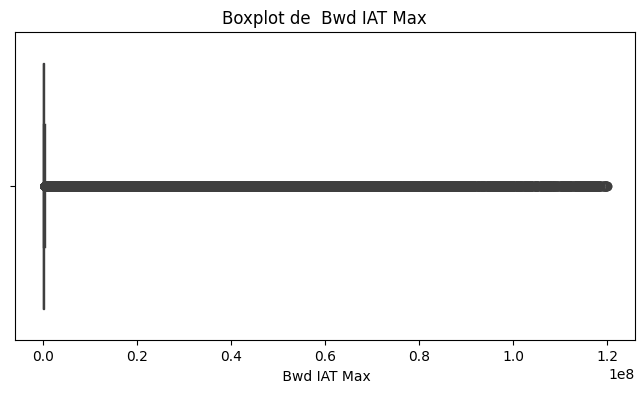

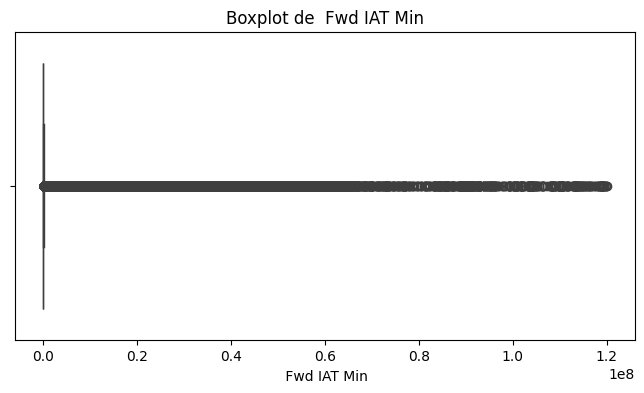

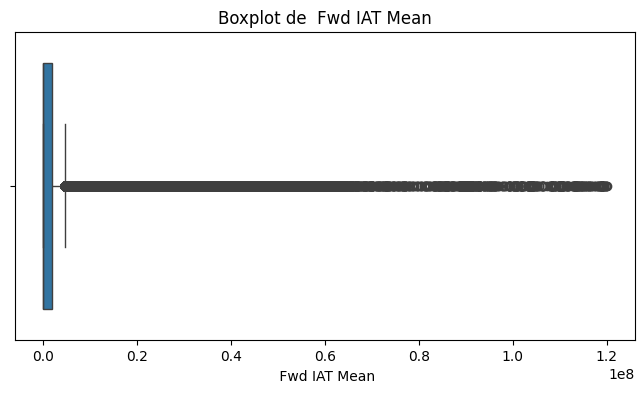

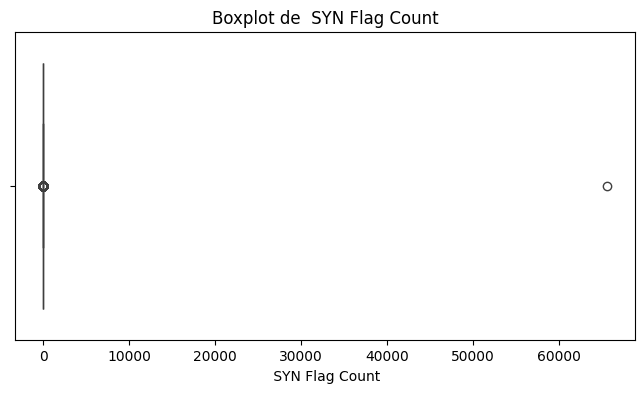

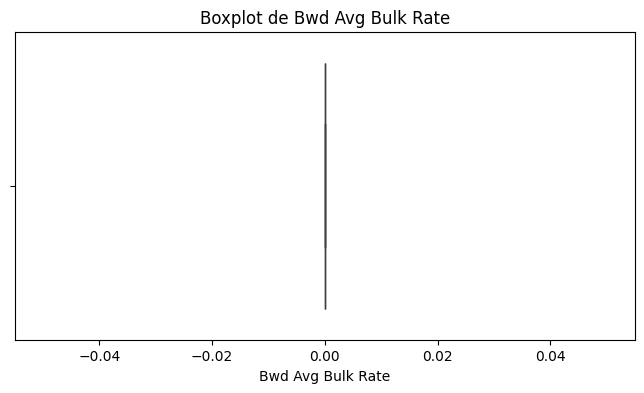

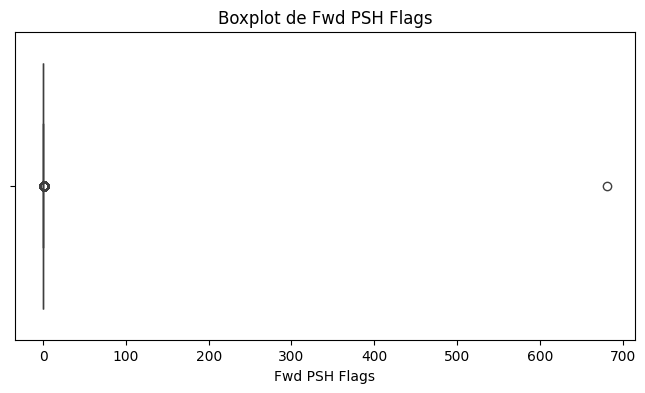

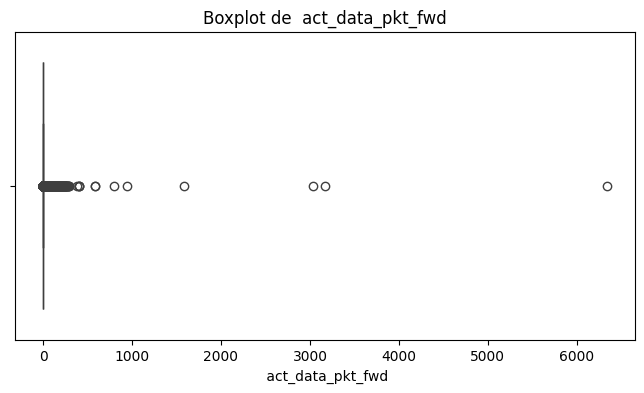

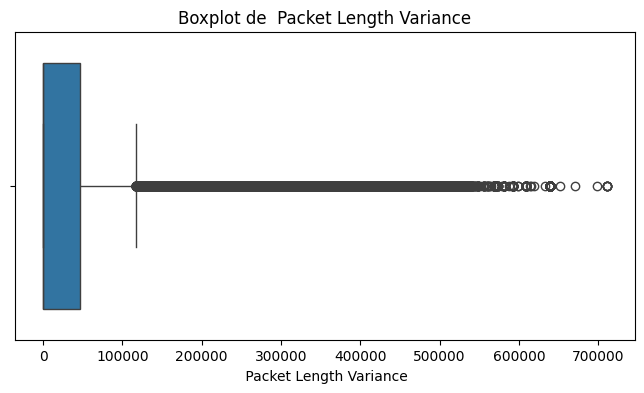

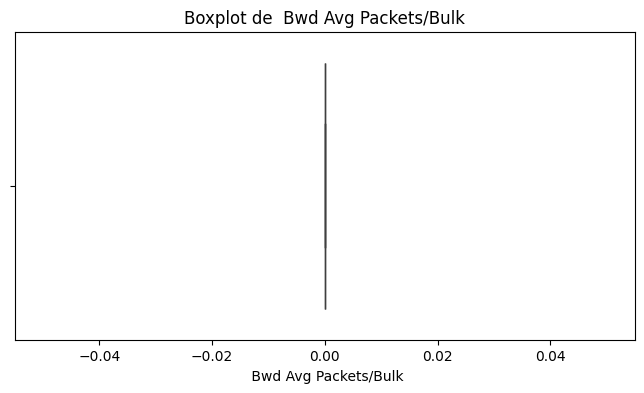

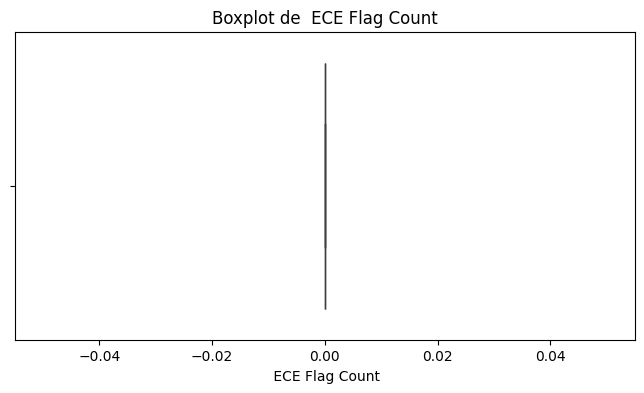

In [14]:
#Boxplot de las columans con posible sesgo
columnas_comunes = list(set(columnas_con_posible_sesgo) & set(df.select_dtypes(include=['number']).columns))
for columna in columnas_comunes:
    plt.figure(figsize=(8, 4))  
    sns.boxplot(x=df[columna])  
    plt.title(f'Boxplot de {columna}')
    plt.show()


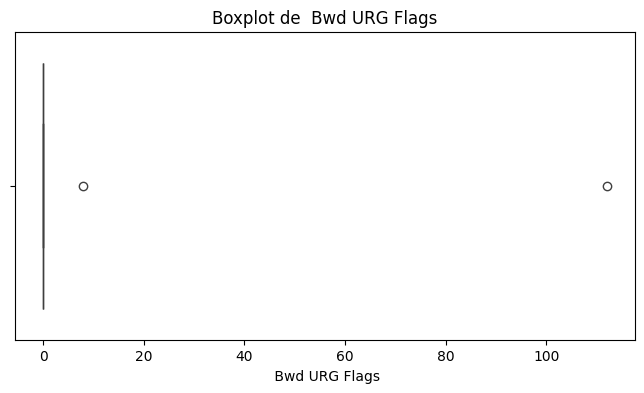

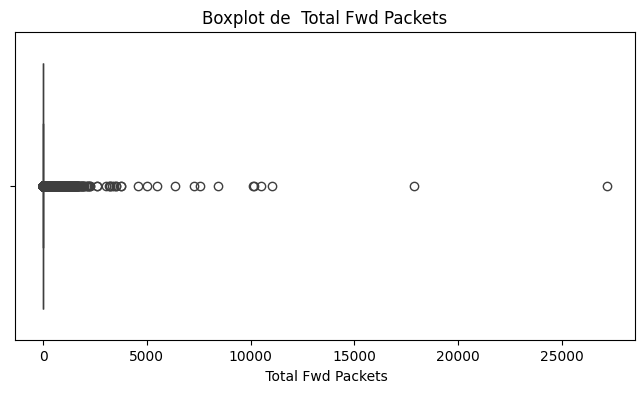

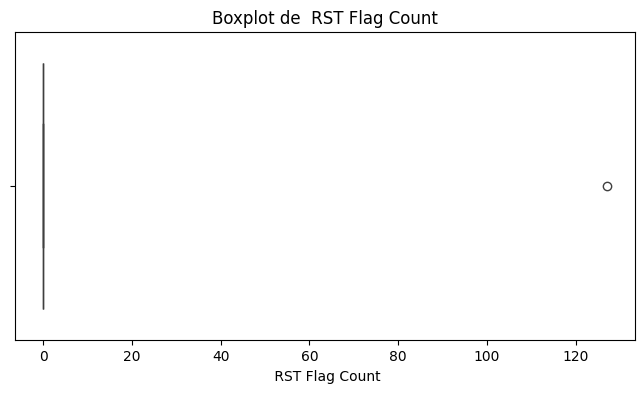

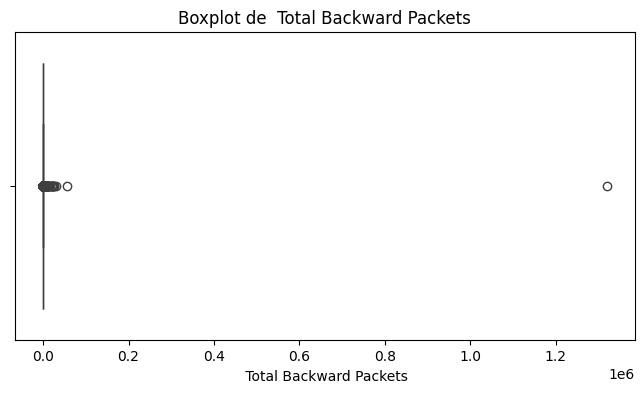

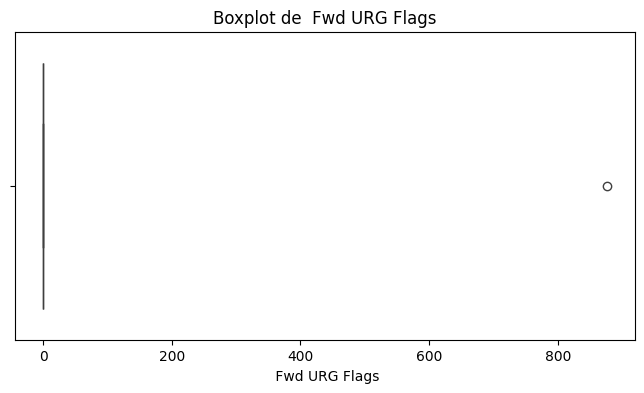

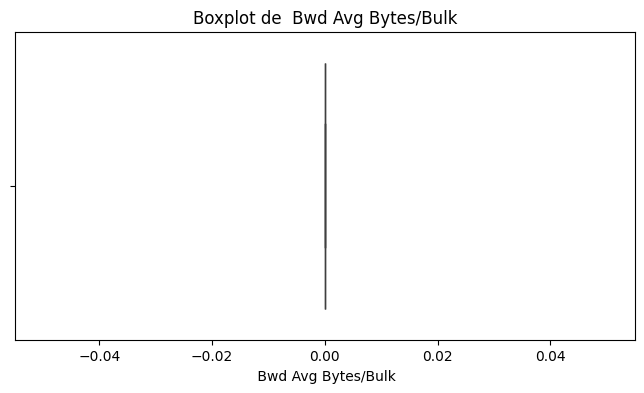

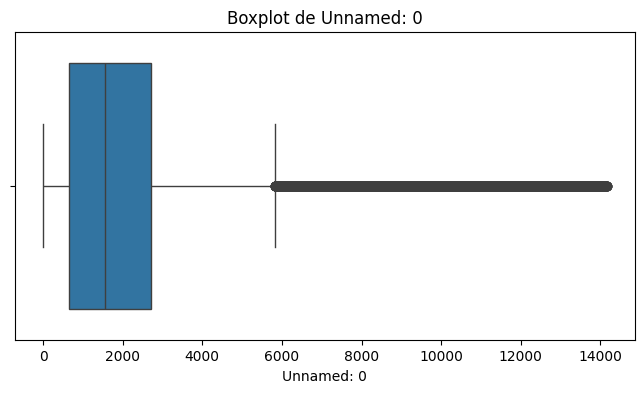

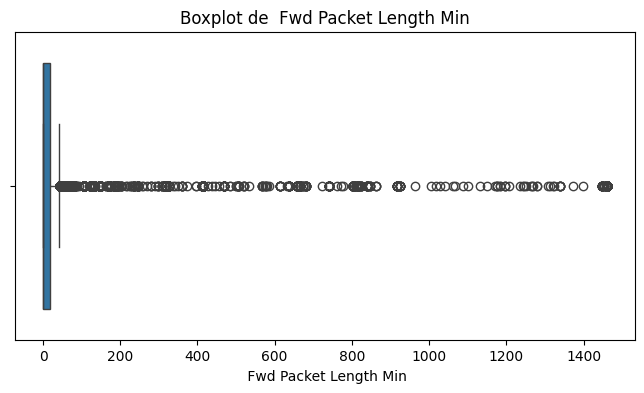

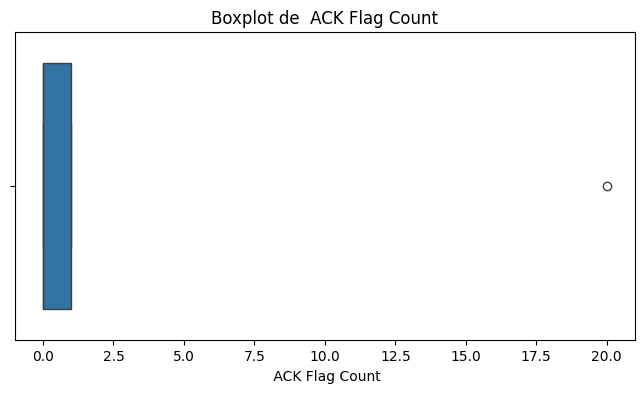

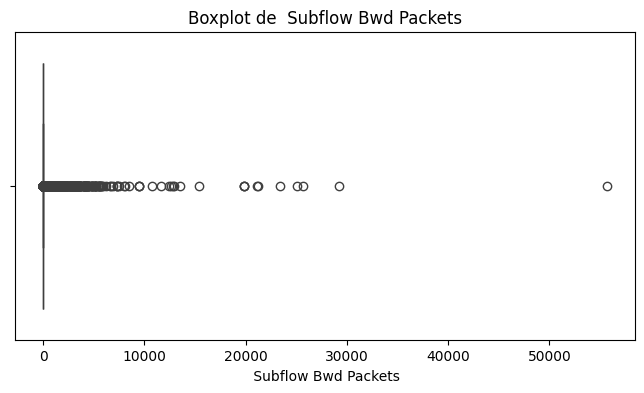

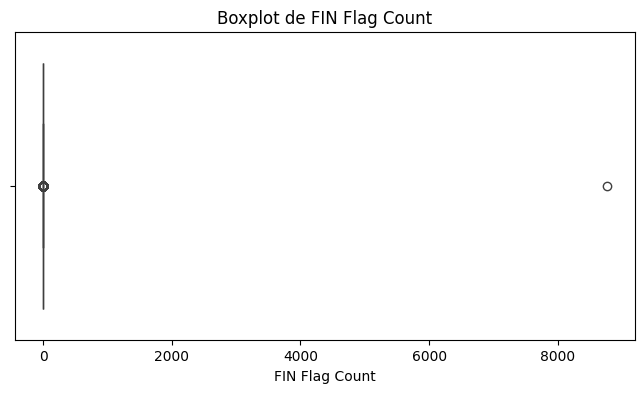

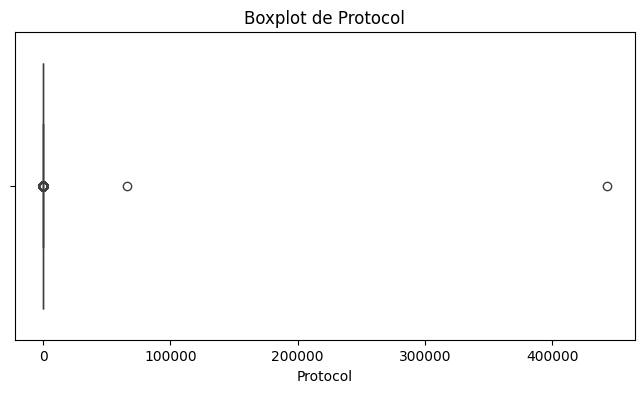

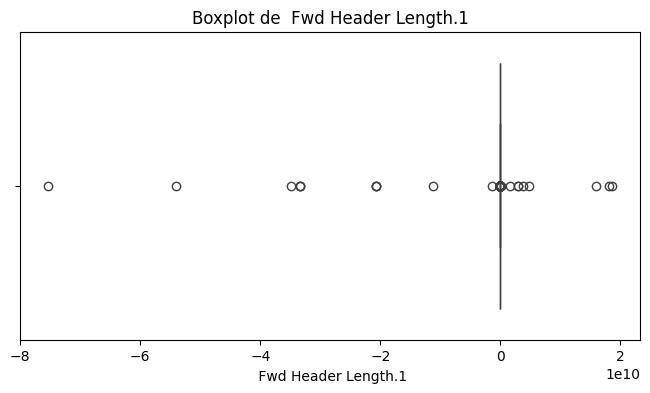

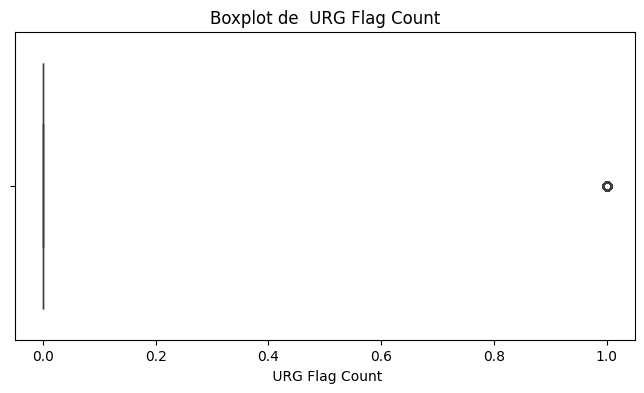

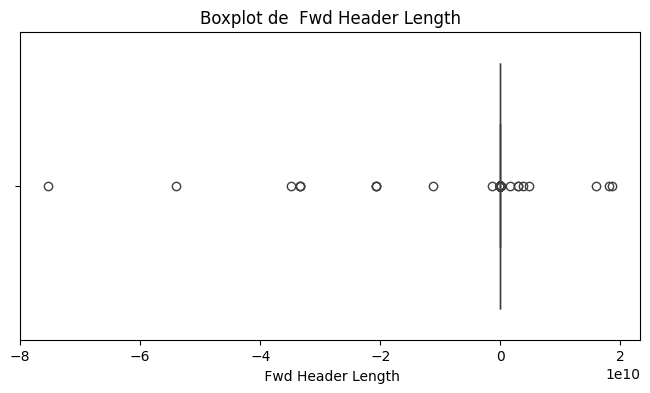

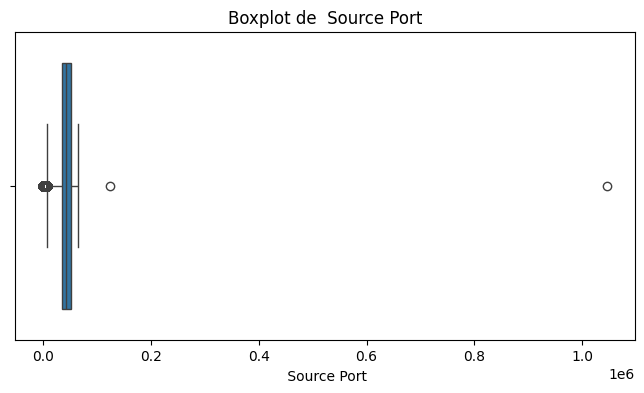

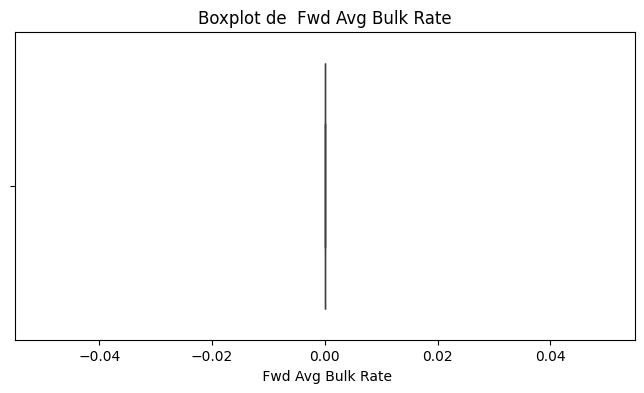

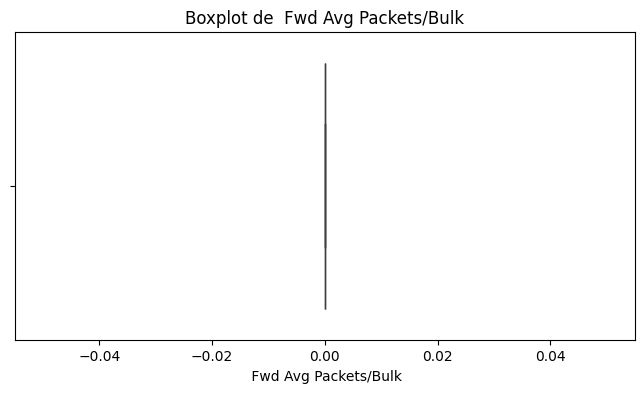

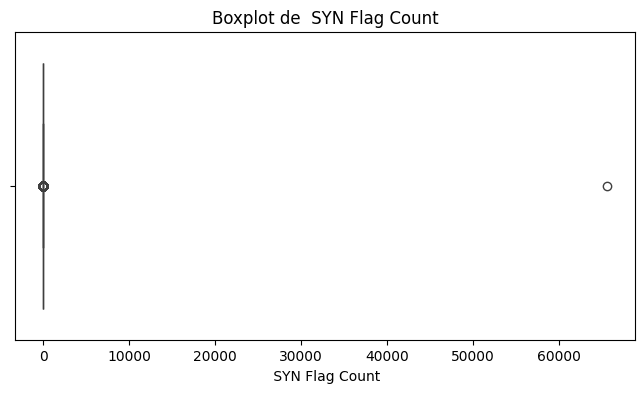

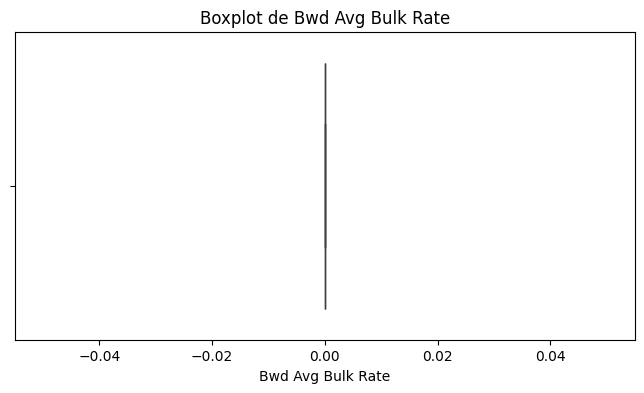

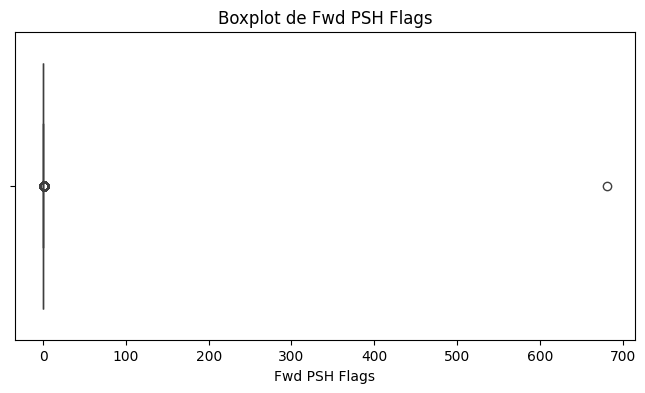

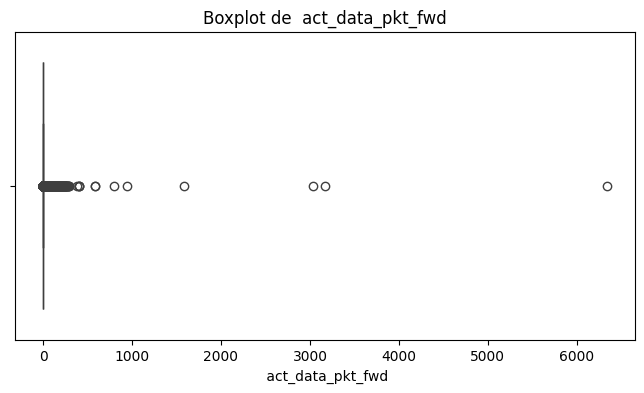

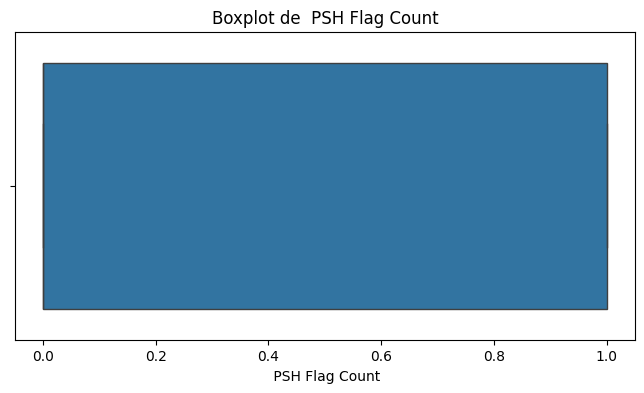

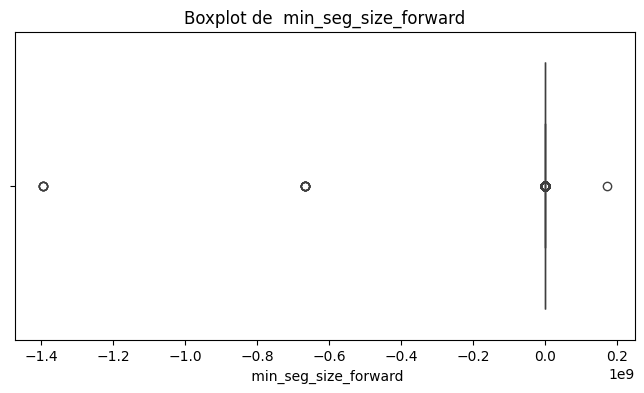

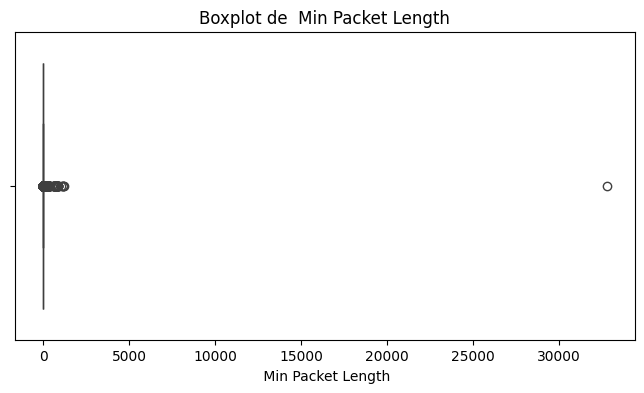

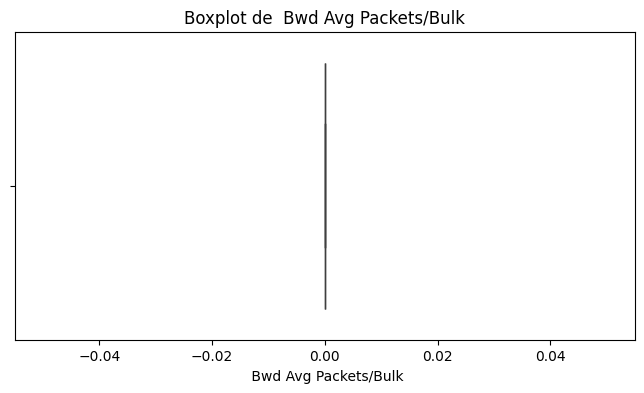

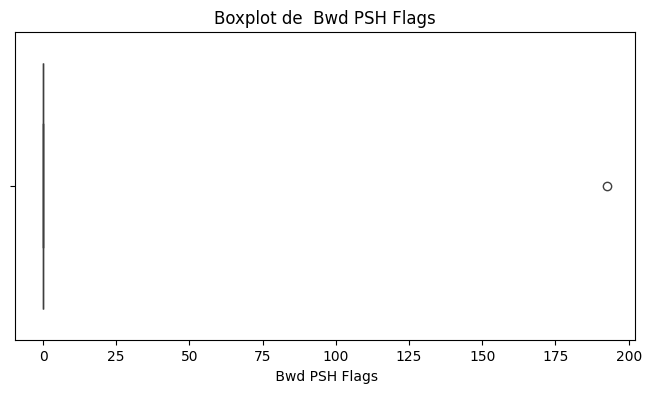

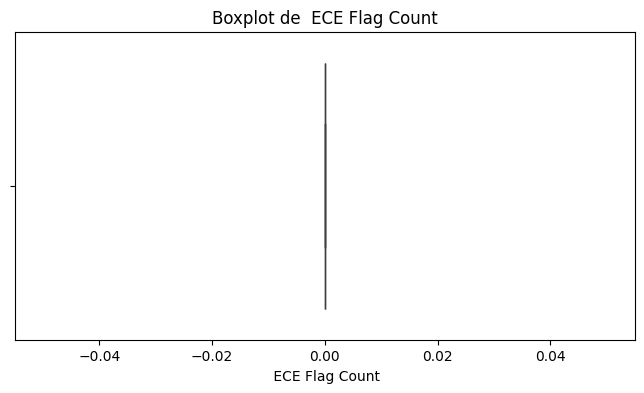

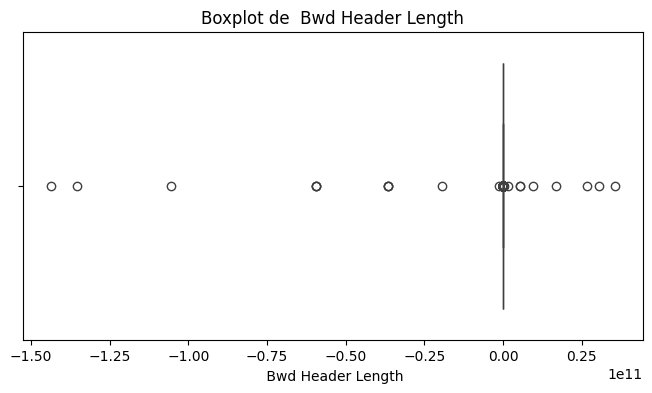

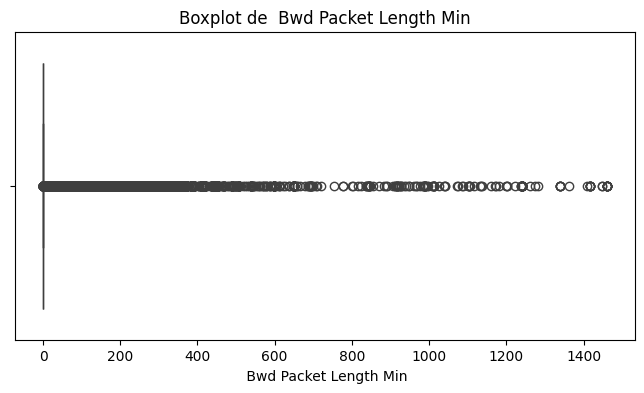

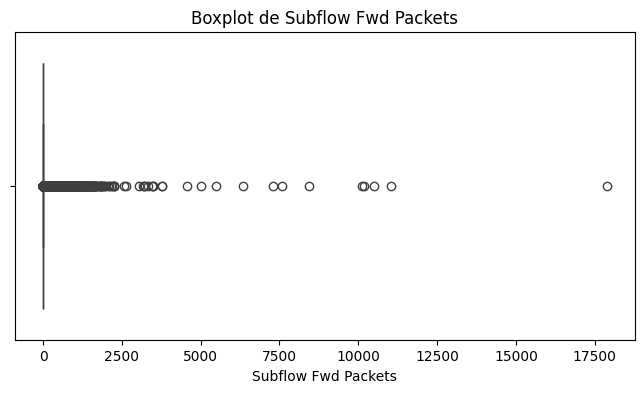

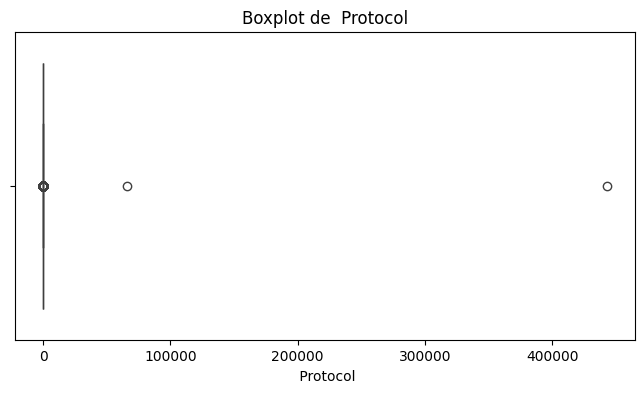

In [15]:
#Boxplot de las columnas con distribucion normal
columnas_comunes = list(set(columnas_distribucion_normal) & set(df.select_dtypes(include=['number']).columns))
for columna in columnas_comunes:
    plt.figure(figsize=(8, 4))  
    sns.boxplot(x=df[columna])  
    plt.title(f'Boxplot de {columna}')
    plt.show()

##

## Limpieza de datos

In [16]:
#Realizo una copia del dataframe
df_copia = df.copy()
df_copia = df_copia.drop_duplicates()

### Tratamientos de valores nulos

In [17]:
# Imputamos los valores nulos con la mediana de cada columna numérica
for columna in df_copia.select_dtypes(include=['number']).columns: 
    df_copia[columna].fillna(df_copia[columna].median(), inplace=True)  


C:\Users\Jorge\AppData\Local\Temp\ipykernel_17124\539275955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia[columna].fillna(df_copia[columna].median(), inplace=True)
C:\Users\Jorge\AppData\Local\Temp\ipykernel_17124\539275955.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

### Eliminamos la columna inicial, que es un ID y no es necesaria

In [18]:
# Eliminamos los espacios en todas las columnas, que parece que es un defecto general.
df_copia.columns = df_copia.columns.str.strip()
df_copia = df_copia.loc[:, ~df_copia.columns.duplicated()]
#Eliminamos el ID de la primera columna
print("Columnas totales: ", df_copia.columns)
df_copia.drop('Unnamed: 0', axis=1, inplace=True)
print(df_copia.head())



Columnas totales:  Index(['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet 

### Eliminación de outliers con IQR (Rango intercuartil)

In [19]:
for columna in df_copia.select_dtypes(include=['number']).columns:
    Q1 = df_copia[columna].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df_copia[columna].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango intercuartil

## Transformación de categóricas a numéricas.

In [20]:
df_cop_categoriacas = df_copia.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(df_cop_categoriacas))
for columna in df_cop_categoriacas:
    print(f"Valores únicos en {columna}: {df_copia[columna].unique()}")

# Transformación de variables categóricas a numéricas
# Función para convertir IP en número
def ip_to_int(ip):
    if isinstance(ip, str) and ip.count('.') == 3:
        try:
            return sum([int(x) * 256**i for i, x in enumerate(reversed(ip.split('.')))])
        except ValueError:
            return np.nan  
    return np.nan  
def convert_timestamp(value):
    # Si el valor es un número, lo interpretamos como un timestamp en segundos
    try:
        # Si el valor es un número (float o entero)
        if isinstance(value, (float, int)):
            return pd.to_datetime(value, unit='s')
        # Si es una cadena con formato de fecha, la convertimos
        elif isinstance(value, str):
            return pd.to_datetime(value, errors='coerce', format='%d/%m/%Y %H:%M:%S')
    except Exception as e:
        return np.nan  # En caso de error, devuelve NaN


df_copia['Source IP'] = df_copia['Source IP'].apply(ip_to_int)
df_copia['Destination IP'] = df_copia['Destination IP'].apply(ip_to_int)

df_copia['Flow ID'] = LabelEncoder().fit_transform(df_copia['Flow ID'])

df_copia['Timestamp'] = df_copia['Timestamp'].apply(convert_timestamp)
print(df_copia['Timestamp'].isna().sum())

df_copia['CWE Flag Count'] = df_copia['CWE Flag Count'].replace({'0': 0, 'SCAREWARE': 1, np.nan: -1})


df_copia['Down/Up Ratio'] = pd.to_numeric(df_copia['Down/Up Ratio'], errors='coerce')
df_copia['Down/Up Ratio'].fillna(-1, inplace=True)


df_copia['Fwd Avg Bytes/Bulk'] = pd.to_numeric(df_copia['Fwd Avg Bytes/Bulk'], errors='coerce')
df_copia['Fwd Avg Bytes/Bulk'].fillna(-1, inplace=True)


df_copia['Label'] = LabelEncoder().fit_transform(df_copia['Label'])




Variables categóricas: ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp', 'CWE Flag Count', 'Down/Up Ratio', 'Fwd Avg Bytes/Bulk', 'Label']
Valores únicos en Flow ID: ['172.217.6.202-10.42.0.211-443-50004-6'
 '172.217.6.202-10.42.0.211-443-35455-6'
 '131.253.61.68-10.42.0.211-443-51775-6' ...
 '10.42.0.211-104.192.110.245-45970-443-6'
 '10.42.0.211-10.42.0.1-51982-53-17' '10.42.0.211-10.42.0.1-9320-53-17']
Valores únicos en Source IP: ['10.42.0.211' '172.217.6.202' '31.13.69.203' ... '173.194.198.156'
 '50.19.223.117' '104.24.120.196']
Valores únicos en Destination IP: ['172.217.6.202' '131.253.61.68' '23.208.43.179' ... '50.19.223.117'
 '98.138.49.44' '104.88.93.190']
Valores únicos en Timestamp: ['13/06/2017 11:52:39' '13/06/2017 11:52:42' '13/06/2017 11:52:43' ...
 '17/06/2017 01:31:21' '17/06/2017 01:31:32' '17/06/2017 01:29:11']
Valores únicos en CWE Flag Count: [0 nan '0' 'SCAREWARE']
Valores únicos en Down/Up Ratio: [1.0 0.0 2.0 3.0 8.0 4.0 5.0 9.0 6.0 12.0 7.0 10.0 11.0 '1

C:\Users\Jorge\AppData\Local\Temp\ipykernel_17124\3474325365.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copia['CWE Flag Count'] = df_copia['CWE Flag Count'].replace({'0': 0, 'SCAREWARE': 1, np.nan: -1})
C:\Users\Jorge\AppData\Local\Temp\ipykernel_17124\3474325365.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplac

In [21]:
lista = df_copia.iloc[0]
print(lista)

Flow ID                   133842
Source IP            170524883.0
Source Port                50004
Destination IP      2899904202.0
Destination Port           443.0
                        ...     
Idle Mean                    0.0
Idle Std                     0.0
Idle Max                     0.0
Idle Min                     0.0
Label                          0
Name: 0, Length: 85, dtype: object


## Búsqueda de valores a eliminar mediante prueba de modelos

### Prueba con randomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier  

# Elimino o convierto datetime
if 'Timestamp' in df_copia.columns:
    df_copia['Timestamp'] = df_copia['Timestamp'].astype('int64') // 10**9  

# Quito label de X
X = df_copia.drop(columns=['Label']) 
y = df_copia['Label']  

# Modelo de selección de características
model = RandomForestClassifier()  
model.fit(X, y)


importances = model.feature_importances_
sorted_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
diccionario = {}
#Creo el documento HTML
with open("importancias_características.html","w") as f:
    f.write("<h1>Importancia de características en <b>RandomForestClassifier</b></h1>")
    
    for feature, importance in sorted_features:
        f.write(f'<p>Importancia de {feature}: {importance:.6f}\n</p>')
        
        diccionario[feature] = importance
print(diccionario)

{'Timestamp': np.float64(0.6750882263619586), 'Source IP': np.float64(0.034581029800612346), 'Flow ID': np.float64(0.030016356605333777), 'Destination IP': np.float64(0.01596597687075221), 'Source Port': np.float64(0.01567474500143083), 'Flow IAT Min': np.float64(0.011430680058956538), 'Flow IAT Max': np.float64(0.011297620824245513), 'Flow Duration': np.float64(0.0110549409657378), 'Fwd Packets/s': np.float64(0.010814820527871995), 'Flow Packets/s': np.float64(0.010788126142343027), 'Flow IAT Mean': np.float64(0.010669079839259875), 'Fwd IAT Min': np.float64(0.007603697451218267), 'Bwd Packets/s': np.float64(0.007581715413870364), 'Init_Win_bytes_forward': np.float64(0.00698380609138031), 'Fwd IAT Max': np.float64(0.006868895379997207), 'Fwd IAT Total': np.float64(0.006690750058371495), 'Fwd IAT Mean': np.float64(0.006505855737424636), 'Flow Bytes/s': np.float64(0.0059010113163152165), 'Destination Port': np.float64(0.005225012118874284), 'Flow IAT Std': np.float64(0.00469977579003629

### Prueba de árbol de decisión

In [23]:
'''from sklearn.tree import DecisionTreeClassifier

if 'Timestamp' in df_copia.columns:
    df_copia['Timestamp'] = df_copia['Timestamp'].astype('int64') // 10**9  


X = df_copia.drop(columns=['Label']) 
y = df_copia['Label']  


model = DecisionTreeClassifier()  
model.fit(X, y)


importances = model.feature_importances_
sorted_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)
diccionario = {}
with open("importancias_características.html","a") as f:
    f.write("<h1>Importancia de características en <b>Árbol de decisión</b></h1>")
    # Imprimir características ordenadas de mayor a menor importancia
    for feature, importance in sorted_features:
        f.write(f'<p>Importancia de {feature}: {importance:.6f}\n</p>')
        
        diccionario[feature] = importance
print(diccionario)'''

'from sklearn.tree import DecisionTreeClassifier\n\nif \'Timestamp\' in df_copia.columns:\n    df_copia[\'Timestamp\'] = df_copia[\'Timestamp\'].astype(\'int64\') // 10**9  \n\n\nX = df_copia.drop(columns=[\'Label\']) \ny = df_copia[\'Label\']  \n\n\nmodel = DecisionTreeClassifier()  \nmodel.fit(X, y)\n\n\nimportances = model.feature_importances_\nsorted_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)\ndiccionario = {}\nwith open("importancias_características.html","a") as f:\n    f.write("<h1>Importancia de características en <b>Árbol de decisión</b></h1>")\n    # Imprimir características ordenadas de mayor a menor importancia\n    for feature, importance in sorted_features:\n        f.write(f\'<p>Importancia de {feature}: {importance:.6f}\n</p>\')\n\n        diccionario[feature] = importance\nprint(diccionario)'

### Prueba con XGBoost

In [24]:
'''import xgboost as xgb


from sklearn.model_selection import train_test_split


if 'Timestamp' in df_copia.columns:
    df_copia['Timestamp'] = df_copia['Timestamp'].astype('int64') // 10**9  


X = df_copia.drop(columns=['Label'])  
y = df_copia['Label']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")  
model.fit(X_train, y_train)


importances = model.feature_importances_
sorted_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)


diccionario = {}
with open("importancias_características.html", "a") as f:
    f.write("<h1>Importancia de características en <b>XGBoost</b></h1>")
    for feature, importance in sorted_features:
        f.write(f'<p>Importancia de {feature}: {importance:.6f}</p>\n')
        diccionario[feature] = importance


print(diccionario)'''


'import xgboost as xgb\n\n\nfrom sklearn.model_selection import train_test_split\n\n\nif \'Timestamp\' in df_copia.columns:\n    df_copia[\'Timestamp\'] = df_copia[\'Timestamp\'].astype(\'int64\') // 10**9  \n\n\nX = df_copia.drop(columns=[\'Label\'])  \ny = df_copia[\'Label\']  \n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n\nmodel = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")  \nmodel.fit(X_train, y_train)\n\n\nimportances = model.feature_importances_\nsorted_features = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)\n\n\ndiccionario = {}\nwith open("importancias_características.html", "a") as f:\n    f.write("<h1>Importancia de características en <b>XGBoost</b></h1>")\n    for feature, importance in sorted_features:\n        f.write(f\'<p>Importancia de {feature}: {importance:.6f}</p>\n\')\n        diccionario[feature] = importance\n\n\nprint(diccionario)'

## Matriz de correlacción

In [25]:
'''# Calculamos la matriz de correlación de las columnas

correlation_matrix = df_copia.corr()

# Ordenamos la matriz de correlación de más a menos correlacionada
# Aplanamos la matriz y eliminamos las correlaciones redundantes (de una columna consigo misma)
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)

# Filtramos las correlaciones que son 1 (auto-correlación)
correlation_values = correlation_values[correlation_values != 1]

# Visualizamos la matriz de correlación y la guardamos como imagen
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.2)
plt.title("Matriz de Correlación del DataFrame")
plt.savefig('correlation_matrix.png', format='png')
plt.show()

# Creamos el contenido del HTML
html_content = """
<html>
    <head>
        <title>Matriz de Correlación</title>
        <style>
            .label-highlight {
                color: blue;  /* Cambia el color a azul */
                font-weight: bold;  /* Hace el texto en negrita */
            }
            table {
                width: 100%;
                border-collapse: collapse;
            }
            th, td {
                padding: 8px;
                text-align: left;
            }
            table, th, td {
                border: 1px solid black;
            }
        </style>
    </head>
    <body>
        <h1>Matriz de Correlación del DataFrame</h1>
        <img src="correlation_matrix.png" alt="Matriz de Correlación" />
        <h2>Correlaciones ordenadas</h2>
        <table>
            <tr>
                <th>Par de variables</th>
                <th>Correlación</th>
            </tr>
"""

# Agregamos las correlaciones ordenadas al contenido HTML, resaltando "Label" en azul
for (var1, var2), corr in correlation_values.items():
   
    highlighted_var1 = var1.replace('Label', '<span class="label-highlight">Label</span>')
    highlighted_var2 = var2.replace('Label', '<span class="label-highlight">Label</span>')
    
    html_content += f"""
        <tr>
            <td>{highlighted_var1} - {highlighted_var2}</td>
            <td>{corr:.2f}</td>
        </tr>
    """

# Cerramos el contenido HTML
html_content += """
        </table>
    </body>
</html>
"""

# Guardar el HTML en un archivo
with open("matriz_correlacion.html", "w") as f:
    f.write(html_content)

print("Archivo HTML generado con la imagen de la matriz de correlación y los valores ordenados. La palabra 'Label' está destacada en azul.")
'''





'# Calculamos la matriz de correlación de las columnas\n\ncorrelation_matrix = df_copia.corr()\n\n# Ordenamos la matriz de correlación de más a menos correlacionada\n# Aplanamos la matriz y eliminamos las correlaciones redundantes (de una columna consigo misma)\ncorrelation_values = correlation_matrix.unstack().sort_values(ascending=False)\n\n# Filtramos las correlaciones que son 1 (auto-correlación)\ncorrelation_values = correlation_values[correlation_values != 1]\n\n# Visualizamos la matriz de correlación y la guardamos como imagen\nplt.figure(figsize=(17, 15))\nsns.heatmap(correlation_matrix, annot=False, cmap=\'coolwarm\', fmt=\'.2f\', linewidths=0.2)\nplt.title("Matriz de Correlación del DataFrame")\nplt.savefig(\'correlation_matrix.png\', format=\'png\')\nplt.show()\n\n# Creamos el contenido del HTML\nhtml_content = """\n<html>\n    <head>\n        <title>Matriz de Correlación</title>\n        <style>\n            .label-highlight {\n                color: blue;  /* Cambia el col

## Gráficos de dispersión

In [26]:
'''print(list(columnas_numericas))
sns.scatterplot(x='Source Port', y='Destination Port', hue='Label', data=df_copia)
plt.title("Puertos de origen y destino")
plt.xlim(df_copia['Source Port'].min(), df_copia['Source Port'].max())  
plt.ylim(df_copia['Destination Port'].min(), df_copia['Destination Port'].max()) 
plt.show()

sns.scatterplot(x='Flow Duration', y='Total Backwards Packets', hue='Label', data=df_copia)
plt.title("Paquetes hacia atrás y duración del flujo")
plt.ylim(df_copia['Total Backward Packets'].min(), df_copia['Total Backward Packets'].max())  
plt.xlim(df_copia['Flow Duration'].min(), df_copia['Flow Duration'].max())
plt.show()
'''

'print(list(columnas_numericas))\nsns.scatterplot(x=\'Source Port\', y=\'Destination Port\', hue=\'Label\', data=df_copia)\nplt.title("Puertos de origen y destino")\nplt.xlim(df_copia[\'Source Port\'].min(), df_copia[\'Source Port\'].max())  \nplt.ylim(df_copia[\'Destination Port\'].min(), df_copia[\'Destination Port\'].max()) \nplt.show()\n\nsns.scatterplot(x=\'Flow Duration\', y=\'Total Backwards Packets\', hue=\'Label\', data=df_copia)\nplt.title("Paquetes hacia atrás y duración del flujo")\nplt.ylim(df_copia[\'Total Backward Packets\'].min(), df_copia[\'Total Backward Packets\'].max())  \nplt.xlim(df_copia[\'Flow Duration\'].min(), df_copia[\'Flow Duration\'].max())\nplt.show()\n'

In [27]:
#Elimino las variables que no aportan información de acuerdo a random forest, que es el método que usaremos.
columnas_irrelevantes = [
    "Subflow Bwd Packets",
    "Total Backward Packets",
    "Down/Up Ratio",
    "Active Std",
    "ACK Flag Count",
    "PSH Flag Count",
    "SYN Flag Count",
    "Fwd PSH Flags",
    "FIN Flag Count",
    "Protocol",
    "Timestamp",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "RST Flag Count",
    "CWE Flag Count",
    "ECE Flag Count",
    "Fwd Avg Bytes/Bulk",
    "Fwd Avg Packets/Bulk",
    "Fwd Avg Bulk Rate",
    "Bwd Avg Bytes/Bulk",
    "Bwd Avg Packets/Bulk",
    "Bwd Avg Bulk Rate"
]
columnas_irrelevantes_2 = [
    "Protocol", "Timestamp", "Bwd PSH Flags", "Fwd URG Flags",
    "Bwd URG Flags", "RST Flag Count", "CWE Flag Count", "ECE Flag Count"
]

# Antes las eliminaba, ahora no porque empeora mucho el accuracy
'''columnas_existentes = list(set(columnas_irrelevantes_2) & set(df_copia.columns))
if columnas_existentes:
    df_copia = df_copia.drop(columns=columnas_existentes)'''

# Comprobación de los datos por última vez antes de entrenar
print(df_copia.shape)
with open("Revision_final.html", "w") as f:
    f.write("<h1>Revisión Final</h1>")
    
    # Guardo información general del DataFrame
    f.write("<h2>Información del DataFrame</h2>")
    buffer = df_copia.info(buf=None)  
    f.write("<pre>" + df_copia.describe(include="all").to_html() + "</pre>")
    
    # Muestro el primer valor de cada columna
    f.write("<h2>Primer valor de cada columna</h2>")
    f.write(df_copia.iloc[0].to_frame().to_html())



(352745, 85)
<class 'pandas.core.frame.DataFrame'>
Index: 352745 entries, 0 to 355629
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      352745 non-null  int64  
 1   Source IP                    352742 non-null  float64
 2   Source Port                  352745 non-null  int64  
 3   Destination IP               352742 non-null  float64
 4   Destination Port             352745 non-null  float64
 5   Protocol                     352745 non-null  float64
 6   Timestamp                    352745 non-null  int64  
 7   Flow Duration                352745 non-null  int64  
 8   Total Fwd Packets            352745 non-null  int64  
 9   Total Backward Packets       352745 non-null  int64  
 10  Total Length of Fwd Packets  352745 non-null  float64
 11  Total Length of Bwd Packets  352745 non-null  float64
 12  Fwd Packet Length Max        352745 non-null  floa

# Entrenamiento

In [28]:
'''from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"
y = df_copia["Label"]  # La columna objetivo


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")

modelo = DecisionTreeClassifier(
    max_depth=15,             
    min_samples_split=20,     
    min_samples_leaf=10,      
    max_features='sqrt',      
    random_state=42
)

modelo.fit(X_train, y_train)
'''



'from sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.metrics import accuracy_score\n\n\nX = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"\ny = df_copia["Label"]  # La columna objetivo\n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nprint(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")\n\nmodelo = DecisionTreeClassifier(\n    max_depth=15,             \n    min_samples_split=20,     \n    min_samples_leaf=10,      \n    max_features=\'sqrt\',      \n    random_state=42\n)\n\nmodelo.fit(X_train, y_train)\n'

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# División de los datos en entrenamiento y prueba
X = df_copia.drop(columns=["Label"])  
y = df_copia["Label"]  
# Eliminar columnas de tipo datetime si aún existen
X = X.select_dtypes(exclude=['datetime'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Relleno valores NaN con la media de las columnas 
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())  # Relleno los NaN en prueba

print(f"Datos de entrenamiento: {X_train.shape}, Datos de prueba: {X_test.shape}")


modelo_rf = RandomForestClassifier(
    n_estimators=200,          
    max_depth=20,               
    min_samples_split=10,       
    min_samples_leaf=5,         
    max_features='sqrt',      
    random_state=50,
    n_jobs=-1,                  
    class_weight='balanced'     
)

# Entrenamiento como tal
modelo_rf.fit(X_train, y_train)



Datos de entrenamiento: (282196, 84), Datos de prueba: (70549, 84)


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=50)

In [30]:
'''import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos
X = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"
y = df_copia["Label"]  # La columna objetivo

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo XGBoost con ajustes más finos
modelo_xgb = xgb.XGBClassifier(
    n_estimators=4000,         # Aumento el número de árboles (más árboles pueden mejorar el rendimiento)
    max_depth=6,               # Aumento la profundidad para aprender relaciones más complejas
    learning_rate=0.01,        # Baja la tasa de aprendizaje aún más para evitar sobreajuste
    subsample=0.9,            # Aumento ligeramente la proporción de muestras utilizadas en cada árbol
    colsample_bytree=0.9,     # Aumento ligeramente la proporción de características utilizadas
    min_child_weight=7,        # Aumento ligeramente este valor para evitar sobreajuste
    gamma=0.2,                # Penaliza particiones adicionales para evitar sobreajuste
    max_bin=820,              # Aumento el número de bins para discretizar características
    random_state=42,
    early_stopping_rounds=50  # Detiene el entrenamiento si no hay mejora en 100 rondas
)

# Entrenar el modelo pasando eval_set como un conjunto de validación
modelo_xgb.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)]                
)

# Hacer predicciones
y_pred = modelo_xgb.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo XGBoost ajustado: {accuracy:.4f}")'''





'import xgboost as xgb\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# Dividir los datos\nX = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"\ny = df_copia["Label"]  # La columna objetivo\n\n# Dividir en datos de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Modelo XGBoost con ajustes más finos\nmodelo_xgb = xgb.XGBClassifier(\n    n_estimators=4000,         # Aumento el número de árboles (más árboles pueden mejorar el rendimiento)\n    max_depth=6,               # Aumento la profundidad para aprender relaciones más complejas\n    learning_rate=0.01,        # Baja la tasa de aprendizaje aún más para evitar sobreajuste\n    subsample=0.9,            # Aumento ligeramente la proporción de muestras utilizadas en cada árbol\n    colsample_bytree=0.9,     # Aumento ligeramente la proporción de características utilizadas\n    min_child_weight=

In [31]:
'''#Prueba con SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos
X = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"
y = df_copia["Label"]  # La columna objetivo

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rellenar valores NaN con la media de las columnas (si es que hay NaN)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())  # Rellenar los NaN en el conjunto de prueba también

# Modelo SVM con ajustes más finos
modelo_svm = SVC(
    C=1,                        # Parámetro de regularización
    kernel='rbf',                # Función de núcleo 'rbf'
    gamma=0.01,                  # Parámetro de núcleo 'rbf'
    degree=3,                    # Grado del polinomio, solo se usa si el kernel es 'poly'
    coef0=0,                     # Para núcleos polinómicos y sigmoides
    shrinking=True,              # Uso de la heurística de reducción
    random_state=42
)

# Entrenar el modelo
modelo_svm.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_svm.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM ajustado: {accuracy:.4f}")'''


'#Prueba con SVM\nfrom sklearn.svm import SVC\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# Dividir los datos\nX = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"\ny = df_copia["Label"]  # La columna objetivo\n\n# Dividir en datos de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Rellenar valores NaN con la media de las columnas (si es que hay NaN)\nX_train = X_train.fillna(X_train.mean())\nX_test = X_test.fillna(X_test.mean())  # Rellenar los NaN en el conjunto de prueba también\n\n# Modelo SVM con ajustes más finos\nmodelo_svm = SVC(\n    C=1,                        # Parámetro de regularización\n    kernel=\'rbf\',                # Función de núcleo \'rbf\'\n    gamma=0.01,                  # Parámetro de núcleo \'rbf\'\n    degree=3,                    # Grado del polinomio, solo se usa si el kernel es \'poly\'\n    coef0=0,        

In [32]:
'''from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir todas las columnas datetime a valores numéricos
for col in df_copia.select_dtypes(include=['datetime']):
    df_copia[col] = df_copia[col].astype('int64')  # Convierte fechas a timestamp

# Dividir los datos
X = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"
y = df_copia["Label"]  # La columna objetivo

# Eliminar columnas de tipo datetime si aún existen
X = X.select_dtypes(exclude=['datetime'])

# Manejar valores faltantes (NaN)
X.fillna(X.mean(), inplace=True)  # Reemplaza NaN con la media de cada columna numérica

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste de hiperparámetros para Naïve Bayes
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]}
modelo_nb = GaussianNB()
grid_search = GridSearchCV(modelo_nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
modelo_nb = grid_search.best_estimator_

# Entrenar el modelo
modelo_nb.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_nb.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naïve Bayes: {accuracy:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))'''



'from sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Convertir todas las columnas datetime a valores numéricos\nfor col in df_copia.select_dtypes(include=[\'datetime\']):\n    df_copia[col] = df_copia[col].astype(\'int64\')  # Convierte fechas a timestamp\n\n# Dividir los datos\nX = df_copia.drop(columns=["Label"])  # Todas las columnas excepto "Label"\ny = df_copia["Label"]  # La columna objetivo\n\n# Eliminar columnas de tipo datetime si aún existen\nX = X.select_dtypes(exclude=[\'datetime\'])\n\n# Manejar valores faltantes (NaN)\nX.fillna(X.mean(), inplace=True)  # Reemplaza NaN con la media de cada columna numérica\n\n# Dividir en datos de entrenamiento y prueba\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Ajuste de hiperparámetro

Naive Bayes tiene el problema de que para la clasificación "1", no localiza nada en absoluto, por lo cual lo mejor es utilizar otro algoritmo, a pesar de que la precisión es muy alta.

# Evaluación

In [33]:
'''# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.4f}")

# Opcional: Validación cruzada para evaluación más robusta
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring="accuracy")
print(f"Precisión media en validación cruzada: {scores.mean():.4f}")'''

'# Calcular la precisión en el conjunto de prueba\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Precisión del modelo: {accuracy:.4f}")\n\n# Opcional: Validación cruzada para evaluación más robusta\nscores = cross_val_score(modelo, X_train, y_train, cv=5, scoring="accuracy")\nprint(f"Precisión media en validación cruzada: {scores.mean():.4f}")'

Precisión de Random Forest: 0.9520


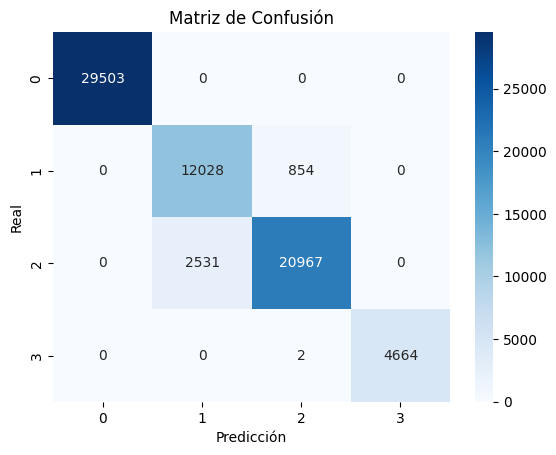

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29503
           1       0.83      0.93      0.88     12882
           2       0.96      0.89      0.93     23498
           3       1.00      1.00      1.00      4666

    accuracy                           0.95     70549
   macro avg       0.95      0.96      0.95     70549
weighted avg       0.96      0.95      0.95     70549



In [34]:
# Realizar predicciones
y_pred_rf = modelo_rf.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión de Random Forest: {accuracy_rf:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


In [35]:
'''# Hacer predicciones
y_pred = modelo_xgb.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo XGBoost: {accuracy:.4f}")
'''

'# Hacer predicciones\ny_pred = modelo_xgb.predict(X_test)\n\n# Calcular y mostrar la precisión\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Precisión del modelo XGBoost: {accuracy:.4f}")\n'

In [36]:
'''# Hacer predicciones
y_pred = modelo_nb.predict(X_test)

# Calcular y mostrar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo Naïve Bayes: {accuracy:.4f}")'''


'# Hacer predicciones\ny_pred = modelo_nb.predict(X_test)\n\n# Calcular y mostrar la precisión\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Precisión del modelo Naïve Bayes: {accuracy:.4f}")'

# Pruebas de predicciones

In [58]:
#Transformo la variable numérica label de nuevo a categórica
#Valores únicos en Label: ['Android_Adware' 'Android_Scareware' 'Android_SMS_Malware' 'Benign']
import random

# Selecciono un índice aleatorio de X_test, esto lo hago para probar con un ejemplo aleatorio
indice_aleatorio = random.randint(0, len(X_test) - 1)
ejemplo = X_test.iloc[indice_aleatorio]

# Realizo la predicción solo para esa muestra
prediccion = modelo_rf.predict([ejemplo])  # Predicción para la muestra seleccionada (el modelo espera una matriz, por eso los corchetes)

# Mapeo el valor numérico de la predicción a su etiqueta
label_map = {0: 'Android_Adware', 
             1: 'Android_Scareware', 
             2: 'Android_SMS_Malware', 
             3: 'Benign'}

# Obtengo la etiqueta correspondiente a la predicción
etiqueta_predicha = label_map[prediccion[0]] 

# Obtengo la etiqueta real para comparar visualmente
etiqueta_real = y_test.iloc[indice_aleatorio]
etiqueta_real_mapeada = label_map[etiqueta_real] 

# Muestro la predicción y la etiqueta real
print(f"Índice de la muestra seleccionada: {indice_aleatorio}")
print(f"Etiqueta real: {etiqueta_real_mapeada}")
print(f"Etiqueta predicha por el modelo: {etiqueta_predicha}")



Índice de la muestra seleccionada: 15406
Etiqueta real: Android_Adware
Etiqueta predicha por el modelo: Android_Adware


c:\Users\Jorge\anaconda3\envs\IA\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Despliegue

In [38]:

import numpy as np
import joblib
from flask import Flask, request, jsonify

# Carga del modelo entrenado
modelo = joblib.load("Modelo_android_malware.pkl")

# Diccionario para mapear valores numéricos a etiquetas
label_map = {
    0: 'Android_Adware', 
    1: 'Android_Scareware', 
    2: 'Android_SMS_Malware', 
    3: 'Benign'
}

# Crear la aplicación Flask
app = Flask(__name__)

# Ruta para predecir
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Verificar que la solicitud tiene datos JSON
        data = request.get_json()
        if data is None:
            return jsonify({"error": "No se recibió JSON en la solicitud"}), 400
        
        # Verificar que la clave 'features' existe en el JSON
        if "features" not in data:
            return jsonify({"error": "Falta la clave 'features' en los datos"}), 400

        # Convertir los datos en un array numpy
        features = np.array(data["features"]).reshape(1, -1)

        # Hacer la predicción
        prediction = modelo.predict(features)
        etiqueta_predicha = label_map.get(prediction[0], "Desconocido")

        return jsonify({"prediction": etiqueta_predicha})
    
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Ejecutar servidor
if __name__ == "__main__":
    app.run(debug=True, port=5000, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
